#**ESTRATÉGICA MEDIANTE ANÁLISIS DE DATOS EN LA TIENDA DE MODA ONLINE**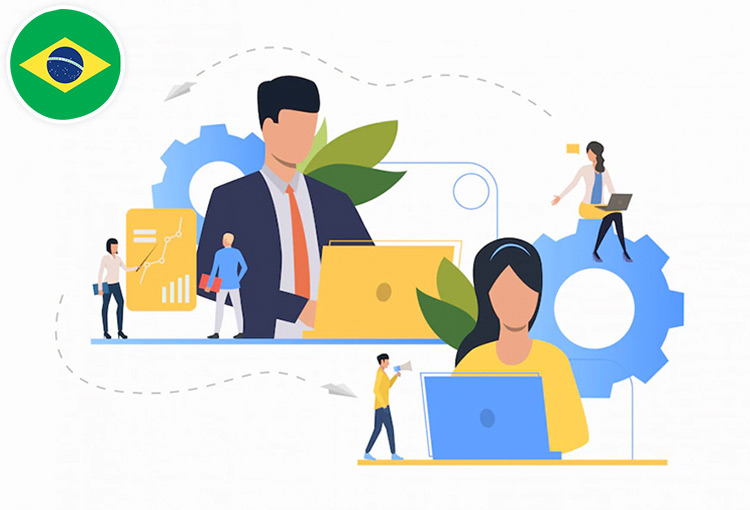

*El propósito central de este proyecto es demostrar cómo la ciencia de datos se convierte en un catalizador esencial para la transformación y el éxito sostenido de su empresa en el sector de moda online. Al emplear metodologías de análisis de datos, nuestro objetivo es empoderar a su empresa para que capitalice las oportunidades emergentes y fortalezca su posición de liderazgo en el altamente competitivo mercado brasileño. Mediante la integración de insights accionables y estrategias basadas en datos, proponemos no solo optimizar las operaciones actuales sino también prever y adaptarse a las tendencias futuras, asegurando así un crecimiento sostenido y una ventaja competitiva duradera.*

#**SOBRE EL NEGOCIO**


---




*Una tienda online de moda, con presencia en todo Brasil, necesita impulsar su rendimiento utilizando sus datos de manera estratégica. Como científico de datos, has sido convocado para analizar estos datos y ofrecer insights que guíen sus decisiones y respondan a las siguientes preguntas clave:*   

*A pesar del crecimiento que presente la empresas, toda empresa mantiene desafíos críticos relacionados con la gestión eficiente del inventario, la precisión en la estrategia de precios, la efectividad decampañas de marketing y la optimización de la logística y distribución*.

# **Importancia del sector**

*El comercio electrónico de moda en Brasil está en constante evolución, impulsado por una rápida digitalización y un cambio en las preferencias de consumo. Nuestra capacidad para adaptarnos rápidamente y responder a estas dinámicas del mercado es más crucial que nunca.*

#OBJETIVO#

* Profundizaremos en cómo podemos utilizar de manera efectiva los datos para para identificar y aprovechar nuevas oportunidades que mejoren su rendimiento operativo como la satisfacción de sus usuarios. Les presentaremos análisis detallados, hallazgos claves, y recomendaciones estratégicas que pueden revolucionar su operativa comercial.

### **Preguntas**

1. ¿Cual es el Top 5 productos más vendidos históricamente?

2. ¿Cual es la evolución histórica de las ingresos netos?

3. ¿Cuáles son los ingresos netos por vendedor por año?

4. ¿Cuáles son las ciudades que proporcionan mayores ingresos netos?

5. ¿Existe otro insight que puedas proporcionar?

#**1. Configuración del Ambiente**


---




In [74]:
!pip install geobr
import geobr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyBboxPatch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import geopandas as gpd
from matplotlib.patheffects import withStroke
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from io import BytesIO
from sqlalchemy import create_engine, MetaData, Table, inspect, text
global df_itens_pedidos, df_pedidos, df_productos, df_vendedores, database

#**2. Obtención, Tratamiento y Análisis Exploratório (EDA)**


---




##**2.1 Cargando las bases de datos**

In [75]:
df_itens_pedidos = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/itens_pedidos.csv')
df_itens_pedidos.head()

id_recibo  producto_id  pedido_id  cantidad  valor_unitario  valor_total  \
0          1        41518        341         3             260          780   
1          2         4307       1174         5            6175        30875   
2          3        22407       1399         3             200          600   
3          4         3820       1652         6             139          834   
4          5        29012       2470         3             525         1575   

  ciudad  costo_envio  
0  BR-BA        156.0  
1  BR-RJ       6175.0  
2  BR-PB        120.0  
3  BR-DF        166.8  
4  BR-BA        315.0

In [76]:
df_pedidos = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/pedidos.csv')
df_pedidos.head()

pedido_id  producto_id  vendedor_id fecha_compra  total
0        341        41518            6   2019-01-05    780
1       1174         4307            3   2019-01-05  30875
2       1399        22407            1   2019-01-05    600
3       1652         3820            4   2019-01-05    834
4       2470        29012            2   2019-01-05   1575

In [77]:
df_productos = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/productos.csv')
df_productos.head()


producto_id                 producto  precio                marca  \
0        21244     Oculos Lente Azulada    1120  D&g Dolce & Gabbana   
1         9981         Bolsa Coral Saco    4000             Givenchy   
2        84176      Camisa Xadrez Verde     310            Joe Fresh   
3        47475  Calca Alfaiataria Preta     490                Mixed   
4        74864    Vestido Jeans Babados     130                 Zara   

        sku condicion  
0  209297.0     Usado  
1  278612.0     Usado  
2  322482.0     Usado  
3  263658.0     Usado  
4  219248.0     Usado

In [78]:
df_vendedores = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/vendedores.csv')
df_vendedores.head()

vendedor_id  nombre_vendedor
0            1       Ana Duarte
1            2  Daniel Siqueira
2            3   Nadia Oliveira
3            4  Millena Pereira
4            5    Paulo Calanca

##**2.2 Tratamiento de Datos**

In [79]:
print(df_itens_pedidos.info())
print('-------------')
print(df_pedidos.info())
print('-------------')
print(df_productos.info())
print('-------------')
print(df_vendedores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_recibo       24527 non-null  int64  
 1   producto_id     24527 non-null  int64  
 2   pedido_id       24527 non-null  int64  
 3   cantidad        24527 non-null  int64  
 4   valor_unitario  24527 non-null  int64  
 5   valor_total     24527 non-null  int64  
 6   ciudad          24527 non-null  object 
 7   costo_envio     24527 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 1.5+ MB
None
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pedido_id     24527 non-null  int64 
 1   producto_id   24527 non-null  int64 
 2   vendedor_id   24527 non-null  int64 
 3   fecha_compra  24527 non-null  object
 

# TRATAMIENTO df_itens_pedido


#INFORMACION RELEVANTE

#### No se identifican valores nulos
#### No se identifican valores duplicados
#### Se cambia el tipo de datos

**DETALLES ENCONTRADOS**

* Rango de cantidad: Va de 1 a 6. No hay valores extremadamente altos que indiquen errores de entrada.
* valor_unitario y valor_total:El valor_unitario tiene un rango muy amplio, desde 45 hasta 6500. Sin embargo, el valor máximo es bastante más alto que el 75% de tus datos.
*Similarmente, valor_total varía de 45 a 39000, con una desviación estándar relativamente alta, lo que indica una gran variabilidad en los totales de pedidos.
*costo_envio: Tiene un máximo significativamente más alto (7800) comparado con el 75% de los datos (384). Esto podría indicar que algunos costos de envío son inusualmente altos y podrían ser errores o casos especiales, por lo cual se deber enfocar la revisiòn para identificar si son valores consistentes.

ciudad:

*  Hay un total de 24,527 registros.
*  Hay 27 ciudades únicas en este conjunto de datos.
*  La moda es "BR-MA".
*  "BR-MA" aparece 974 veces en el conjunto de datos.

producto_id:

* Hay un total de 24,527 registros.
* Hay 205 valores únicos de productos en este conjunto de datos.
* El producto más común (modo) es 32126.
* El producto más común aparece 154 veces en el conjunto de datos.

df_itens_pedido

In [80]:
df_itens_pedidos

id_recibo  producto_id  pedido_id  cantidad  valor_unitario  \
0              1        41518        341         3             260   
1              2         4307       1174         5            6175   
2              3        22407       1399         3             200   
3              4         3820       1652         6             139   
4              5        29012       2470         3             525   
...          ...          ...        ...       ...             ...   
24522      25051        64127      63716         4             590   
24523      25052        37384      63999         4             700   
24524      25053       100932      64594         5            3900   
24525      25054         3820      64811         3             139   
24526      25055        74864      65274         2             130   

       valor_total ciudad  costo_envio  
0              780  BR-BA        156.0  
1            30875  BR-RJ       6175.0  
2              600  BR-PB        120.0  
3              834  BR-DF        166.8  
4             1575  BR-BA        315.0  
...            ...    ...          ...  
24522         2360  BR-PE        472.0  
24523         2800  BR-RO        560.0  
24524        19500  BR-RO       3900.0  
24525          417  BR-MA         83.4  
24526          260  BR-SE         52.0  

[24527 rows x 8 columns]

In [81]:
## Valores nulos
nulos_df_itens_pedidos = df_itens_pedidos.isnull().sum()
nulos_df_itens_pedidos


id_recibo         0
producto_id       0
pedido_id         0
cantidad          0
valor_unitario    0
valor_total       0
ciudad            0
costo_envio       0
dtype: int64

In [82]:
# Convertir al tipo de dato correcto
columnas_float = ['valor_unitario','valor_total']
for columna1 in columnas_float:
  df_itens_pedidos[columna1] = df_itens_pedidos[columna1].astype('float')
#---------------------------------------------------------------
columnas_str = ['id_recibo','producto_id','pedido_id',]
for columna2 in columnas_str:
  df_itens_pedidos[columna2]= df_itens_pedidos[columna2].astype('str')


In [83]:
#Valores Unicos
valores_unicos_df_itens_pedidos = ['cantidad','valor_unitario','valor_total','costo_envio','id_recibo','producto_id','pedido_id','ciudad']
for columna in valores_unicos_df_itens_pedidos:
  unicos =df_itens_pedidos[columna].unique()
  # Mostrar los valores unicos
  print(f"Valores únicos en la columna '{columna}': {unicos}")


Valores únicos en la columna 'cantidad': [3 5 6 4 2 1]
Valores únicos en la columna 'valor_unitario': [ 260. 6175.  200.  139.  525.  179.  350.  450.  480.  240.  390.  320.
  250.   90.  420.  245.  990.  590.  190.  300.  410.  120.  690.  180.
  100.  399.  790.  160.  110.  336.  310. 1100.  398.  280.  130. 3800.
 1120.   50.  795.  340.  530.  560. 2600.  700.  360.  150.  490.  550.
  210.  165.  740. 1200.  345.   45.  290.  270.  315.  105.  220.  890.
 2630.  140.  169. 1400.  576.  430.  644. 4000. 4200. 2590.  850.   80.
  400.  788.  279.  135.  294.  586. 1600.  750.  499.  380. 6500. 3900.
  760.]
Valores únicos en la columna 'valor_total': [  780. 30875.   600.   834.  1575.   537.  1400.  2625.  1350.   960.
  1200.  1950.  1280.   500.    90.  2100.   556.   490.  3960.  3540.
   190.  1600.   300.   410.  1050.  1380.   540.   798.  2520.  3950.
   800.   720.   220.  2700.  2460.  1680.  1980.   660.   310.  1100.
  2016.  1194.   200.   560.   650.  2340. 22800.  

In [84]:
# Conteo de valores unicos
valores_unicos_df_itens_pedidos = ['cantidad','valor_unitario','valor_total','costo_envio','ciudad']

for columna in valores_unicos_df_itens_pedidos:
  conteo_valores_unicos = df_itens_pedidos[columna].value_counts()

  print(f"valores unicos en la columna '{columna}':")
  for valor, conteo in conteo_valores_unicos.items():
    print(f" - valor: {valor}, conteo:{conteo}")


valores unicos en la columna 'cantidad':
 - valor: 1, conteo:4146
 - valor: 5, conteo:4136
 - valor: 4, conteo:4121
 - valor: 3, conteo:4116
 - valor: 6, conteo:4025
 - valor: 2, conteo:3983
valores unicos en la columna 'valor_unitario':
 - valor: 320.0, conteo:1508
 - valor: 390.0, conteo:1191
 - valor: 450.0, conteo:865
 - valor: 420.0, conteo:862
 - valor: 210.0, conteo:848
 - valor: 120.0, conteo:823
 - valor: 350.0, conteo:782
 - valor: 100.0, conteo:711
 - valor: 360.0, conteo:588
 - valor: 990.0, conteo:586
 - valor: 250.0, conteo:562
 - valor: 280.0, conteo:531
 - valor: 310.0, conteo:520
 - valor: 410.0, conteo:511
 - valor: 90.0, conteo:501
 - valor: 590.0, conteo:496
 - valor: 290.0, conteo:483
 - valor: 180.0, conteo:482
 - valor: 490.0, conteo:482
 - valor: 110.0, conteo:393
 - valor: 160.0, conteo:381
 - valor: 315.0, conteo:356
 - valor: 139.0, conteo:356
 - valor: 480.0, conteo:351
 - valor: 245.0, conteo:317
 - valor: 399.0, conteo:256
 - valor: 300.0, conteo:256
 - va

In [85]:
df_itens_pedidos.describe()

cantidad  valor_unitario   valor_total   costo_envio
count  24527.000000     24527.00000  24527.000000  24527.000000
mean       3.497126       535.68867   1867.490113    373.498023
std        1.706170       839.21405   3379.681887    675.936377
min        1.000000        45.00000     45.000000      9.000000
25%        2.000000       210.00000    520.000000    104.000000
50%        4.000000       336.00000   1050.000000    210.000000
75%        5.000000       450.00000   1920.000000    384.000000
max        6.000000      6500.00000  39000.000000   7800.000000

In [86]:
df_itens_pedidos.describe(include= object)

id_recibo producto_id pedido_id ciudad
count      24527       24527     24527  24527
unique     24527         205     24527     27
top            1       32126       341  BR-MA
freq           1         154         1    974

# **TRATAMIENTO df_pedidos**

#INFORMACION RELEVANTE

#### No se identifican valores nulos
#### No se identifican valores duplicados
#### Se cambia tipos de datos

***Se identifica que varia informaciòn se repite de la tabla df_pedidos, por lo cual se recomienda que la informacion sea anexada a la tabla df_itens_pedidos***


**DETALLES ENCONTRADOS**

* pedido_id:
  *  Hay un total de 24,527 registros.
  * Todos los registros son únicos, lo que significa que no hay duplicados en esta columna.
  *  El valor moda es 341.
  *  El valormoda aparece solo una vez en esta columna.

* producto_id:
  * Hay un total de 24,527 registros.
  * Hay 205 valores únicos de productos en este conjunto de datos.
  * El producto moda es 32126.
  * El producto más común aparece 154 veces en el conjunto de datos.

* Vendedor_id:
  * Hay un total de 24,527 registros.
  * Hay 6 valores únicos de identificación de vendedores.
  * El vendedor más común (modo) tiene el ID 5.
  * El vendedor con ID 5 aparece 5,282 veces en el conjunto de datos.

In [87]:
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pedido_id     24527 non-null  int64 
 1   producto_id   24527 non-null  int64 
 2   vendedor_id   24527 non-null  int64 
 3   fecha_compra  24527 non-null  object
 4   total         24527 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 958.2+ KB


In [88]:
nulos_pedidos = df_pedidos.isnull().sum()
nulos_pedidos

pedido_id       0
producto_id     0
vendedor_id     0
fecha_compra    0
total           0
dtype: int64

In [89]:
#Se identifica que las variables no cuentan con el tipo de dato correcto
columnas_str=['pedido_id','producto_id','vendedor_id']
for columna in columnas_str:
  df_pedidos[columna] = df_pedidos[columna].astype(str)
#----------------------------------------------------
df_pedidos['fecha_compra'] = pd.to_datetime(df_pedidos['fecha_compra'])

In [90]:
df_pedidos.describe()

fecha_compra         total
count                          24527  24527.000000
mean   2020-04-02 12:10:46.406001664   1867.490113
min              2019-01-05 00:00:00     45.000000
25%              2019-11-12 00:00:00    520.000000
50%              2020-04-09 00:00:00   1050.000000
75%              2020-09-21 00:00:00   1920.000000
max              2021-03-10 00:00:00  39000.000000
std                              NaN   3379.681887

In [91]:
df_pedidos.describe(include = 'object')

pedido_id producto_id vendedor_id
count      24527       24527       24527
unique     24527         205           6
top          341       32126           5
freq           1         154        5282

# **TRATAMIENTO df_productos.inf**

#INFORMACION RELEVANTE

#### Se identifican valores 'NAN' que representa datos faltantes en columna "PRODUCTO" Y "SKU", son los mismos datos de estas columna que representan este valor Null

Los datos faltantes son los dos últimos productos registrados podrían indicar que hubo algún problema o falta en el proceso de registro de esos productos. Esto podría deberse a diversas razones, como errores en la entrada de datos, problemas técnicos durante el registro, o simplemente que esos productos no fueron registrados correctamente en la base de datos.

Es importante investigar y corregir este tipo de problemas, ya que la integridad de los datos es fundamental para realizar análisis precisos y tomar decisiones informadas. Una posible acción a tomar sería revisar el proceso de registro de productos para identificar posibles fallos y asegurarse de que todos los productos sean registrados de manera adecuada en el futuro.

#### No se identifican valores duplicados
#### Se cambia tipos de datos

***Se recomienda mantenter los valores Null porque representan productos nuevos que no han sido registrados, se deberia revisar el porque no se registraròn, para  evitar perder datos***



In [92]:
df_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   producto_id  207 non-null    int64  
 1   producto     205 non-null    object 
 2   precio       207 non-null    int64  
 3   marca        207 non-null    object 
 4   sku          205 non-null    float64
 5   condicion    207 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.8+ KB


In [93]:
nulos_productos = df_productos.isnull().sum()
nulos_productos

producto_id    0
producto       2
precio         0
marca          0
sku            2
condicion      0
dtype: int64

In [94]:
# Eliminar datos Null
df_productos.dropna(subset=['producto'],inplace= True)

In [95]:
#Se identifica que las variables no cuentan con el tipo de dato correcto
columnas_str = ['producto_id','producto','sku']
for columna in columnas_str:
  df_productos[columna] = df_productos[columna].astype(str)


In [96]:
#Valores Unicos
valores_unicos_productos = ['producto_id','producto','precio','marca','sku','condicion']
for columna in valores_unicos_productos:
  unicos =df_productos[columna].unique()
  # Mostrar los valores unicos
  print(f"Valores únicos en la columna '{columna}': {unicos}")

Valores únicos en la columna 'producto_id': ['21244' '9981' '84176' '47475' '74864' '51238' '21429' '44207' '79551'
 '6262' '46573' '44379' '6742' '39814' '60010' '71190' '14836' '31835'
 '10795' '28699' '56571' '17990' '23575' '62594' '43054' '41262' '11218'
 '29012' '27659' '18751' '16634' '88368' '45695' '91248' '12812' '86243'
 '17258' '5292' '44424' '21516' '75706' '95805' '37384' '3829' '38723'
 '83792' '48872' '100484' '18128' '83009' '70813' '29650' '13906' '27336'
 '57708' '64127' '13814' '27546' '100983' '40082' '83795' '12751' '33348'
 '75557' '22407' '59784' '71946' '81822' '11736' '53731' '17329' '4553'
 '70673' '98964' '86302' '13472' '93262' '71770' '17395' '6381' '4307'
 '49497' '29893' '68110' '3820' '77079' '45878' '54794' '72667' '55452'
 '43888' '51314' '12609' '18790' '58472' '35129' '47682' '6699' '58245'
 '45979' '82257' '47405' '30263' '72621' '61356' '8673' '84743' '10086'
 '86845' '89100' '6137' '57696' '7940' '35682' '79079' '5995' '12895'
 '56350' '3865' '67

In [97]:
# Conteo de valores unicos

for columna in valores_unicos_productos:
  conteo_valores_unicos = df_productos[columna].value_counts()

  print(f"valores unicos en la columna '{columna}':")
  for valor, conteo in conteo_valores_unicos.items():
    print(f" - valor: {valor}, conteo:{conteo}")


valores unicos en la columna 'producto_id':
 - valor: 21244, conteo:1
 - valor: 25562, conteo:1
 - valor: 98640, conteo:1
 - valor: 67445, conteo:1
 - valor: 66255, conteo:1
 - valor: 4853, conteo:1
 - valor: 53458, conteo:1
 - valor: 13716, conteo:1
 - valor: 50771, conteo:1
 - valor: 30211, conteo:1
 - valor: 19432, conteo:1
 - valor: 2706, conteo:1
 - valor: 53941, conteo:1
 - valor: 57815, conteo:1
 - valor: 14420, conteo:1
 - valor: 82990, conteo:1
 - valor: 9397, conteo:1
 - valor: 8691, conteo:1
 - valor: 7193, conteo:1
 - valor: 49026, conteo:1
 - valor: 50330, conteo:1
 - valor: 84692, conteo:1
 - valor: 97039, conteo:1
 - valor: 5567, conteo:1
 - valor: 6888, conteo:1
 - valor: 86544, conteo:1
 - valor: 72621, conteo:1
 - valor: 5995, conteo:1
 - valor: 8673, conteo:1
 - valor: 84743, conteo:1
 - valor: 10086, conteo:1
 - valor: 86845, conteo:1
 - valor: 89100, conteo:1
 - valor: 6137, conteo:1
 - valor: 57696, conteo:1
 - valor: 7940, conteo:1
 - valor: 35682, conteo:1
 - va

In [98]:
## Los datos faltantes con los dos ultimos productos que se registraron, podria indicar que no tuvieron un registro apropiado
df_productos.tail(2)

producto_id                producto  precio            marca       sku  \
203       40508  Regata Bicolor Alcinha     245          Express  247166.0   
204       41518      Calca Jeans Basica     260  Banana Republic  255410.0   

              condicion  
203               Usado  
204  Nuevo con etiqueta

In [99]:
df_productos.describe()

precio
count   205.000000
mean    536.009756
std     843.774387
min      45.000000
25%     210.000000
50%     336.000000
75%     450.000000
max    6500.000000

In [100]:
df_productos.describe(include=object)

producto_id                 producto marca       sku condicion
count          205                      205   205       205       205
unique         205                      201   117       205         3
top          21244  Calca Alfaiataria Preta  Zara  209297.0     Usado
freq             1                        2    23         1       176

# **TRATAMIENTO df_vendedores**

#INFORMACION RELEVANTE

Se identifica un nombre vendedor "Unknonw"

*  No se identifican valores duplicados
*  Se cambia tipos de datos



In [101]:
df_vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   vendedor_id      6 non-null      int64 
 1   nombre_vendedor  6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


In [102]:
nulos_vendedores = df_vendedores.isnull().sum()
nulos_vendedores

vendedor_id        0
nombre_vendedor    0
dtype: int64

In [103]:
df_vendedores['vendedor_id'] = df_vendedores['vendedor_id'].astype(str)


In [104]:
df_vendedores.head(10)

vendedor_id  nombre_vendedor
0           1       Ana Duarte
1           2  Daniel Siqueira
2           3   Nadia Oliveira
3           4  Millena Pereira
4           5    Paulo Calanca
5           6          Unknown

##**2.3 Análisis Exploratorio (EDA)**

#EVOLUCIOND DE VENTAS#

**Se observó que el pico más alto en las ventas ocurrió el 24/11/2019, influenciado por dos eventos significativos en Brasil:**

*   1.- Impacto del Black Friday: Este evento pudo atraer consumidores a aprovechar las ofertas y descuentos significativosque la empresa promociono en esta fecha. Al ser un evento anual altamente anticipado, el Black Friday genera un incremento notable en el tráfico de compradores, es muy probable que la empresa genero camañas agresivas y promociones que genero un aumento sustancial en las ventas durante este período.
*   2.- Victoria del Flamengo: La coincidencia de esta fecha con la celebración de Flamengo por ganar el Brasileirão y la Copa Libertadores pudo contribuir un clima de euforia nacional.

La sinergia entre las promociones de Black Friday y la celebración deportiva pudo haber creado un ambiente excepcionalmente propicio para el consumo, lo cual fue estratégicamente aprovechado por la empresa para maximizar ingresos, implementando campañas de marketing que resonaron con el sentimiento colectivo de celebración.

**Tendencia Decreciente**

Los datos indican una tendencia decreciente en las ventas en varias fechas de enero de 2019, específicamente el 27, 14, 15, 10, 6, 7, 8, 21, 11 y 9. Este patrón puede atribuirse a factores estacionales y económicos comunes en este período:

*   Finalización de la Temporada Navideña: Las ventas suelen disminuir tras el fin de las festividades de diciembre, ya que los consumidores reducen sus gastos después de un período de compras intensas.

*   Inicio del Año Fiscal: El comienzo de enero marca a menudo el inicio del año fiscal en varios lugares, lo que puede llevar a un comportamiento conservador en el gasto mientras los individuos y familias establecen sus presupuestos para el nuevo año.

*   Efecto de la Cuesta de Enero: Enero es conocido por ser un mes donde los consumidores enfrentan restricciones presupuestarias después de los gastos de fin de año, lo que se refleja en una reducción notable en las ventas minoristas.

**Ventas por dia de la semama**

El análisis de las ventas por día de la semana revela que los jueves, sábados y viernes son los días con mayores ventas, lo cual sugiere una oportunidad para intensificar las campañas de marketing durante estos días para maximizar los ingresos. Por otro lado, los lunes y martes muestran las menores ventas, indicando la necesidad de mejorar las estrategias promocionales en estos días para incrementar las transacciones. Estos insights pueden guiar la planificación de promociones y ofertas específicas para atraer más clientes en los días de menor rendimiento.

**Comparaciòn Anual Ventas**

Tras un analisis sobre el crecimiento de las ventas entre 2019 y 2020 muestra un aumento significativo del 78%, reflejando un notable desarrollo en el comercio durante ese período. Para el año 2021, las ventas representan solo un 8% en comparación con el año anterior, lo cual es razonable considerando que los datos disponibles solo cubren hasta el inicio del primer trimestre.

Para mantener y potenciar la tendencia positiva del crecimiento de ventas observado entre 2019 y 2020, es fundamental implementar estrategias basadas en un análisis profundo del comportamiento del consumidor y las tendencias del mercado.

*   Análisis Predictivo: Continuar utilizando datos para prever tendencias futuras y adaptar las estrategias de marketing y ventas de manera proactiva.

*   Optimización de la Experiencia del Cliente: Mejorar la experiencia de compra online y en tienda, asegurando que los procesos sean eficientes y centrados en el cliente.

*   Personalización: Utilizar la tecnología para ofrecer promociones personalizadas y recomendaciones de productos basadas en el historial de compra y preferencias del cliente.

*   Diversificación de Productos y Servicios: Expandir el catálogo de productos para explorar nuevas categorías que puedan atraer a diferentes segmentos de clientes.

*   Refuerzo de Campañas en Días Clave: Intensificar las campañas de marketing durante los días de mayor venta y diseñar promociones específicas para los días de menor venta para equilibrar la distribución de la demanda a lo largo de la semana.

Estas estrategias no solo ayudarán a mantener el crecimiento de las ventas, sino también a adaptarse mejor a los cambios del mercado y a las expectativas de los consumidores.

In [105]:
df_transacciones_pedidos = df_itens_pedidos.merge(df_pedidos, on=['pedido_id','pedido_id'],how= 'inner' )

In [106]:
df_transacciones_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_recibo       24527 non-null  object        
 1   producto_id_x   24527 non-null  object        
 2   pedido_id       24527 non-null  object        
 3   cantidad        24527 non-null  int64         
 4   valor_unitario  24527 non-null  float64       
 5   valor_total     24527 non-null  float64       
 6   ciudad          24527 non-null  object        
 7   costo_envio     24527 non-null  float64       
 8   producto_id_y   24527 non-null  object        
 9   vendedor_id     24527 non-null  object        
 10  fecha_compra    24527 non-null  datetime64[ns]
 11  total           24527 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 2.2+ MB


In [107]:
df_transacciones_pedidos = df_transacciones_pedidos[['id_recibo','producto_id_x','pedido_id','cantidad','valor_unitario','valor_total','ciudad','costo_envio','vendedor_id','fecha_compra']]
df_transacciones_pedidos = df_transacciones_pedidos.rename(columns={'producto_id_x': 'producto_id'})
df_transacciones_pedidos


id_recibo producto_id pedido_id  cantidad  valor_unitario  valor_total  \
0             1       41518       341         3           260.0        780.0   
1             2        4307      1174         5          6175.0      30875.0   
2             3       22407      1399         3           200.0        600.0   
3             4        3820      1652         6           139.0        834.0   
4             5       29012      2470         3           525.0       1575.0   
...         ...         ...       ...       ...             ...          ...   
24522     25051       64127     63716         4           590.0       2360.0   
24523     25052       37384     63999         4           700.0       2800.0   
24524     25053      100932     64594         5          3900.0      19500.0   
24525     25054        3820     64811         3           139.0        417.0   
24526     25055       74864     65274         2           130.0        260.0   

      ciudad  costo_envio vendedor_id fecha_compra  
0      BR-BA        156.0           6   2019-01-05  
1      BR-RJ       6175.0           3   2019-01-05  
2      BR-PB        120.0           1   2019-01-05  
3      BR-DF        166.8           4   2019-01-05  
4      BR-BA        315.0           2   2019-01-05  
...      ...          ...         ...          ...  
24522  BR-PE        472.0           1   2021-03-09  
24523  BR-RO        560.0           2   2021-03-09  
24524  BR-RO       3900.0           1   2021-03-10  
24525  BR-MA         83.4           3   2021-03-10  
24526  BR-SE         52.0           4   2021-03-10  

[24527 rows x 10 columns]

In [108]:
df_transacciones_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_recibo       24527 non-null  object        
 1   producto_id     24527 non-null  object        
 2   pedido_id       24527 non-null  object        
 3   cantidad        24527 non-null  int64         
 4   valor_unitario  24527 non-null  float64       
 5   valor_total     24527 non-null  float64       
 6   ciudad          24527 non-null  object        
 7   costo_envio     24527 non-null  float64       
 8   vendedor_id     24527 non-null  object        
 9   fecha_compra    24527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 1.9+ MB


In [109]:
# SE REALZIA UNA SOLA BASE PARA EFECTUARO UNA SOLA BASE DE CONSULTA
df_transacciones_producto = df_transacciones_pedidos.merge(df_productos, on=['producto_id','producto_id'],how= 'inner' )
df_transacciones_producto_vendedor = df_transacciones_producto.merge(df_vendedores, on =('vendedor_id','vendedor_id'), how='inner')

In [110]:
df_transacciones_producto_vendedor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_recibo        24527 non-null  object        
 1   producto_id      24527 non-null  object        
 2   pedido_id        24527 non-null  object        
 3   cantidad         24527 non-null  int64         
 4   valor_unitario   24527 non-null  float64       
 5   valor_total      24527 non-null  float64       
 6   ciudad           24527 non-null  object        
 7   costo_envio      24527 non-null  float64       
 8   vendedor_id      24527 non-null  object        
 9   fecha_compra     24527 non-null  datetime64[ns]
 10  producto         24527 non-null  object        
 11  precio           24527 non-null  int64         
 12  marca            24527 non-null  object        
 13  sku              24527 non-null  object        
 14  condicion        24527 non-null  objec

In [111]:
df_transacciones_producto_vendedor.sample(8)

id_recibo producto_id pedido_id  cantidad  valor_unitario  valor_total  \
15257      5824       14836     84843         2          1100.0       2200.0   
22044     19744       15875    123974         3           490.0       1470.0   
24406     16883      100932    113121         2          3900.0       7800.0   
7086      22575       21516     39949         4           320.0       1280.0   
10295      4817       27336    121910         2           250.0        500.0   
21119     18473        8707     94765         4           150.0        600.0   
16110      1498       44379     93115         5           165.0        825.0   
18697     18951       88368     11377         2           250.0        500.0   

      ciudad  costo_envio vendedor_id fecha_compra                producto  \
15257  BR-AC        440.0           5   2019-11-02   Sandalia Lona Cortica   
22044  BR-PR        294.0           2   2020-10-24  Vestido Recortes Cores   
24406  BR-TO       1560.0           2   2020-08-06       Sapato Cetim Pink   
7086   BR-MS        256.0           3   2020-12-19  Bolsa Vermelha Brilhos   
10295  BR-PE        100.0           4   2019-09-26    Calca Preta Resinada   
21119  BR-AM        120.0           2   2020-09-15    Regata Nadador Lilas   
16110  BR-RS        165.0           5   2019-05-04  Calca Textura Vermelha   
18697  BR-RS        100.0           5   2020-09-30        Blusa Malha Azul   

       precio                marca       sku condicion  nombre_vendedor  
15257    1100           Tory Burch  290573.0     Usado    Paulo Calanca  
22044     490            Alix Shop  257917.0     Usado  Daniel Siqueira  
24406    3900  Christian Louboutin  304370.0     Usado  Daniel Siqueira  
7086      320              Kipling  296103.0     Usado   Nadia Oliveira  
10295     250                Ellus  122068.0     Usado  Millena Pereira  
21119     150              Animale  247619.0     Usado  Daniel Siqueira  
16110     165                 Zara  213039.0     Usado    Paulo Calanca  
18697     250             Talie Nk  254726.0     Usado    Paulo Calanca

In [112]:
df_transacciones_producto_vendedor.describe()

cantidad  valor_unitario   valor_total   costo_envio  \
count  24527.000000     24527.00000  24527.000000  24527.000000   
mean       3.497126       535.68867   1867.490113    373.498023   
min        1.000000        45.00000     45.000000      9.000000   
25%        2.000000       210.00000    520.000000    104.000000   
50%        4.000000       336.00000   1050.000000    210.000000   
75%        5.000000       450.00000   1920.000000    384.000000   
max        6.000000      6500.00000  39000.000000   7800.000000   
std        1.706170       839.21405   3379.681887    675.936377   

                        fecha_compra       precio  
count                          24527  24527.00000  
mean   2020-04-02 12:10:46.406001664    535.68867  
min              2019-01-05 00:00:00     45.00000  
25%              2019-11-12 00:00:00    210.00000  
50%              2020-04-09 00:00:00    336.00000  
75%              2020-09-21 00:00:00    450.00000  
max              2021-03-10 00:00:00   6500.00000  
std                              NaN    839.21405

In [113]:
df_transacciones_producto_vendedor.describe(include=object)

id_recibo producto_id pedido_id ciudad vendedor_id  \
count      24527       24527     24527  24527       24527   
unique     24527         205     24527     27           6   
top            1       32126       341  BR-MA           5   
freq           1         154         1    974        5282   

                    producto  marca       sku condicion nombre_vendedor  
count                  24527  24527     24527     24527           24527  
unique                   201    117       205         3               6  
top     Calca Jeans Costuras   Zara  302628.0     Usado   Paulo Calanca  
freq                     229   2721       154     21050            5282

In [114]:

df_transacciones_producto_vendedor['fecha_compra'] = pd.to_datetime(df_transacciones_producto_vendedor['fecha_compra'])

# Extrayendo día, mes y año
df_transacciones_producto_vendedor['dia'] = df_transacciones_producto_vendedor['fecha_compra'].dt.day
df_transacciones_producto_vendedor['mes'] = df_transacciones_producto_vendedor['fecha_compra'].dt.month
df_transacciones_producto_vendedor['año'] = df_transacciones_producto_vendedor['fecha_compra'].dt.year

# Agrupando y sumando los valores por día, mes y año
ventas_por_dia = df_transacciones_producto_vendedor.groupby(df_transacciones_producto_vendedor['fecha_compra'].dt.date)['valor_total'].sum().reset_index(name='suma')
ventas_por_mes = df_transacciones_producto_vendedor.groupby([df_transacciones_producto_vendedor['año'], df_transacciones_producto_vendedor['mes']])['valor_total'].sum().reset_index(name='suma')
ventas_por_año = df_transacciones_producto_vendedor.groupby('año')['valor_total'].sum().reset_index(name='suma')

#aGRUPAMOS POR DIA DE LA SEMANA
df_transacciones_producto_vendedor['dia_semana'] = df_transacciones_producto_vendedor['fecha_compra'].dt.day_name()
ventas_por_dia_semana = df_transacciones_producto_vendedor.groupby('dia_semana')['valor_total'].sum().reset_index()
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_por_dia_semana['dia_semana'] = pd.Categorical(ventas_por_dia_semana['dia_semana'], categories=orden_dias, ordered=True)
ventas_por_dia_semana = ventas_por_dia_semana.sort_values('dia_semana')


<ipython-input-115-8e24b07446ff>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-115-8e24b07446ff>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  lineplot = sns.lineplot(x='fecha_compra', y='suma', data=ventas_por_dia, palette='viridis', ci=None)
<ipython-input-115-8e24b07446ff>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  lineplot = sns.lineplot(x='fecha_compra', y='suma', data=ventas_por_dia, palette='viridis', ci=None)


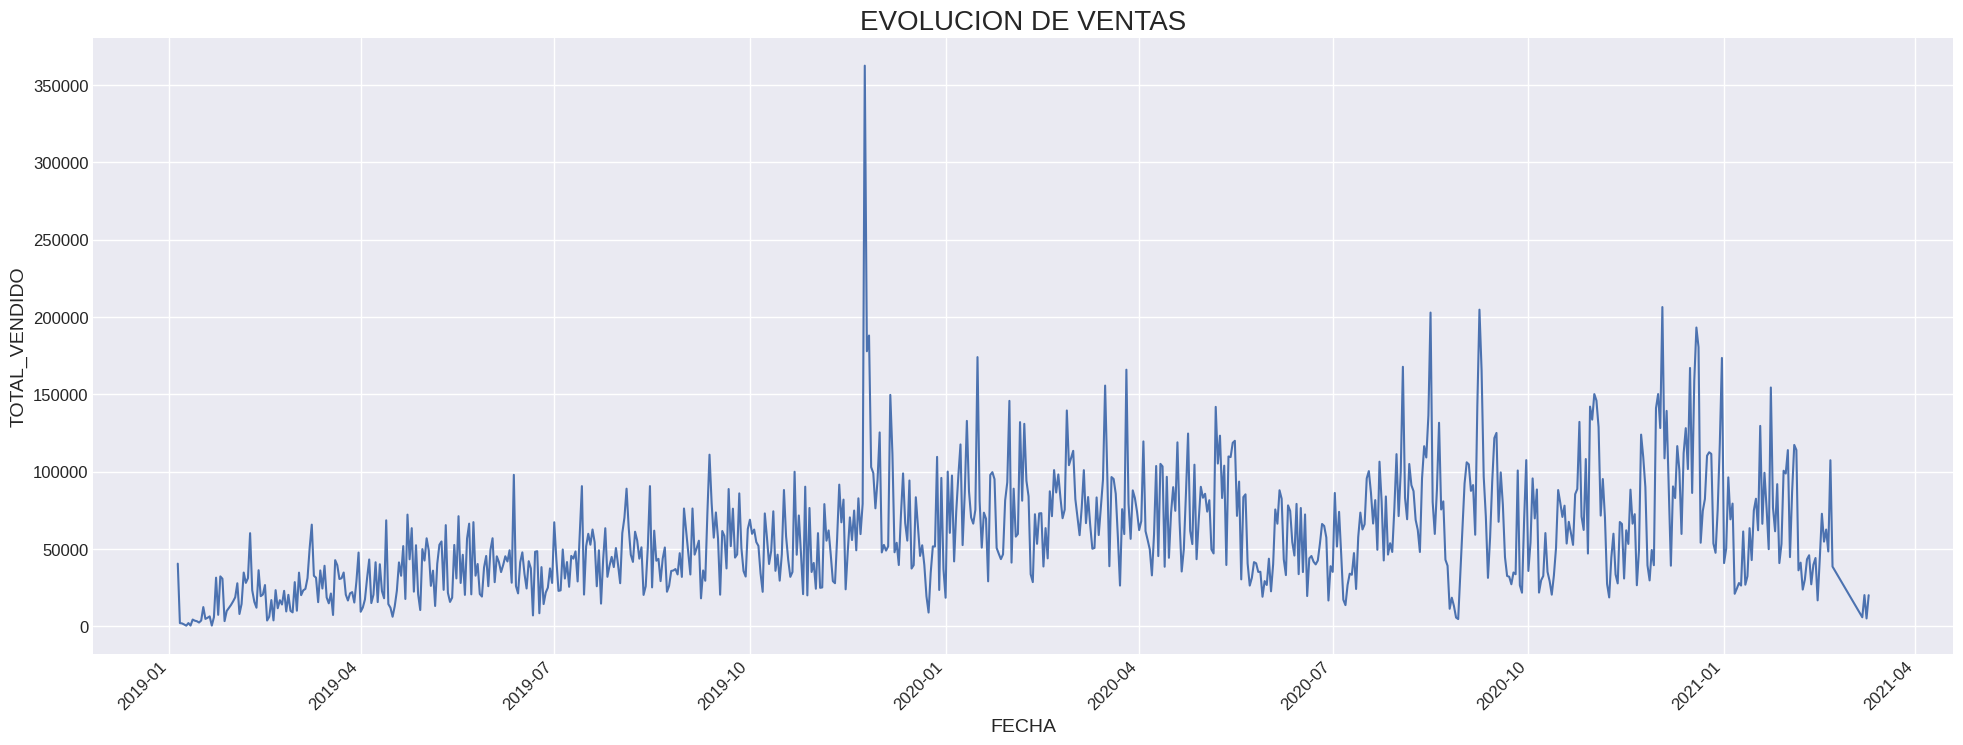

In [115]:
sns.set(style="whitegrid")
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(24, 8))

lineplot = sns.lineplot(x='fecha_compra', y='suma', data=ventas_por_dia, palette='viridis', ci=None)

plt.title('EVOLUCION DE VENTAS', fontsize=20)
plt.xlabel('FECHA', fontsize=14)
plt.ylabel('TOTAL_VENDIDO', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir etiquetas en cada barra
for p in lineplot.patches:
    # Usando el valor de la altura de la barra para mostrar la suma
    lineplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points',
                     fontsize=12)

plt.show()

In [116]:
ventas_por_dia_ordenadas = ventas_por_dia.sort_values('suma', ascending=False)
ventas_por_dia_ordenadas.head(10)

fecha_compra      suma
323   2019-11-24  362451.0
695   2020-12-03  206430.0
609   2020-09-08  204738.0
588   2020-08-16  202854.0
711   2020-12-19  193202.0
325   2019-11-26  188020.0
712   2020-12-20  180510.0
324   2019-11-25  177858.0
376   2020-01-16  174069.0
723   2020-12-31  173527.0

In [117]:
ventas_por_dia_ordenadas = ventas_por_dia.sort_values('suma', ascending=False)
ventas_por_dia_ordenadas.tail(10)

fecha_compra    suma
22   2019-01-27  3448.0
9    2019-01-14  3360.0
10   2019-01-15  2520.0
5    2019-01-10  2190.0
1    2019-01-06  2160.0
2    2019-01-07  1950.0
3    2019-01-08  1280.0
16   2019-01-21   560.0
6    2019-01-11   556.0
4    2019-01-09   500.0

<ipython-input-118-48811e1c7c22>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-118-48811e1c7c22>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='dia_semana', y='valor_total', data=ventas_por_dia_semana, palette='viridis')


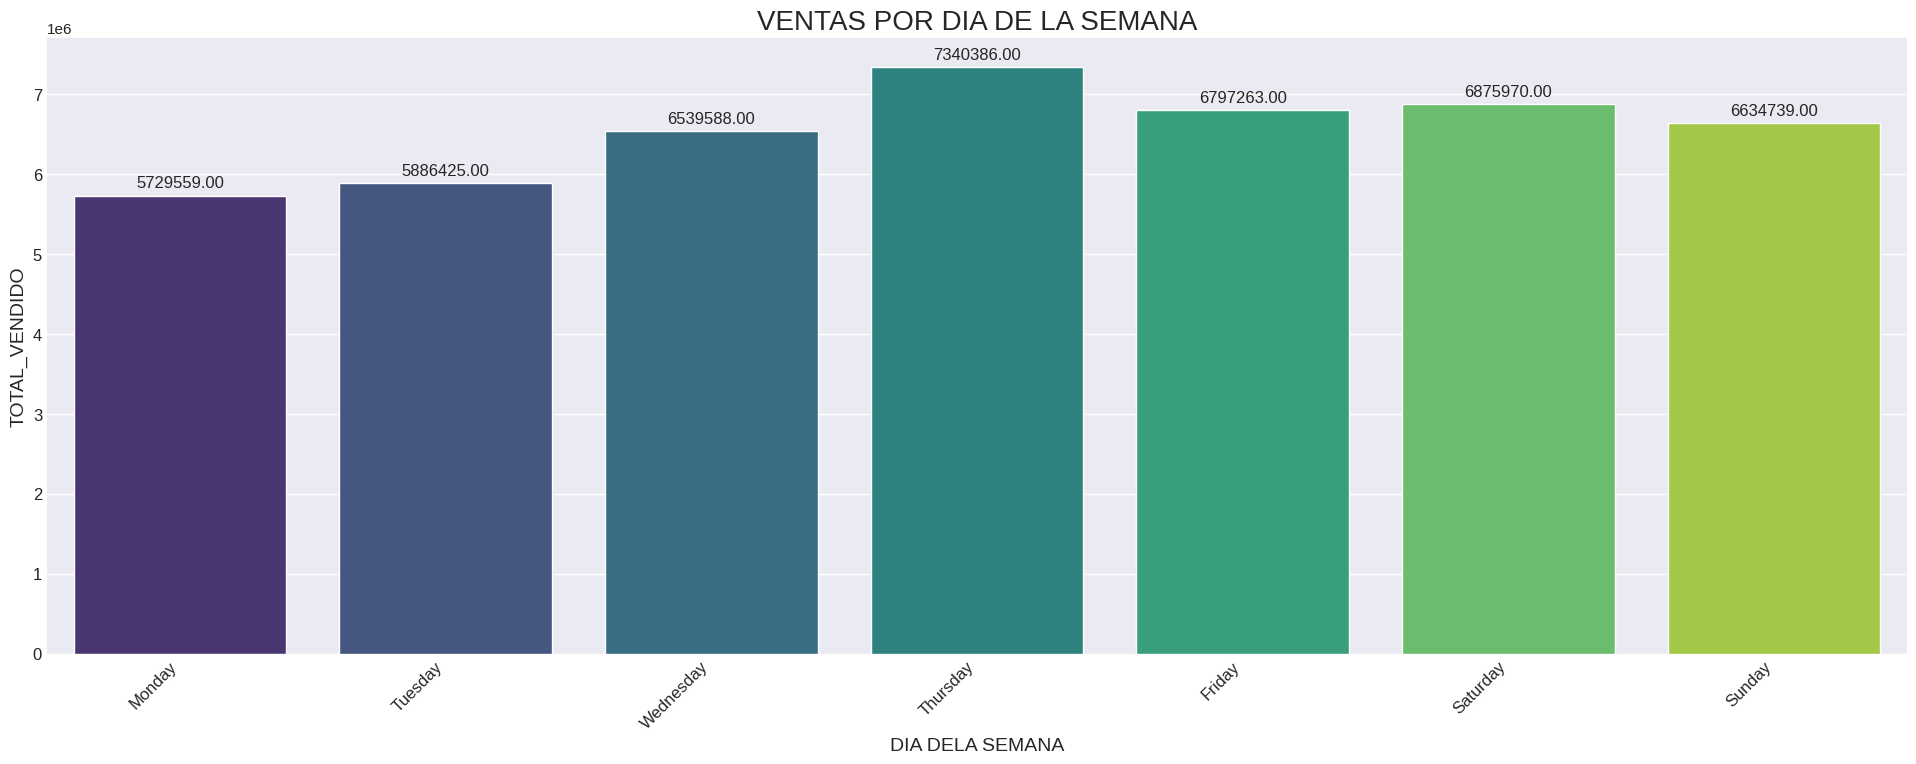

In [118]:
sns.set(style="whitegrid")
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(24, 8))

barplot = sns.barplot(x='dia_semana', y='valor_total', data=ventas_por_dia_semana, palette='viridis')

plt.title('VENTAS POR DIA DE LA SEMANA', fontsize=20)
plt.xlabel('DIA DELA SEMANA', fontsize=14)
plt.ylabel('TOTAL_VENDIDO', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir etiquetas en cada barra
for p in barplot.patches:
    # Usando el valor de la altura de la barra para mostrar la suma
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points',
                     fontsize=12)

plt.show()

<ipython-input-119-9b91ab0f8d62>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-119-9b91ab0f8d62>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=ventas_por_año, x='año', y='suma', palette='viridis', ci= None)
<ipython-input-119-9b91ab0f8d62>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=ventas_por_año, x='año', y='suma', palette='viridis', ci= None)


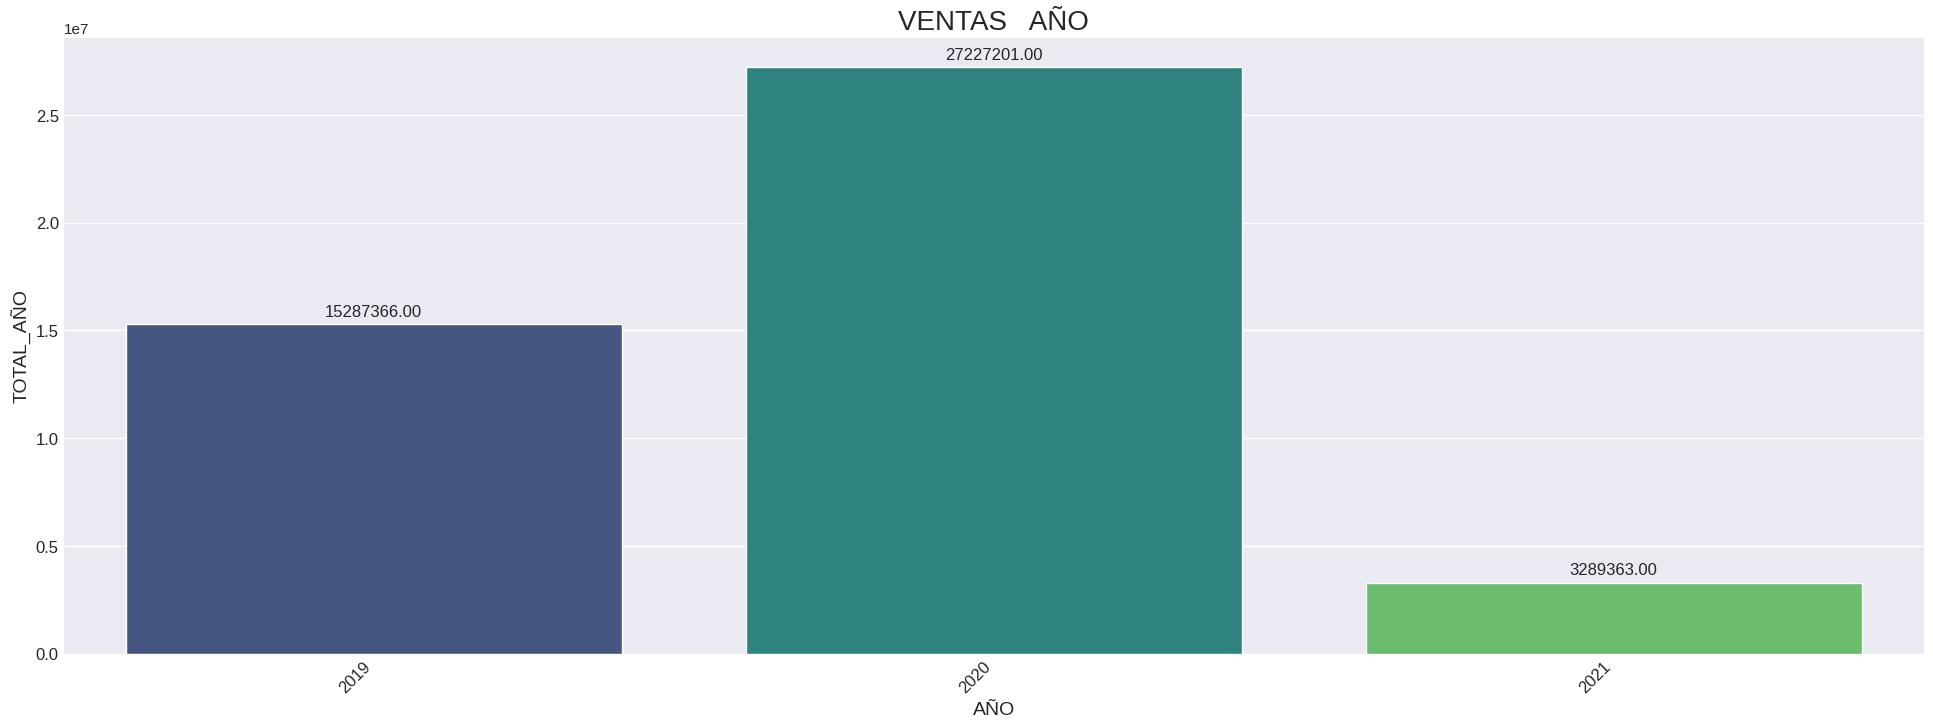

In [119]:
sns.set(style="whitegrid")
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(24, 8))

barplot = sns.barplot(data=ventas_por_año, x='año', y='suma', palette='viridis', ci= None)

plt.title('VENTAS   AÑO', fontsize=20)
plt.xlabel('AÑO', fontsize=14)
plt.ylabel('TOTAL_AÑO', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir etiquetas en cada barra
for p in barplot.patches:
    # Usando el valor de la altura de la barra para mostrar la suma
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points',
                     fontsize=12)

plt.show()

# VENDEDOR

Paulo Calanca fue el vendedor con mayores ventas acumuladas desde 2019 hasta 2021. Sin embargo, en 2020, su rendimiento disminuyó en comparación con el año anterior, y en el primer trimestre de 2021, tanto Ana Duarte como Daniel Siquiera lograron superar sus ventas, duplicando prácticamente sus propios números. Este cambio indica un notable aumento en la efectividad de ventas de Ana y Daniel, quienes han mejorado significativamente su desempeño, superando a Paulo en las ventas iniciales de 2021.

**Posibles Razones para el Cambio en las Ventas**

*   Estrategias de Venta Diferentes: Los vendedores pueden estar utilizando métodos de venta distintos, algunos de los cuales pueden ser más efectivos bajo ciertas condiciones de mercado o con ciertos segmentos de clientes.

*   Cambio en las Preferencias del Consumidor: Si los productos que ofrece Paulo ya no están alineados con las tendencias actuales o las necesidades del mercado, esto podría afectar sus ventas negativamente.

*   Capacitación y Motivación: La falta de capacitación continua o desmotivación personal también puede impactar el rendimiento de un vendedor.

*   Competencia Interna y Externa: Una competencia más agresiva tanto dentro del equipo de ventas como de competidores externos podría estar influyendo en las cifras.

*   Portfolio de Productos: Quizás Ana y Daniel han diversificado los productos que ofrecen o se enfocan en artículos más demandados.

*   Relaciones con los Clientes: Las habilidades de relación con el cliente de Ana y Daniel podrían ser superiores, generando repetición de negocios y referencias.

**Recomendaciones para Mejorar las Ventas**

*   Capacitación en Ventas: Proporcionar a Paulo (y al resto del equipo) formación continua en técnicas de venta modernas y estrategias de negociación.

*   Análisis de Datos de Ventas: Utilizar análisis de datos para identificar qué productos están vendiendo bien y ajustar el enfoque de ventas de Paulo.
Incentivos y Motivación: Revisar el sistema de incentivos para asegurar que motiva adecuadamente a los vendedores.

*   Mejora del Engagement del Cliente: Implementar herramientas o sistemas para mejorar la relación con los clientes, como CRM, para personalizar el servicio y mejorar la satisfacción del cliente.

*   Feedback Regular: Establecer sesiones de retroalimentación con Paulo para entender sus desafíos y ajustar su enfoque de ventas según sea necesario.

<ipython-input-120-44feb40d12a6>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


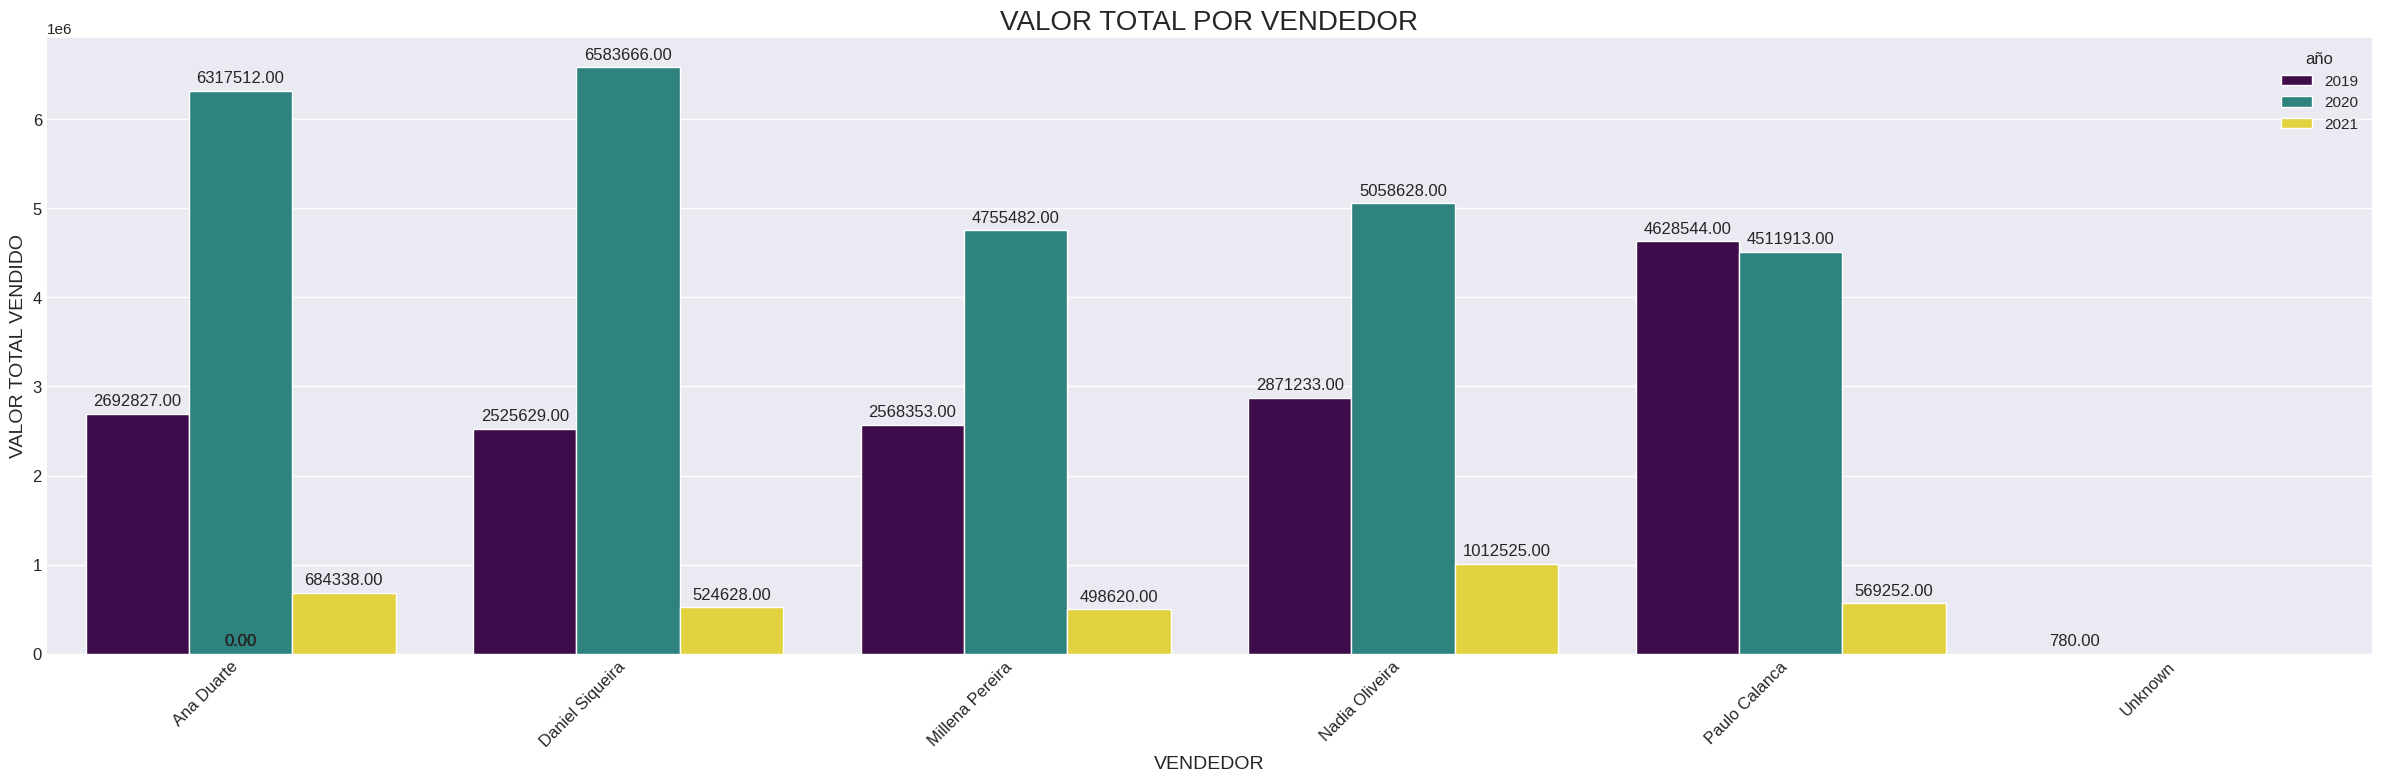

In [120]:
# Ventas por vendedor / año

ventas_por_vendedor_año = df_transacciones_producto_vendedor.groupby(['nombre_vendedor', 'año'])['valor_total'].sum().reset_index()

sns.set(style="whitegrid")
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(30, 8))

barplot = sns.barplot(data=ventas_por_vendedor_año, x='nombre_vendedor', y='valor_total', hue='año', palette='viridis')

plt.title('VALOR TOTAL POR VENDEDOR', fontsize=20)
plt.xlabel('VENDEDOR', fontsize=14)
plt.ylabel('VALOR TOTAL VENDIDO', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir etiquetas en cada barra
for p in barplot.patches:
    # Usando el valor de la altura de la barra para mostrar la suma
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points',
                     fontsize=12)

plt.show()

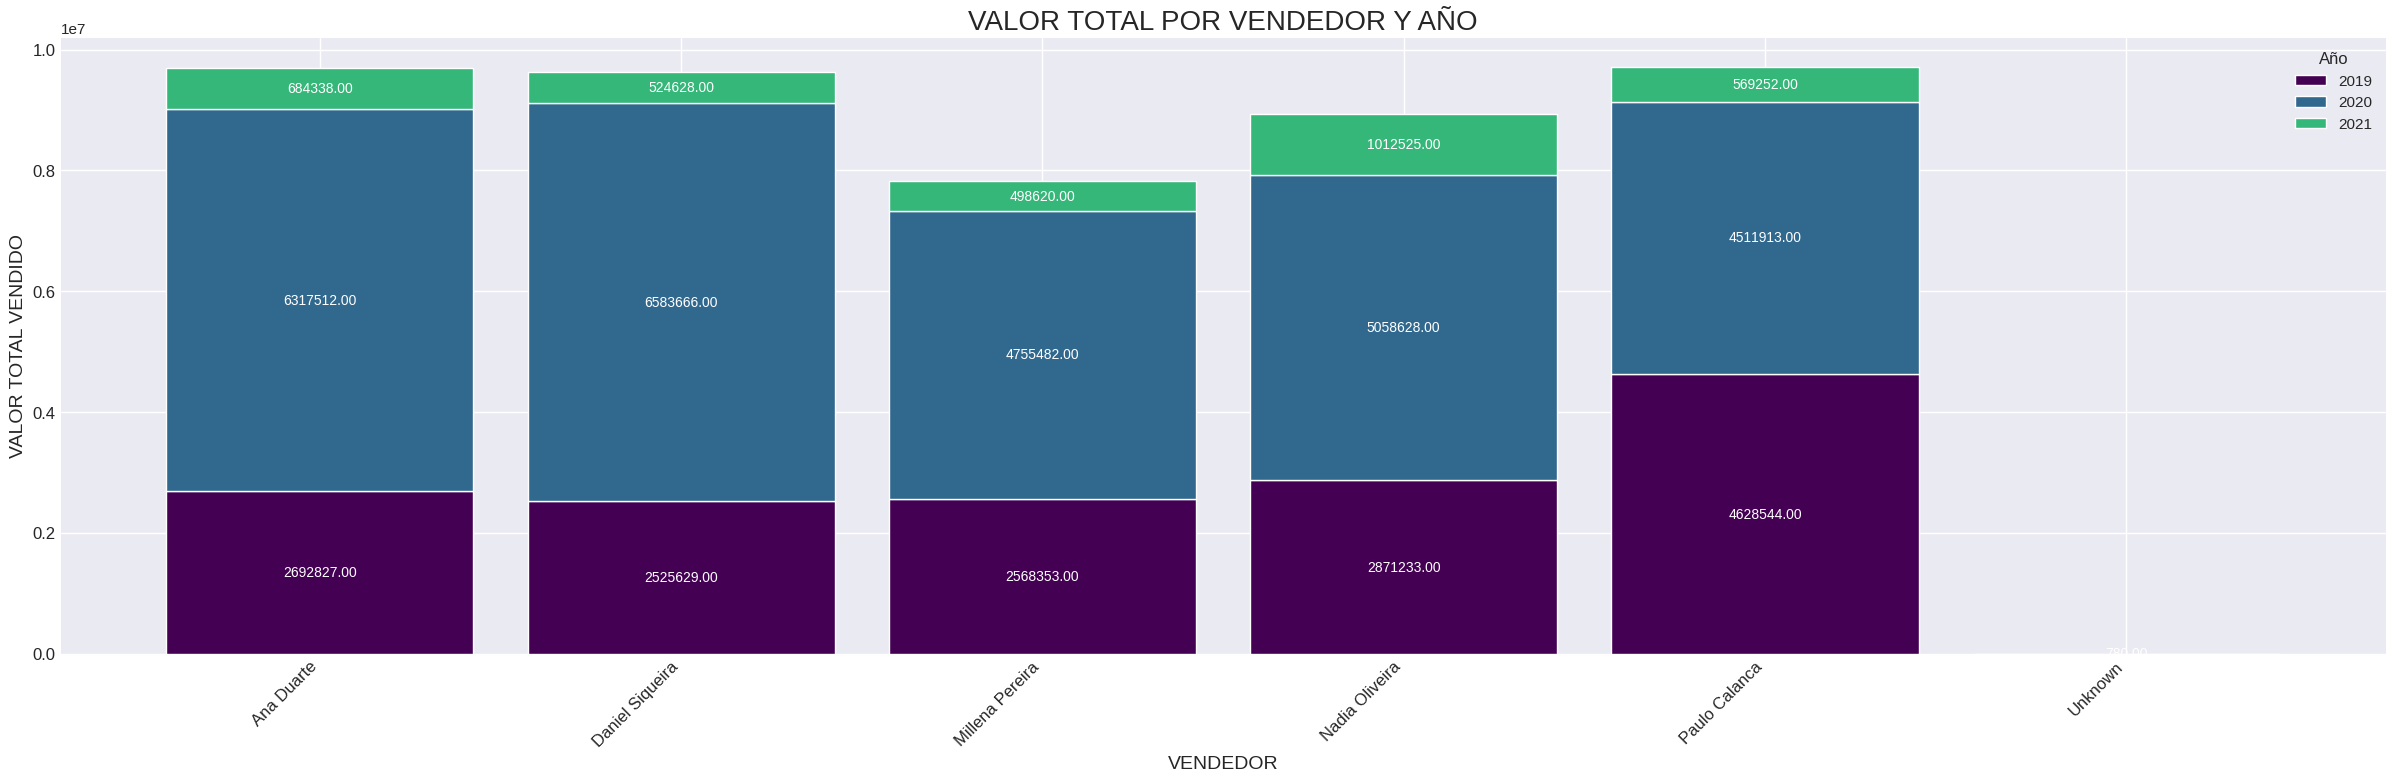

In [121]:
from matplotlib.patches import Patch
plt.figure(figsize=(30, 8))


bottom_dict = {vendedor: 0 for vendedor in ventas_por_vendedor_año['nombre_vendedor'].unique()} # # Inicializa un diccionario para almacenar la posición 'bottom' de cada vendedor para las barras

bottom_labels_dict = {vendedor: 0 for vendedor in ventas_por_vendedor_año['nombre_vendedor'].unique()} # # Inicializa un diccionario para almacenar la posición 'bottom' de cada vendedor para las etiquetas

palette = plt.get_cmap('viridis')
years = ventas_por_vendedor_año['año'].unique()
color_dict = {year: palette(i/len(years)) for i, year in enumerate(years)}

for i, row in ventas_por_vendedor_año.iterrows():
    plt.bar(row['nombre_vendedor'], row['valor_total'], bottom=bottom_dict[row['nombre_vendedor']],
            color=color_dict[row['año']], edgecolor='white', width=0.85)

    label_position = bottom_dict[row['nombre_vendedor']] + row['valor_total'] / 2
    plt.text(row['nombre_vendedor'], label_position, f"{row['valor_total']:.2f}",
             color='white', ha='center', va='center', fontsize=10)

    bottom_dict[row['nombre_vendedor']] += row['valor_total']

legend_elements = [Patch(facecolor=color_dict[year], edgecolor='w', label=year) for year in years]
plt.legend(handles=legend_elements, title="Año")

plt.title('VALOR TOTAL POR VENDEDOR Y AÑO', fontsize=20)
plt.xlabel('VENDEDOR', fontsize=14)
plt.ylabel('VALOR TOTAL VENDIDO', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.show()


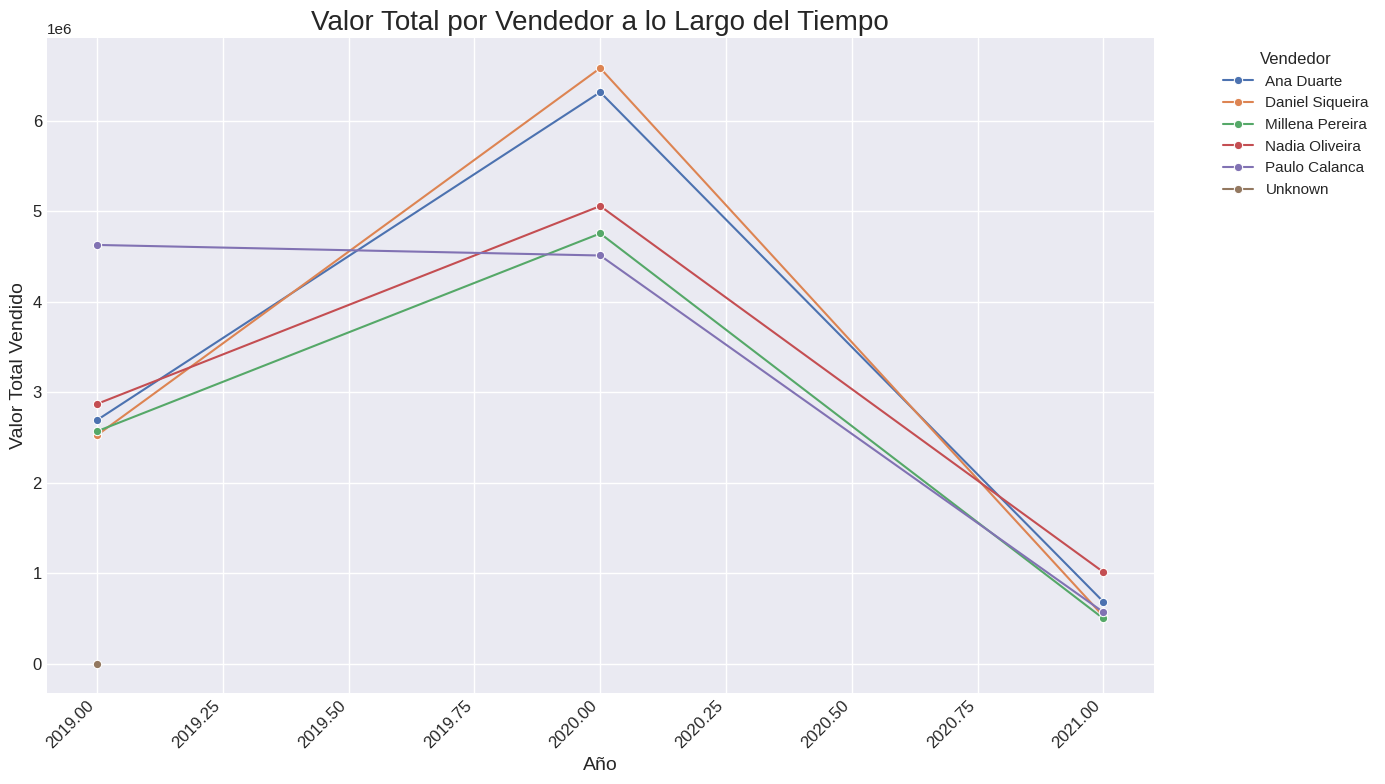

In [122]:

plt.figure(figsize=(14, 8))
sns.lineplot(data=ventas_por_vendedor_año, x='año', y='valor_total', hue='nombre_vendedor', marker='o')
plt.title('Valor Total por Vendedor a lo Largo del Tiempo', fontsize=20)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Valor Total Vendido', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Vendedor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-123-0c2521cced4e>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-123-0c2521cced4e>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='nombre_vendedor', y='valor_total', data=df_agrupado, palette='viridis', ci=None)
<ipython-input-123-0c2521cced4e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='nombre_vendedor', y='valor_total', data=df_agrupado, palette='viridis', ci=None)


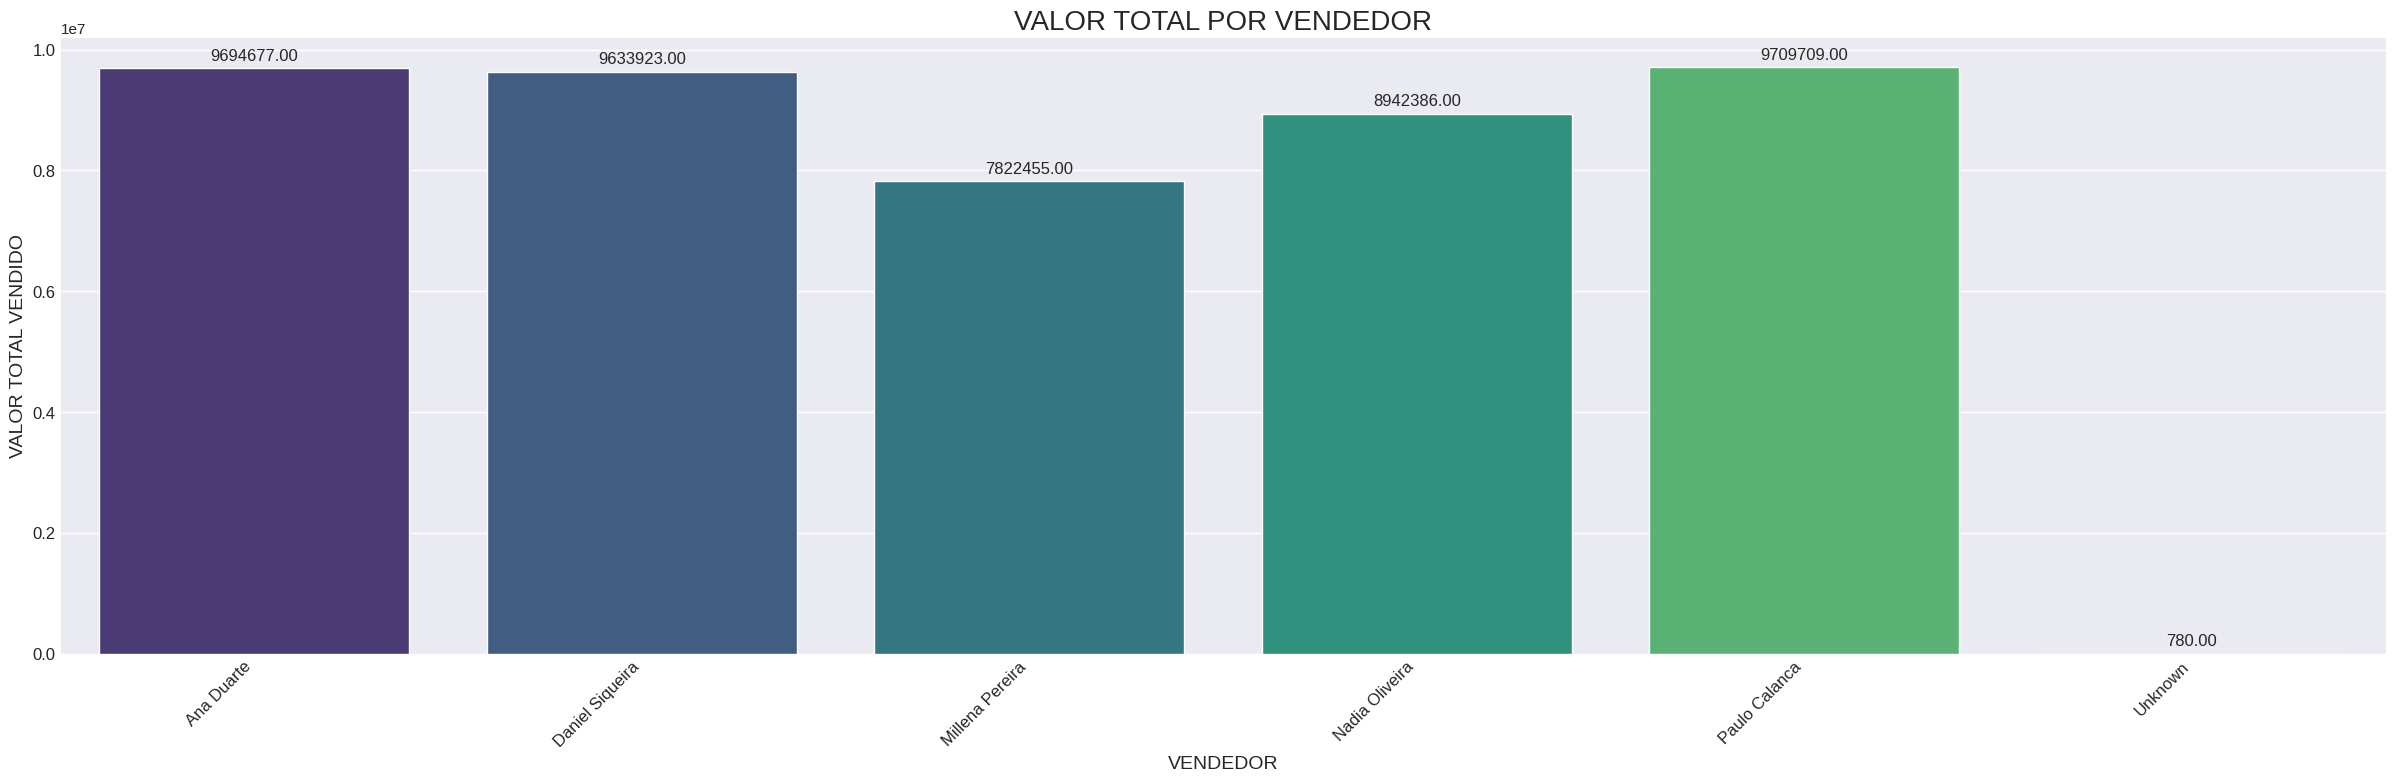

In [123]:
# Ventas por vendedor

df_agrupado = df_transacciones_producto_vendedor.groupby('nombre_vendedor', as_index=False)['valor_total'].sum()

sns.set(style="whitegrid")
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(30, 8))

barplot = sns.barplot(x='nombre_vendedor', y='valor_total', data=df_agrupado, palette='viridis', ci=None)

plt.title('VALOR TOTAL POR VENDEDOR', fontsize=20)
plt.xlabel('VENDEDOR', fontsize=14)
plt.ylabel('VALOR TOTAL VENDIDO', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir etiquetas en cada barra
for p in barplot.patches:
    # Usando el valor de la altura de la barra para mostrar la suma
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points',
                     fontsize=12)

plt.show()

<ipython-input-124-92d02a94831c>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-124-92d02a94831c>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='nombre_vendedor', y='valor_total', data=df_agrupado, palette='viridis', ci=None)
<ipython-input-124-92d02a94831c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='nombre_vendedor', y='valor_total', data=df_agrupado, palette='viridis', ci=None)


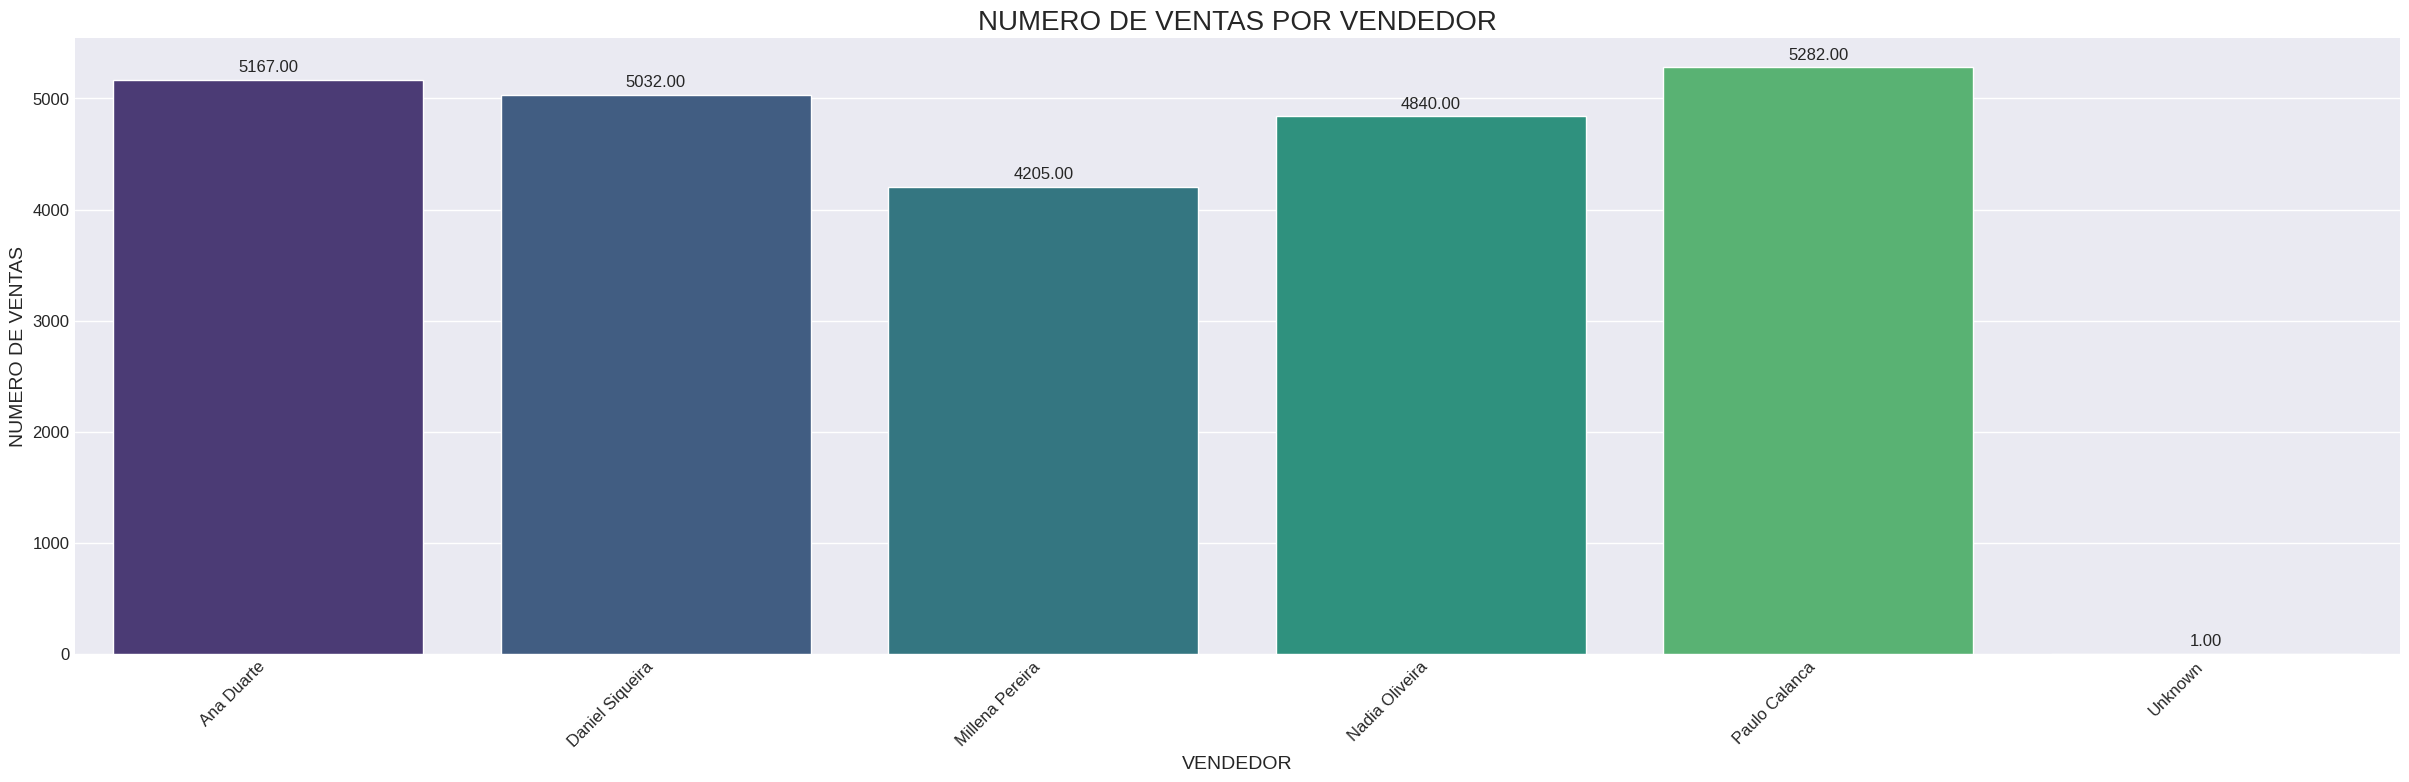

In [124]:
# Ventas por vendedor

df_agrupado = df_transacciones_producto_vendedor.groupby('nombre_vendedor', as_index=False)['valor_total'].count()

sns.set(style="whitegrid")
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(30, 8))

barplot = sns.barplot(x='nombre_vendedor', y='valor_total', data=df_agrupado, palette='viridis', ci=None)

plt.title('NUMERO DE VENTAS POR VENDEDOR', fontsize=20)
plt.xlabel('VENDEDOR', fontsize=14)
plt.ylabel('NUMERO DE VENTAS', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir etiquetas en cada barra
for p in barplot.patches:
    # Usando el valor de la altura de la barra para mostrar la suma
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points',
                     fontsize=12)

plt.show()

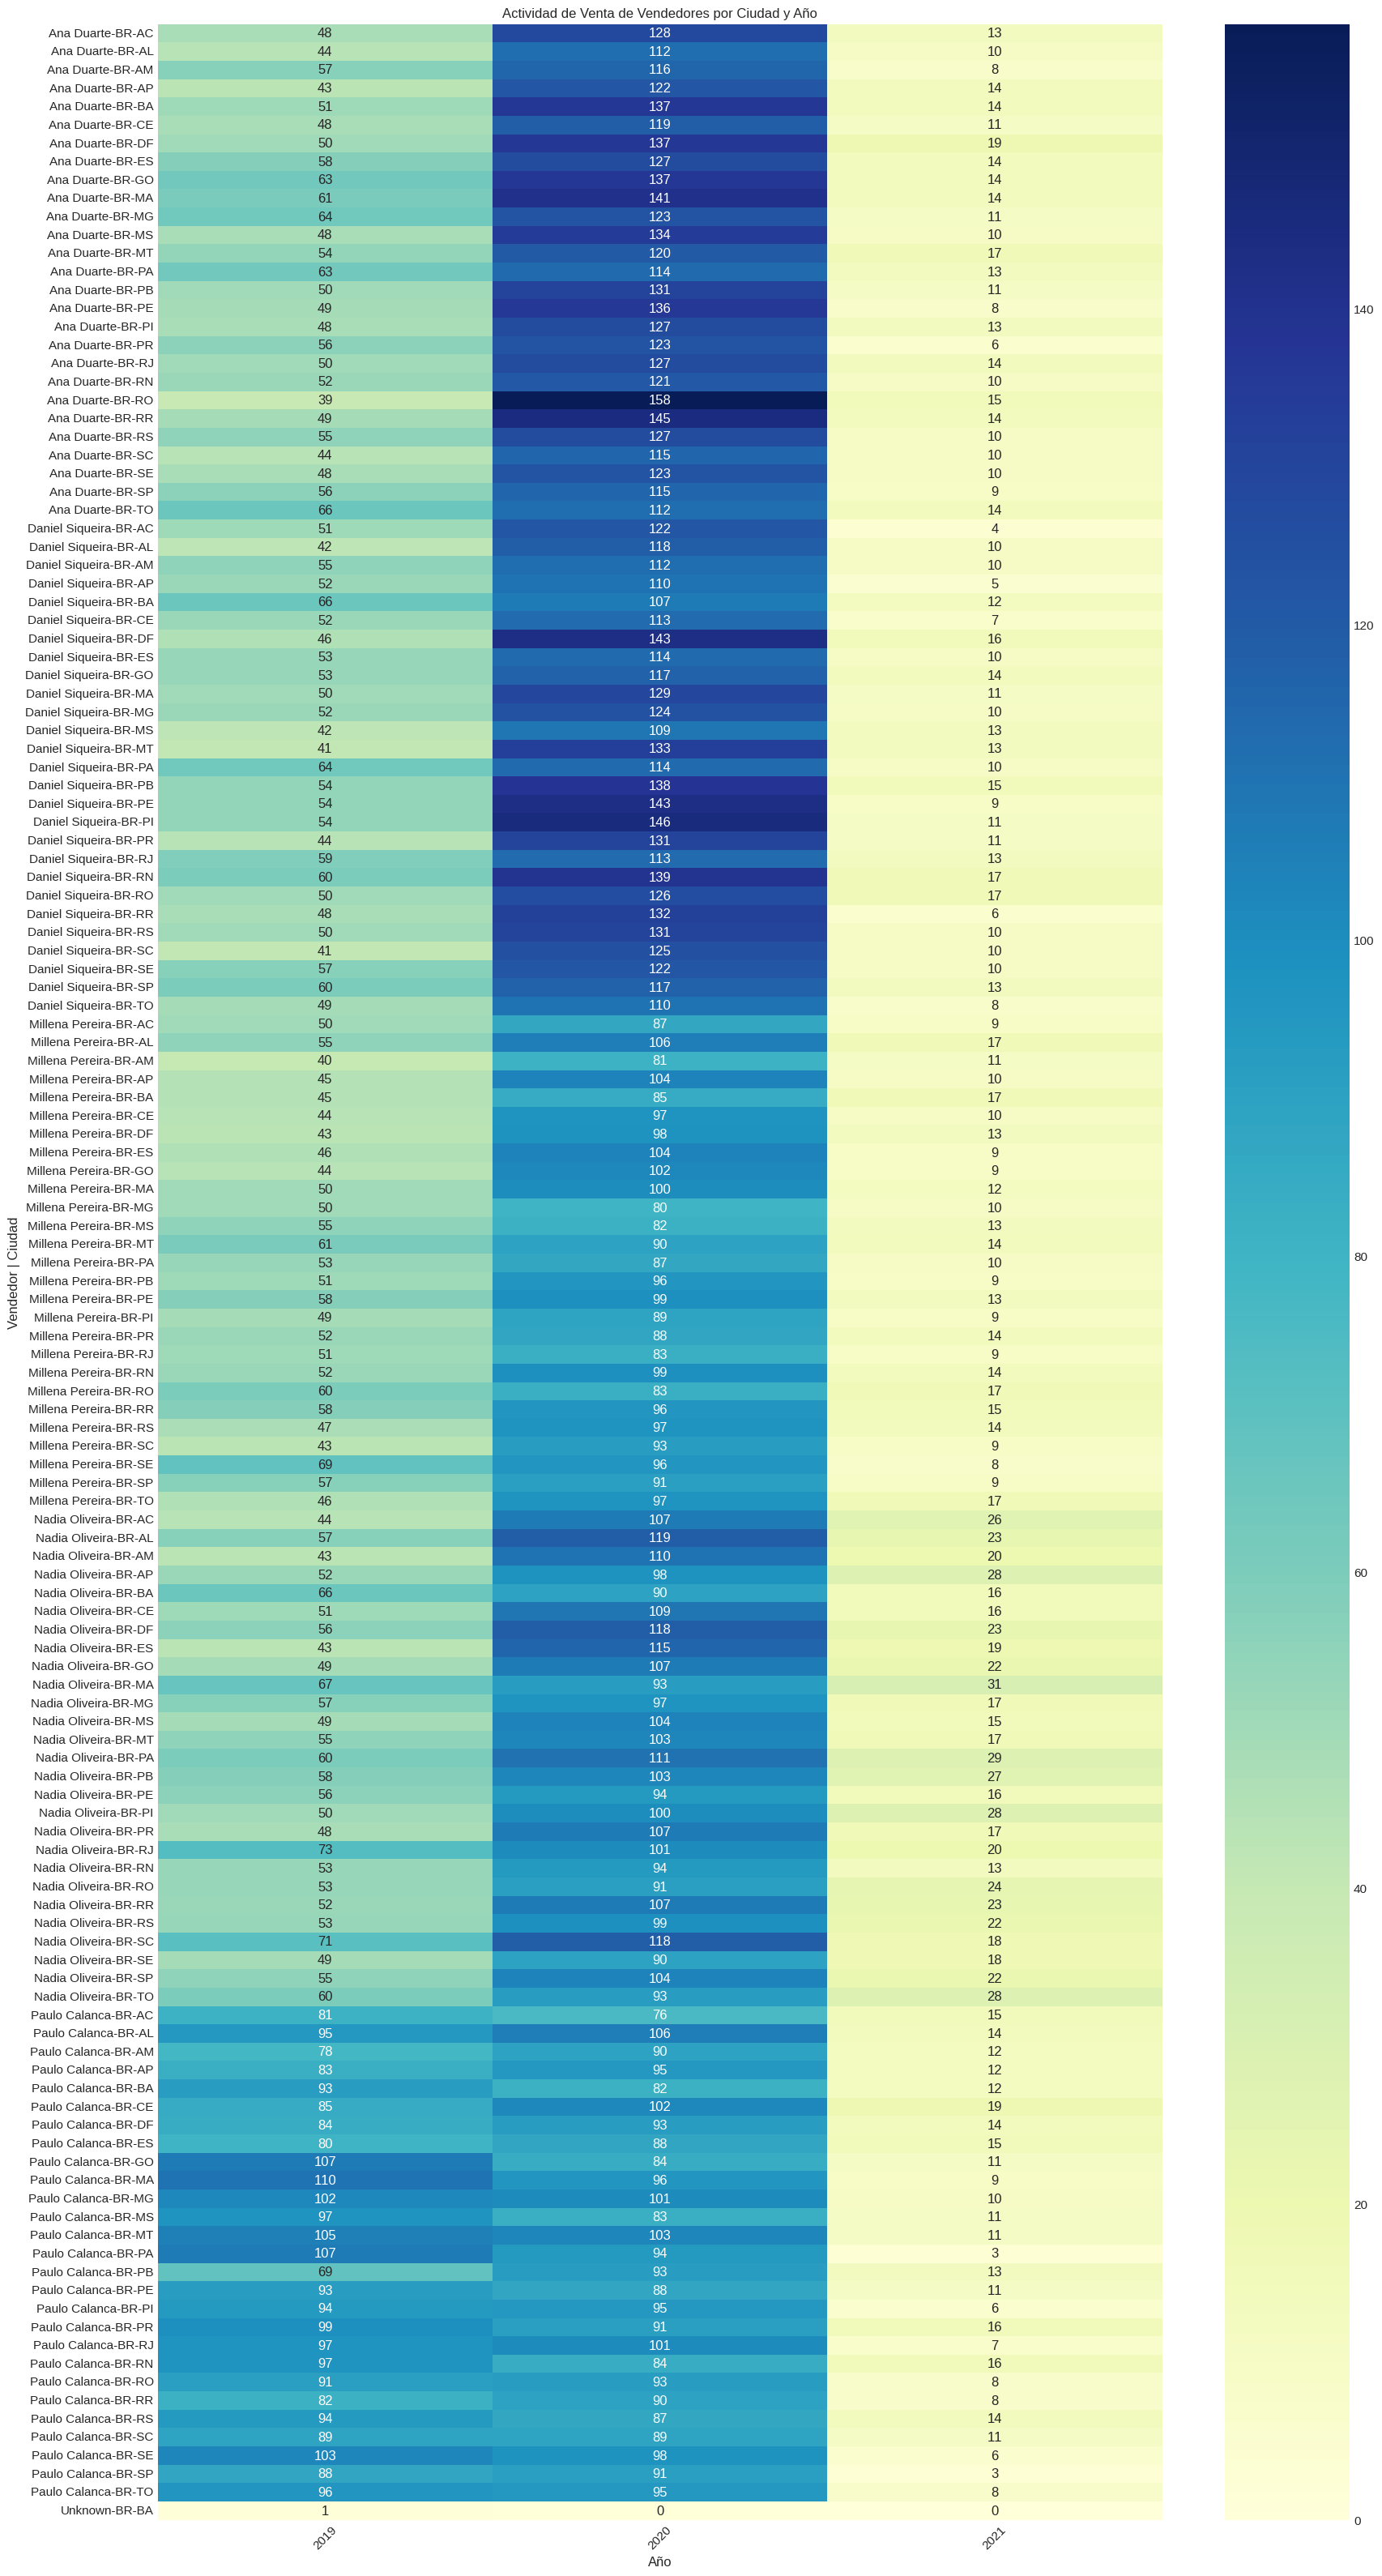

In [125]:
ventas_ciudad_año = df_transacciones_producto_vendedor.groupby(['nombre_vendedor', 'ciudad', 'año'])['valor_total'].count().reset_index(name='ventas')

pivot_table = ventas_ciudad_año.pivot_table(index=['nombre_vendedor', 'ciudad'], columns='año', values='ventas', fill_value=0)

plt.figure(figsize=(20, 40))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Actividad de Venta de Vendedores por Ciudad y Año')
plt.ylabel('Vendedor | Ciudad')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.show()

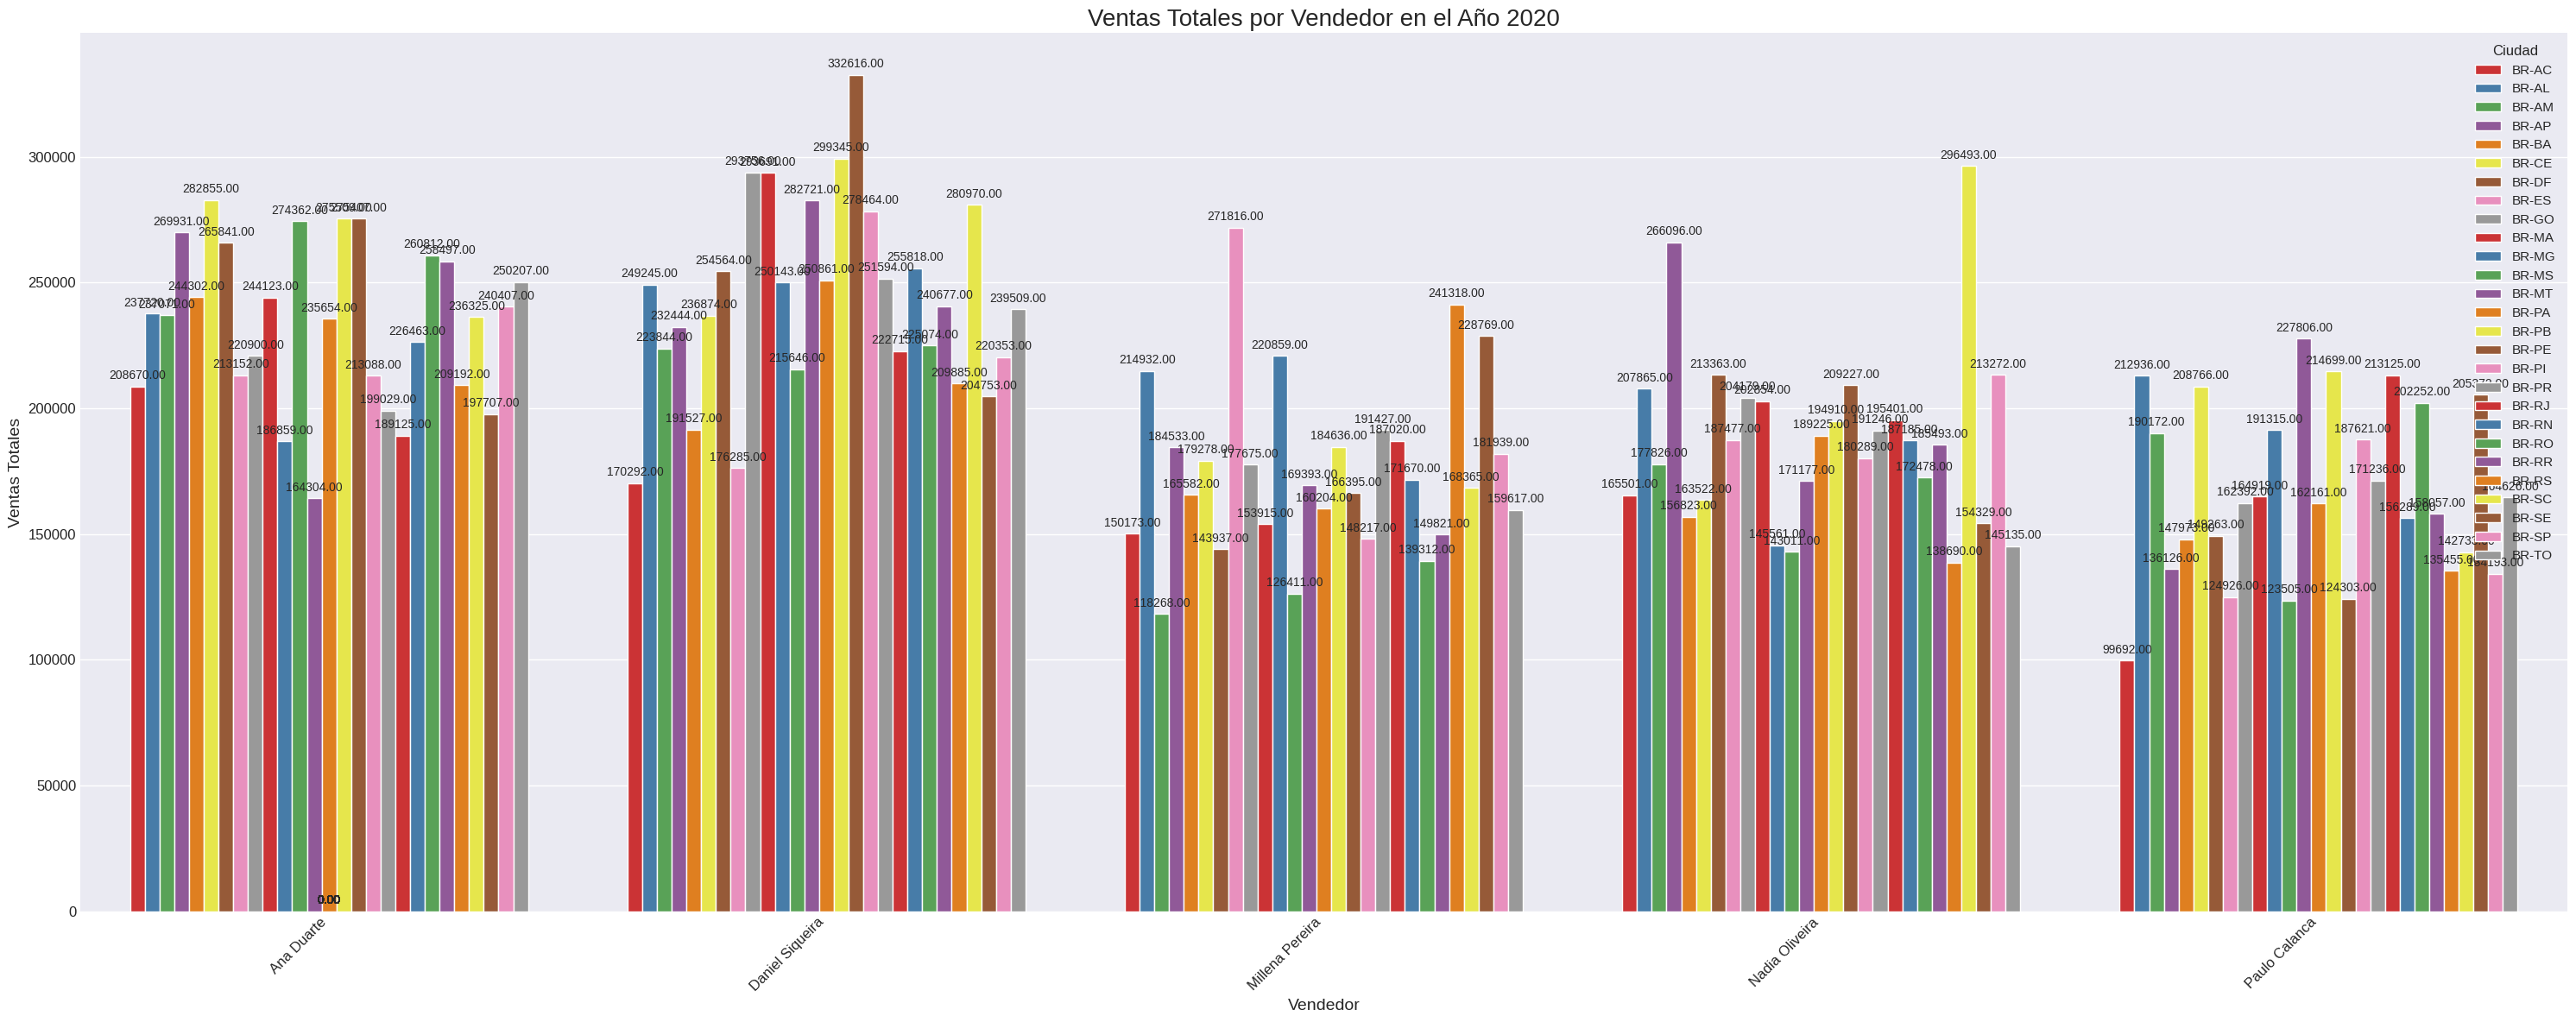

In [126]:
# Para seleccionar año

año_especifico = 2020
datos_año_especifico = df_transacciones_producto_vendedor[df_transacciones_producto_vendedor['año'] == año_especifico]


ventas_por_vendedor_ciudad = datos_año_especifico.groupby(['nombre_vendedor', 'ciudad'])['valor_total'].sum().reset_index()

plt.figure(figsize=(30, 12))
barplot = sns.barplot(data=ventas_por_vendedor_ciudad, x='nombre_vendedor', y='valor_total', hue='ciudad', palette='Set1')

plt.title(f'Ventas Totales por Vendedor en el Año {año_especifico}', fontsize=20)
plt.xlabel('Vendedor', fontsize=14)
plt.ylabel('Ventas Totales', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Ciudad')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points',
                     fontsize=10)

plt.tight_layout()
plt.show()


#PRODUCTOS

**Distribución de Precios:** Nuestra evaluación revela que la mayoría de los productos se ofrecen a precios accesibles, lo que indica una estrategia orientada hacia productos de menor costo y alta rotación. Esto podría ser un reflejo de una táctica deliberada para atraer a un segmento de mercado más amplio que busca opciones económicas.

**Dominio de Marcas**: Marcas como Zara, Mixed, Animale, Le Lis Blanc y Banana Republic dominan nuestro inventario en términos de volumen. Esta concentración de marcas conocidas podría ser explotada para fortalecer la imagen de marca y la lealtad del cliente mediante campañas de marketing específicas.

**Condición de los Productos:** La prevalencia de productos usados sugiere que nuestra tienda podría estar especializándose en el mercado de moda de segunda mano. Esta es una excelente oportunidad para posicionarnos como líderes en moda sostenible, a través de iniciativas de reciclaje y reutilización.

**Variabilidad de las Ventas: **Las fluctuaciones en las ventas a lo largo del tiempo nos indican patrones estacionales, lo que puede ser crucial para planificar inventarios y promociones de manera más efectiva, alineando nuestras estrategias de marketing con los picos de demanda.

**Productos más Vendidos:** Artículos como Bolsas Classica Roxa, Bolsa Intrecciato Caramelo y Sapato Cetim Pink son nuestros más vendidos, lo que subraya la importancia de mantener un buen stock de estos productos y centrar en ellos nuestras estrategias promocionales.

**Análisis de Ventas y Costos por Ciudad**

*   Distribución de Ventas: Nuestro análisis regional muestra que ciertas ciudades generan más ingresos que otras, lo que podría guiar la distribución de nuestros esfuerzos de marketing y optimización logística para capitalizar sobre estas áreas de alto rendimiento.

*   Costo de Envío: La ciudad que tiene los mayores costo de envio es BR-AL, seguido de BR-PE y el mayor cotos de envio promedio es de BR-AP , BR-SC y BR-CE respectivamente, indicativo de quien genera mas costos por los volumenes de ventas a quien tiene un mayor costo pormedio que se tendra que revisar que lo ocasiona.

**Recomendaciones Estratégicas**

*   Optimización de Inventario: Priorizar el mantenimiento de un stock adecuado de los productos más vendidos y reevaluar la estrategia para aquellos con menor salida.

*   Estrategia de Precios Dinámicos: Implementar una estrategia de precios dinámicos que se adapte a las fluctuaciones del mercado y a eventos especiales, para maximizar los ingresos y la competitividad.

*   Marketing Personalizado: Desarrollar campañas de marketing enfocadas en las ciudades con mayores ventas y segmentar los esfuerzos promocionales para dirigirse a clientes específicos basados en sus patrones de compra.

*   Mejora Logística: Explorar opciones para reducir los costos de envío en las áreas más costosas y considerar la posibilidad de establecer almacenes en regiones estratégicas para mejorar los tiempos de entrega y reducir costos.

<ipython-input-127-5722d5fbbae1>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


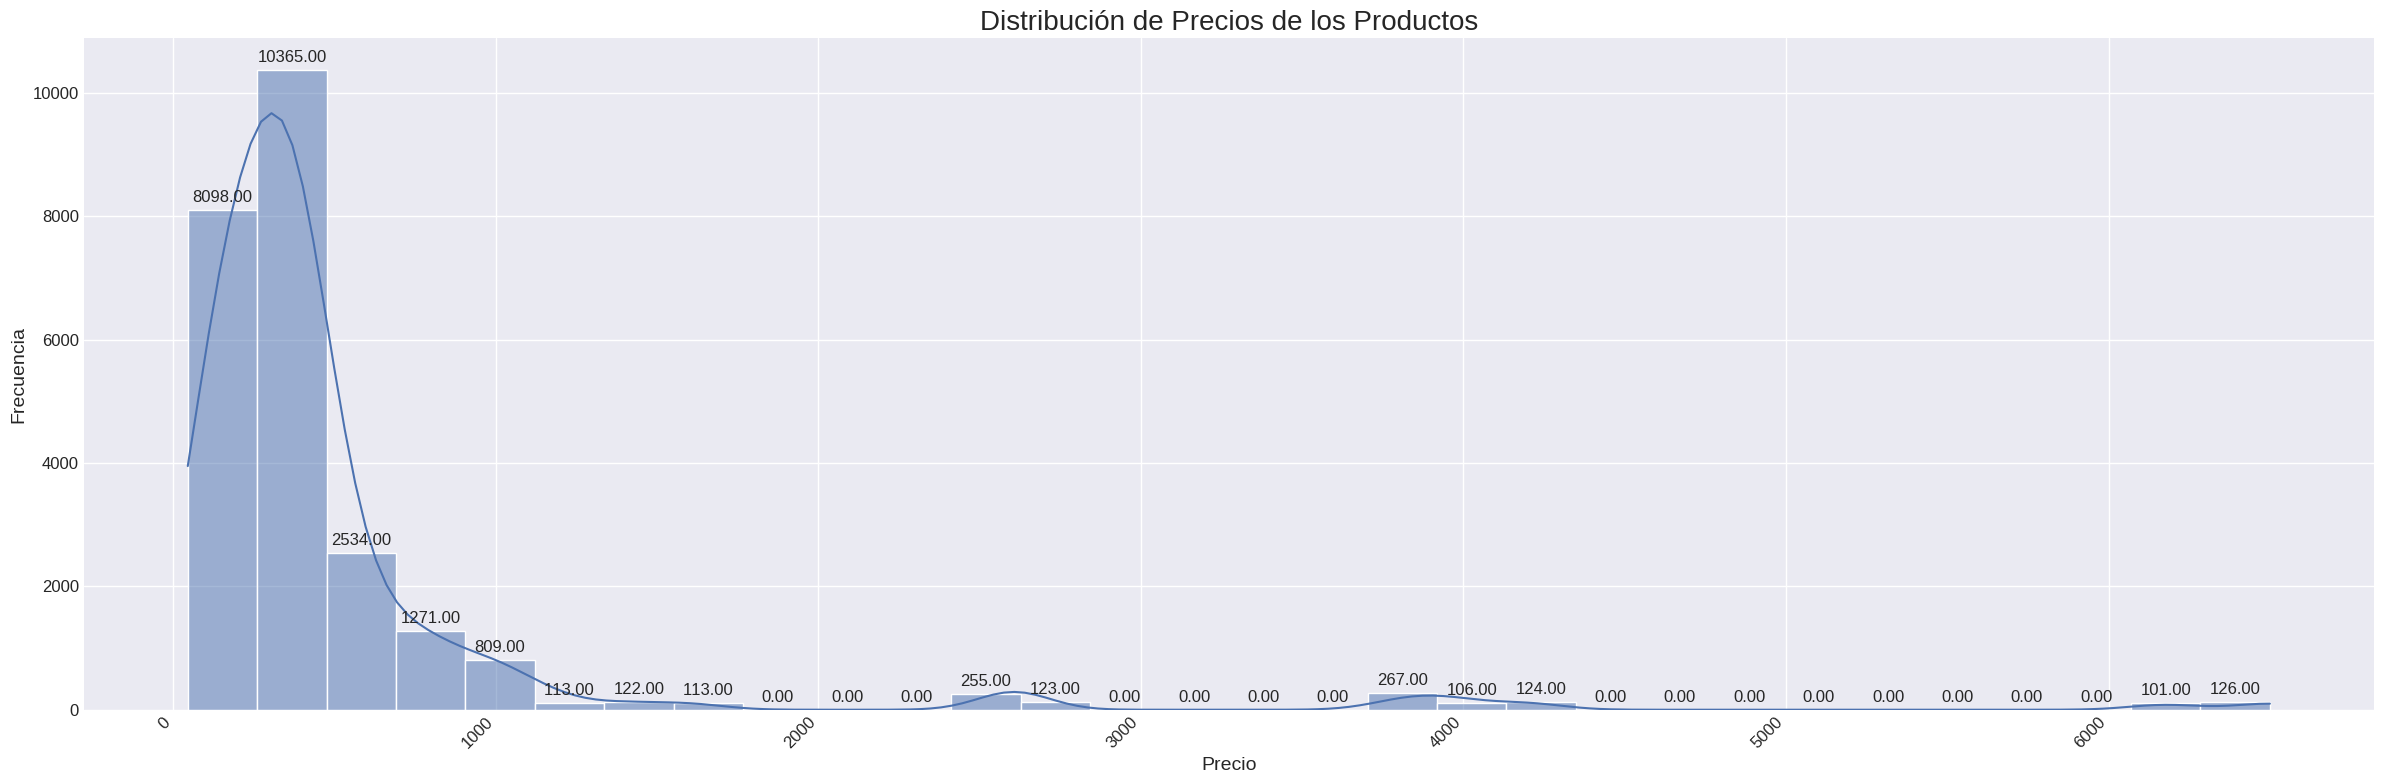

In [127]:
sns.set(style="whitegrid")
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(24, 8))

snsplot = sns.histplot(df_transacciones_producto_vendedor['precio'], bins=30, kde=True)

plt.title('Distribución de Precios de los Productos', fontsize=20)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

for p in snsplot.patches:

    snsplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points',
                     fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-128-4cff82e492c5>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


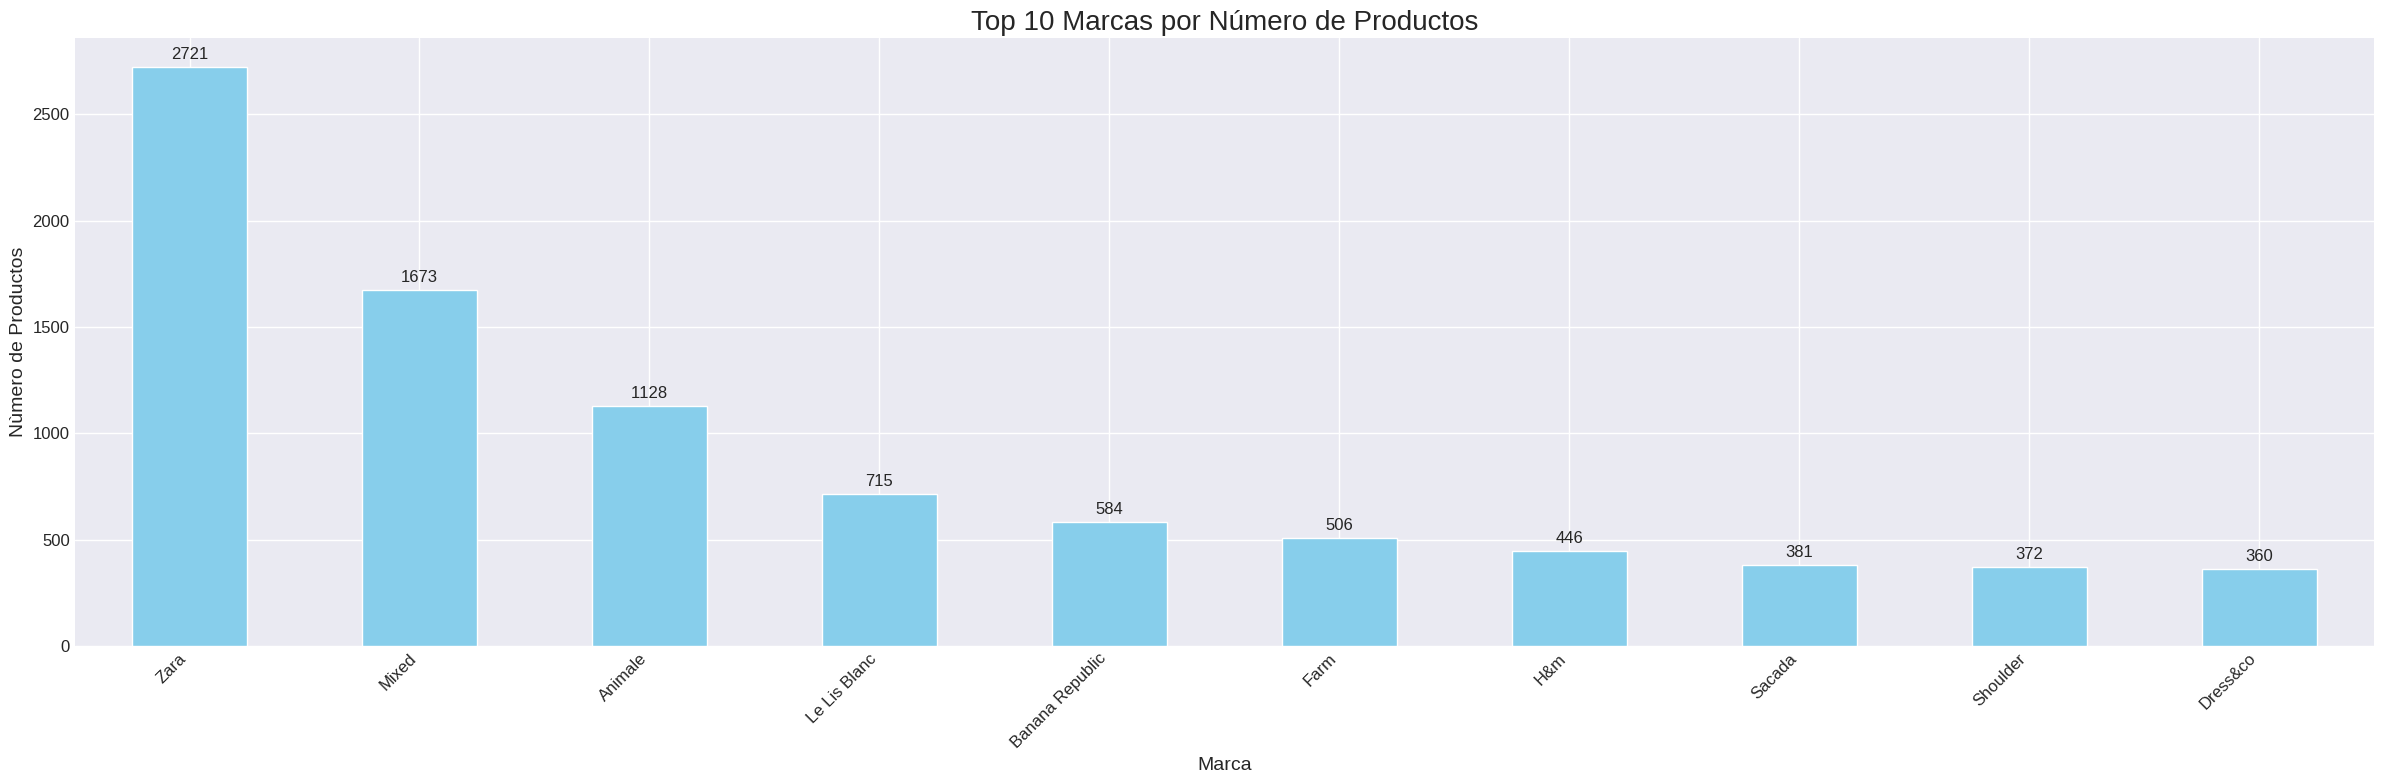

In [128]:
top_marcas = df_transacciones_producto_vendedor['marca'].value_counts().head(10)

sns.set(style="whitegrid")
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(24, 8))

barplot = top_marcas.plot(kind='bar', color='skyblue')

plt.title('Top 10 Marcas por Número de Productos', fontsize=20)
plt.xlabel('Marca', fontsize=14)
plt.ylabel('Nùmero de Productos', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

for p in barplot.patches:

    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points',
                     fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-129-be394b04be3a>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-129-be394b04be3a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_productos_, x='producto', y='ventas_totales', palette='viridis')


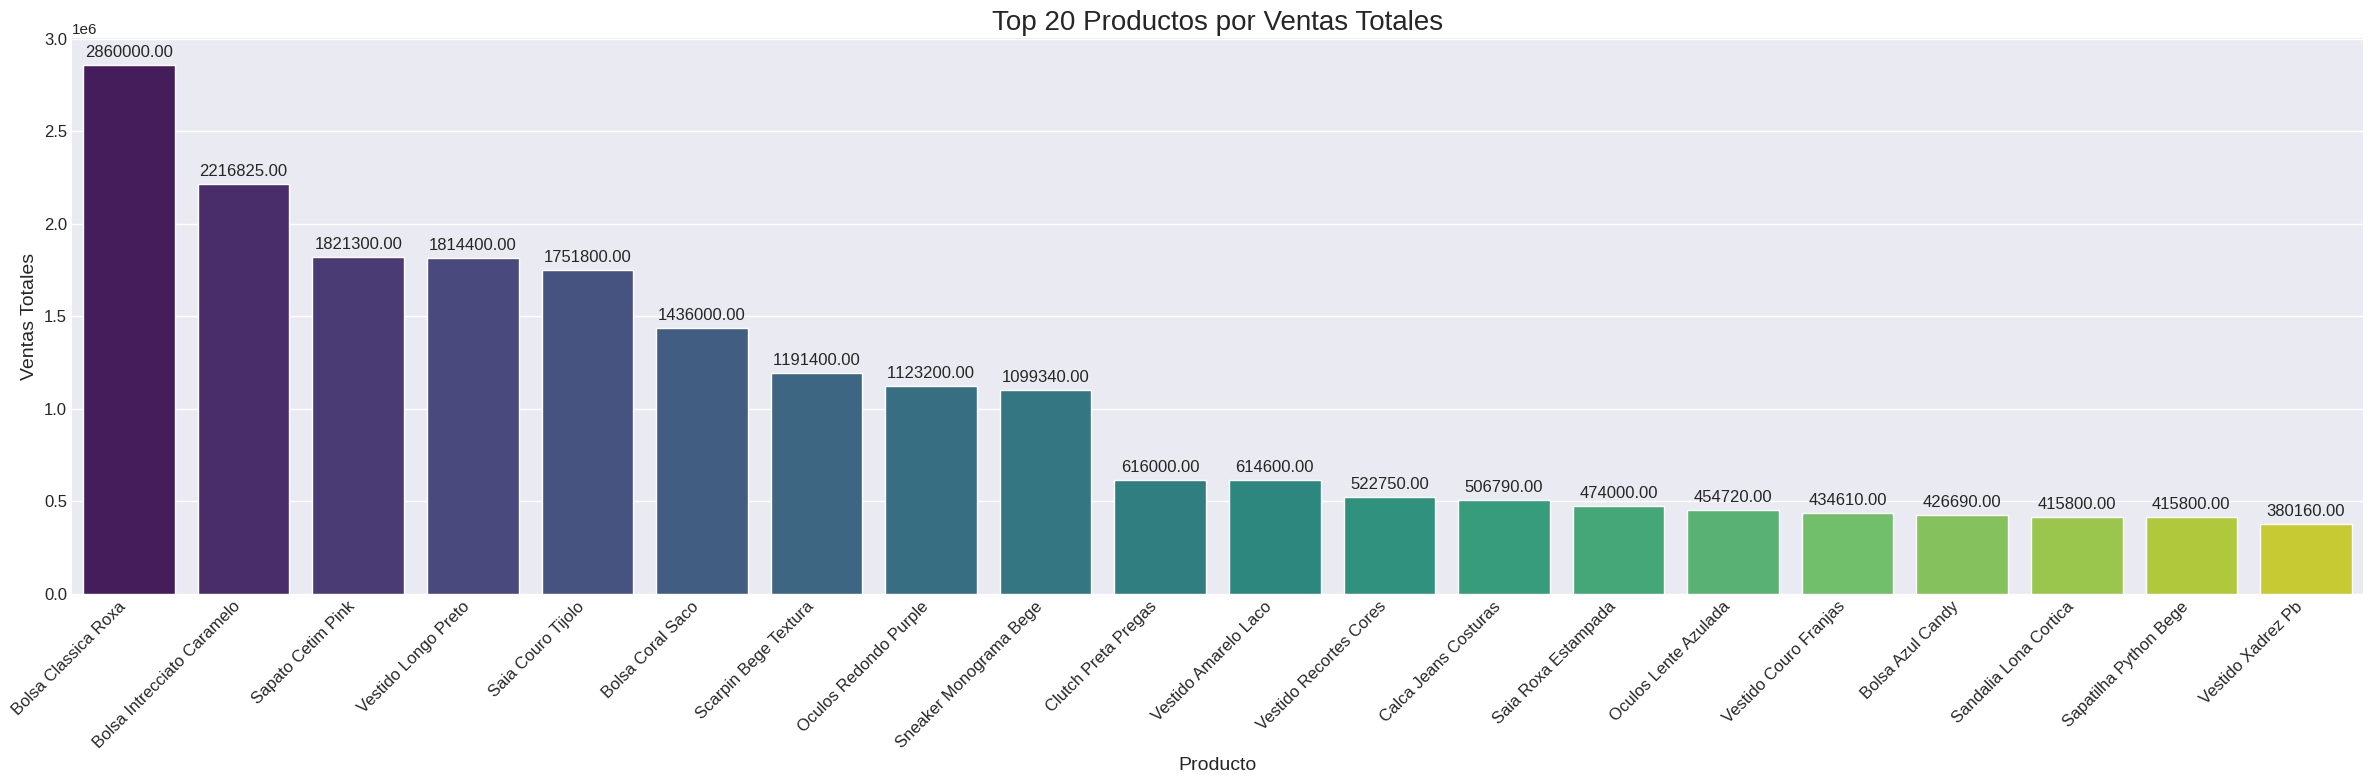

In [129]:
top_productos = df_transacciones_producto_vendedor.groupby('producto')['valor_total'].sum().reset_index(name='ventas_totales')

# Ordenar de mayor a menor
top_productos_ = top_productos.sort_values(by='ventas_totales', ascending=False).head(20)

sns.set(style="whitegrid")
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(24, 8))

barplot = sns.barplot(data=top_productos_, x='producto', y='ventas_totales', palette='viridis')

plt.title('Top 20 Productos por Ventas Totales', fontsize=20)
plt.xlabel('Producto', fontsize=14)
plt.ylabel('Ventas Totales', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

for p in barplot.patches:

    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points',
                     fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-130-841681e99853>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-130-841681e99853>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_productos_, x='producto', y='ventas_totales', palette='viridis')


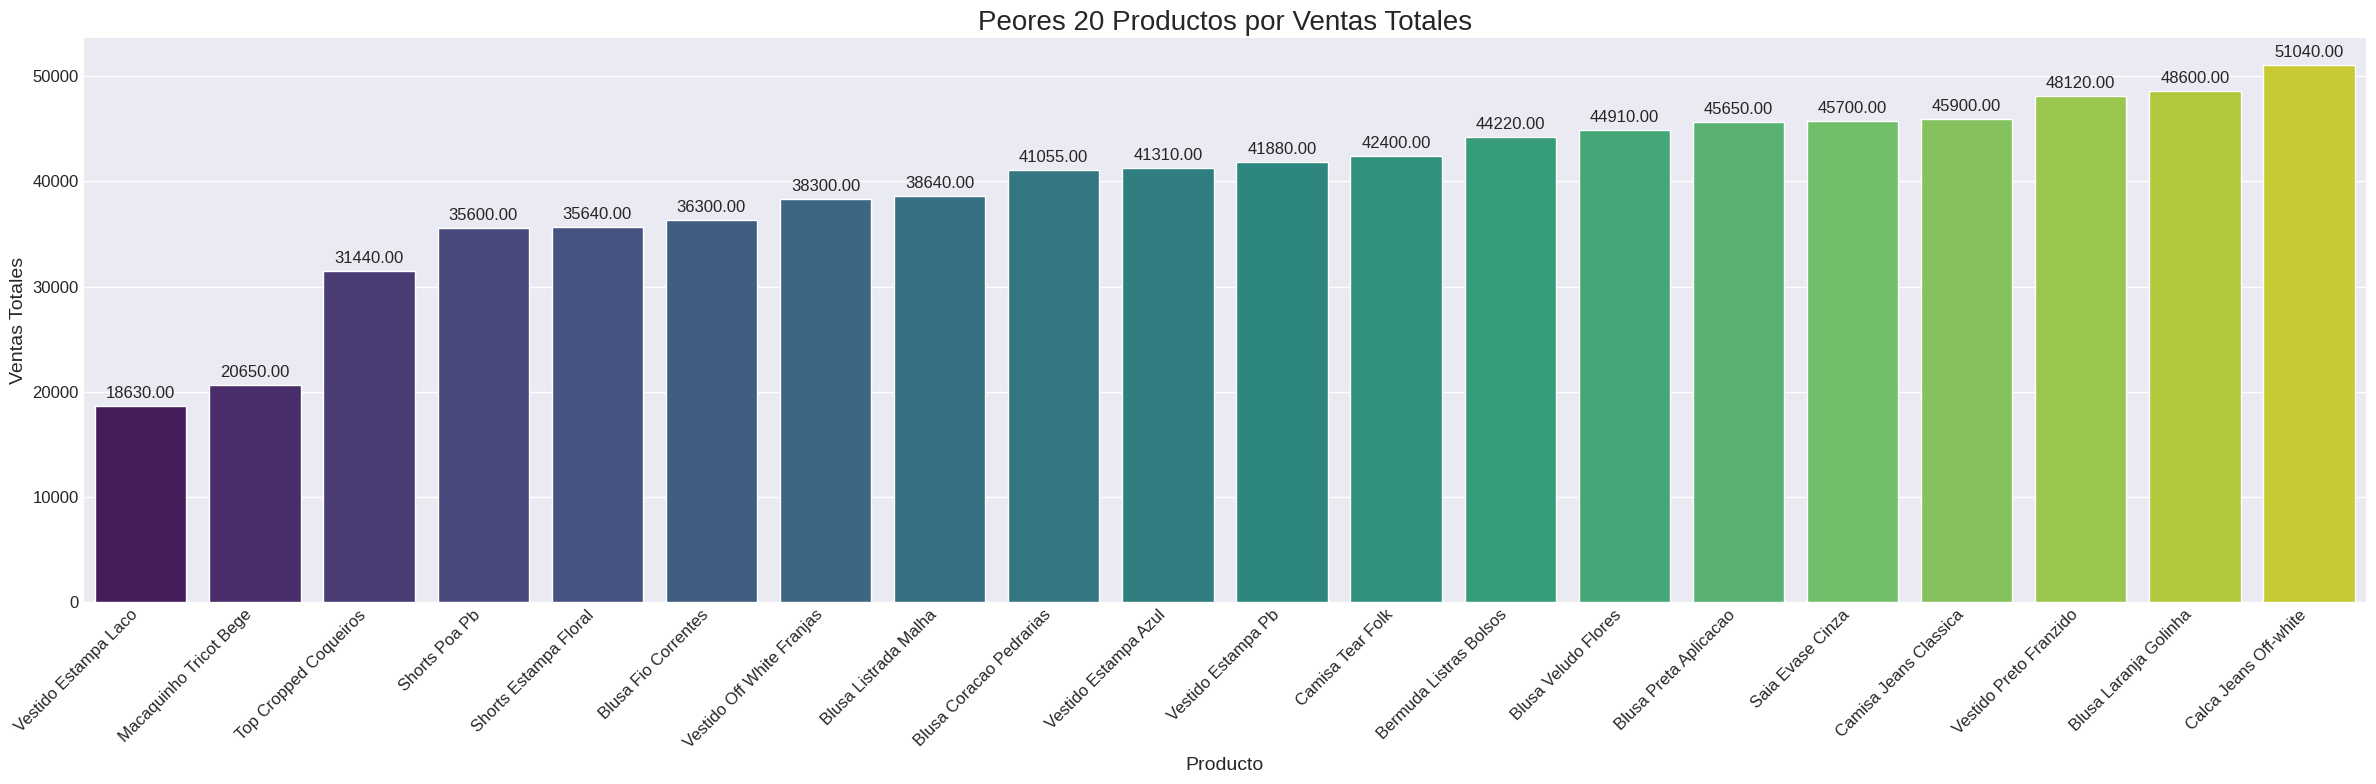

In [130]:
top_productos = df_transacciones_producto_vendedor.groupby('producto')['valor_total'].sum().reset_index(name='ventas_totales')

# Ordenar de mayor a menor
top_productos_ = top_productos.sort_values(by='ventas_totales', ascending=True).head(20)

sns.set(style="whitegrid")
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(24, 8))

barplot = sns.barplot(data=top_productos_, x='producto', y='ventas_totales', palette='viridis')

plt.title('Peores 20 Productos por Ventas Totales', fontsize=20)
plt.xlabel('Producto', fontsize=14)
plt.ylabel('Ventas Totales', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

for p in barplot.patches:

    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points',
                     fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-131-4a630c8937d5>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-131-4a630c8937d5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_productos_precio, x='producto', y='precio', palette='viridis')


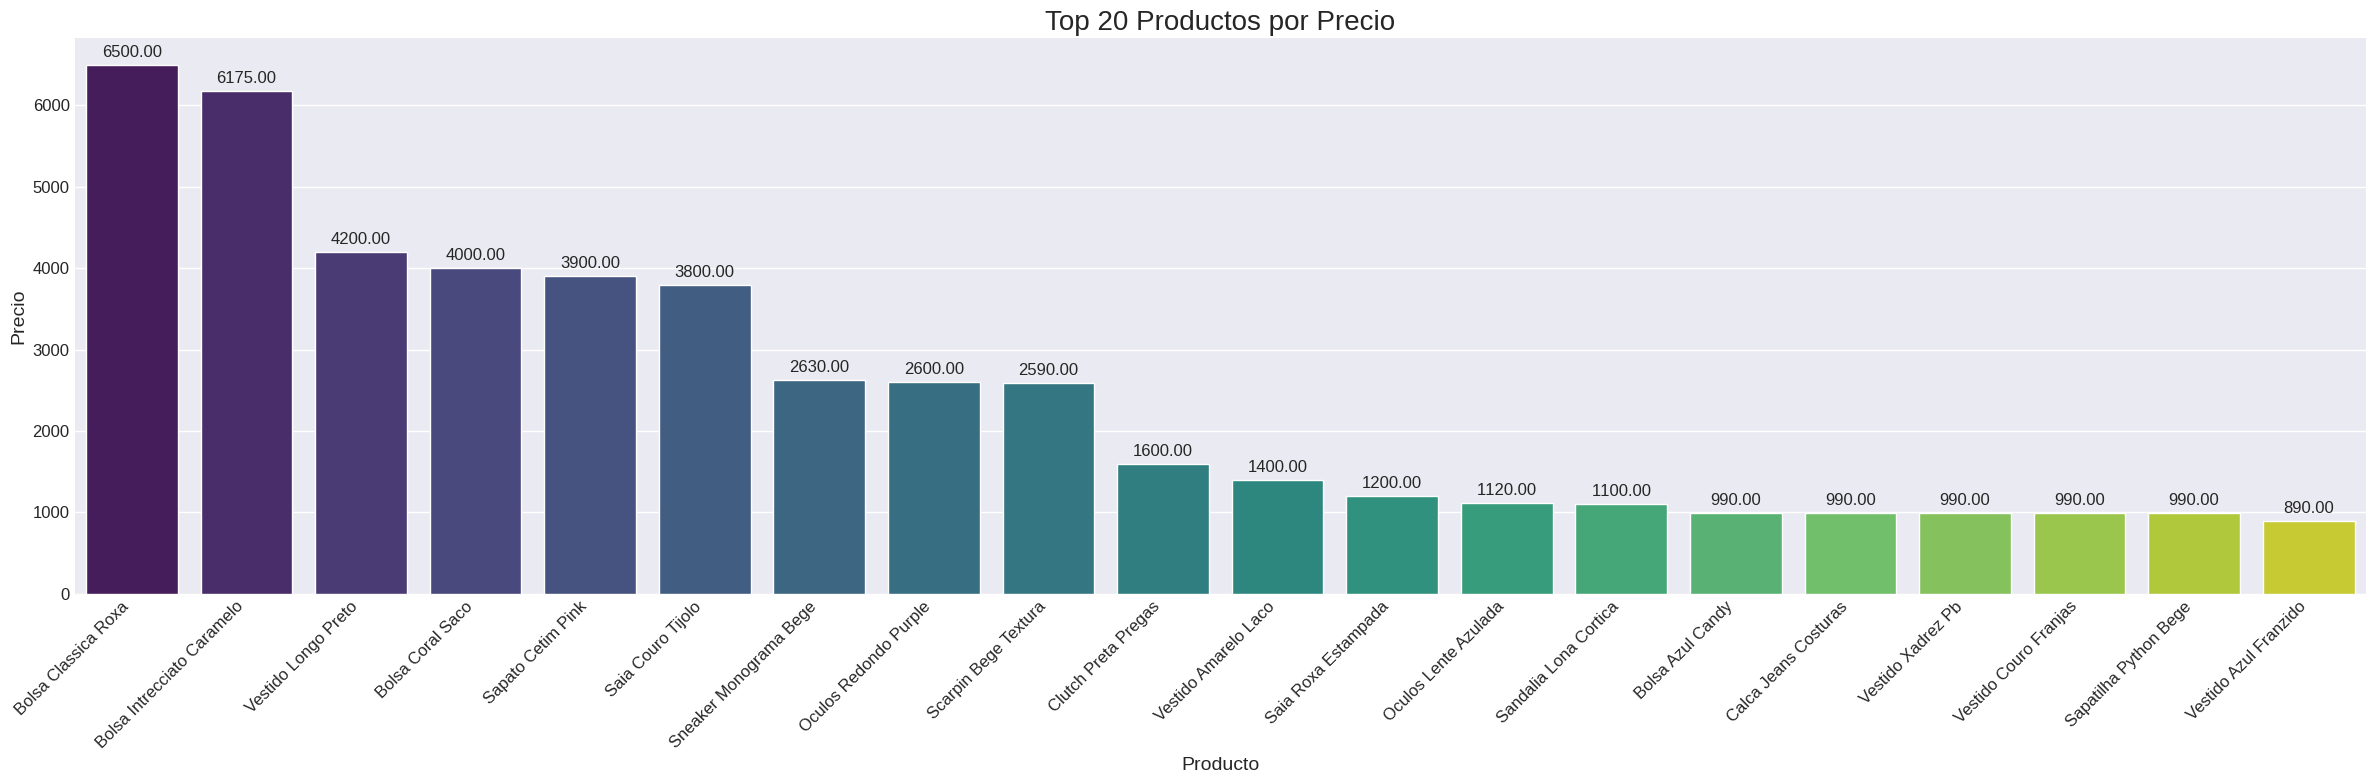

In [131]:
productos_unicos = df_transacciones_producto_vendedor.drop_duplicates(subset=['producto'])

# Seleccionar los top
top_productos_precio = productos_unicos.sort_values(by='precio', ascending=False).head(20)

sns.set(style="whitegrid")
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(24, 8))

# Crear el gráfico de barras
barplot = sns.barplot(data=top_productos_precio, x='producto', y='precio', palette='viridis')

plt.title('Top 20 Productos por Precio', fontsize=20)
plt.xlabel('Producto', fontsize=14)
plt.ylabel('Precio', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir etiquetas en cada barra
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points',
                     fontsize=12)

plt.tight_layout()
plt.show()

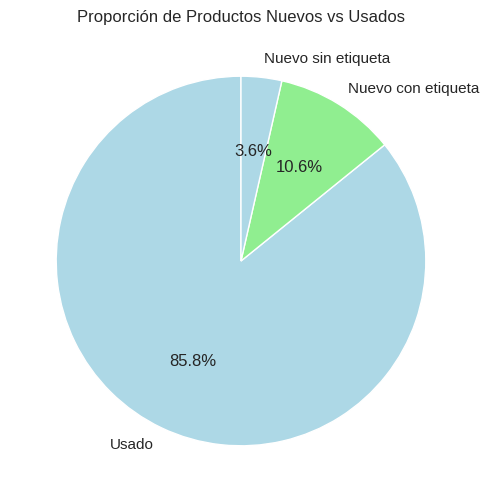

In [132]:
# Asumiendo que 'condicion' es la columna que indica si los productos son nuevos o usados
condicion_counts = df_transacciones_producto_vendedor['condicion'].value_counts()

plt.figure(figsize=(6, 6))
condicion_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Proporción de Productos Nuevos vs Usados')
plt.ylabel('')
plt.show()

<ipython-input-133-9a0baabca379>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


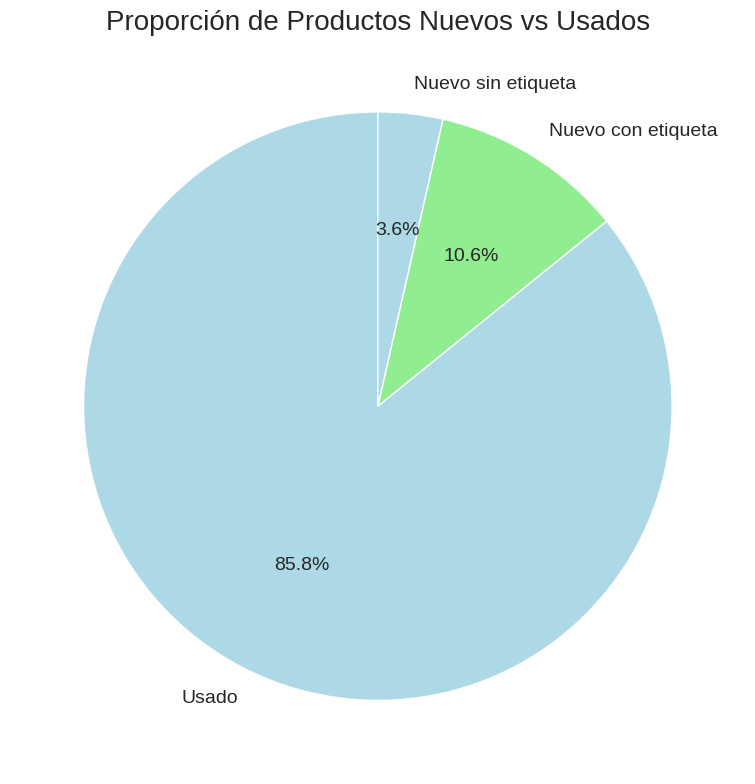

In [133]:

condicion_counts = df_transacciones_producto_vendedor['condicion'].value_counts()

sns.set(style="whitegrid")
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(10, 8))

# Creando un gráfico de tarta

pieplot = condicion_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'], fontsize=14)
plt.title('Proporción de Productos Nuevos vs Usados', fontsize=20)
plt.ylabel('')  # Eliminar la etiqueta del eje y, no es necesaria en gráficos de tarta

plt.tight_layout()
plt.show()


<ipython-input-134-8249abab9bd4>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid') # estil fondo
<ipython-input-134-8249abab9bd4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cantidad', y='valor_unitario', data= df_transacciones_producto_vendedor, palette='viridis')


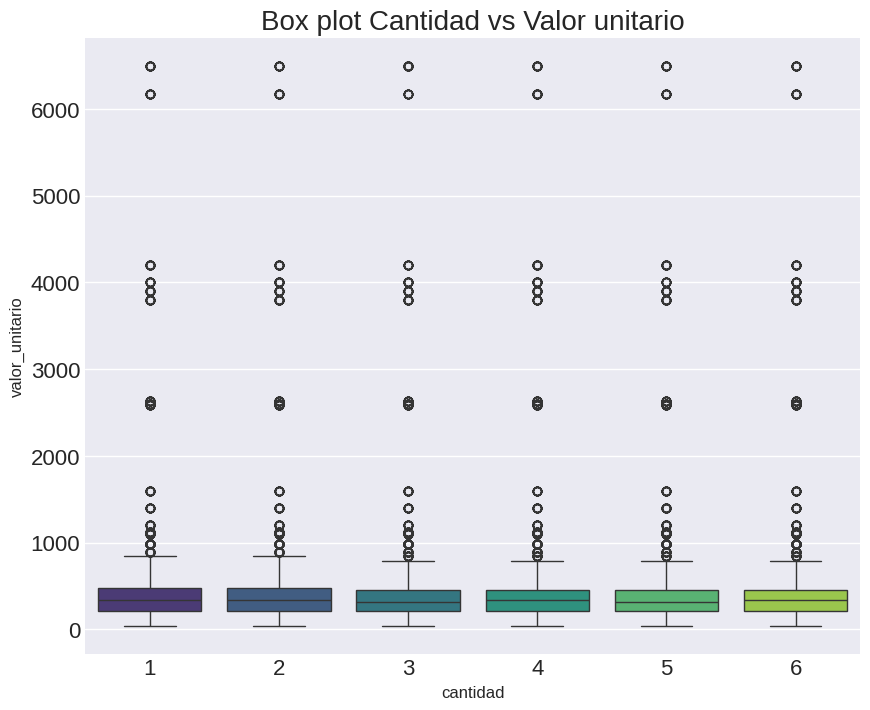

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "whitegrid") #estilo grafico
plt.style.use('seaborn-darkgrid') # estil fondo

plt.figure(figsize=(10,8))
sns.boxplot(x='cantidad', y='valor_unitario', data= df_transacciones_producto_vendedor, palette='viridis')
plt.title('Box plot Cantidad vs Valor unitario', fontsize= 20)
plt.xlabel('cantidad')
plt.ylabel('valor_unitario')

# Ajustar tamaño tiquetas ejes
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

<ipython-input-135-e68c3d97e504>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid') # estil fondo
<ipython-input-135-e68c3d97e504>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='cantidad', y='valor_total', data= df_transacciones_producto_vendedor, palette='viridis')


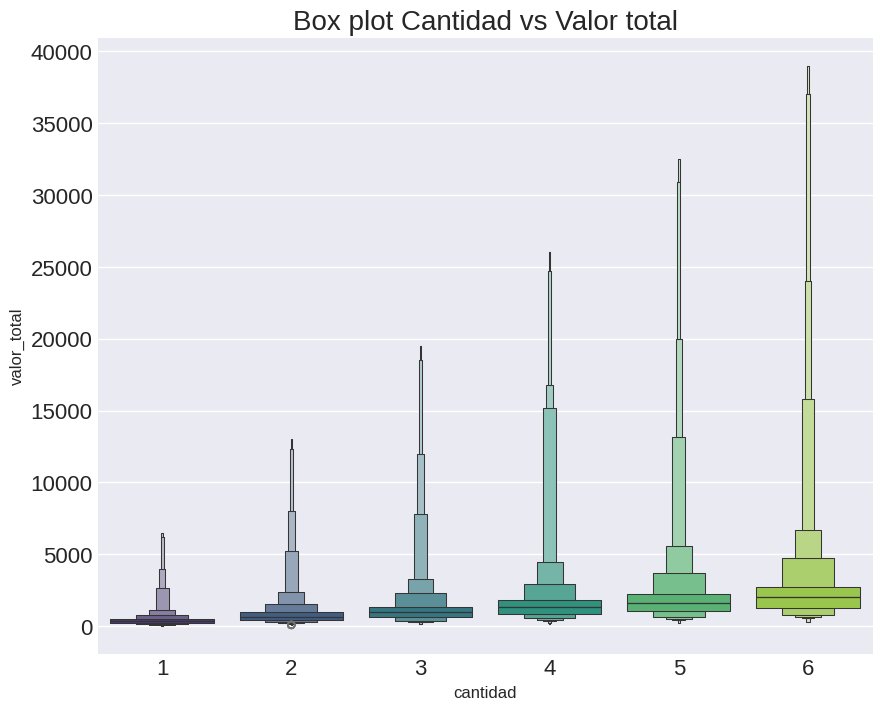

In [135]:
sns.set(style = "whitegrid") #estilo grafico
plt.style.use('seaborn-darkgrid') # estil fondo

plt.figure(figsize=(10,8))
sns.boxenplot(x='cantidad', y='valor_total', data= df_transacciones_producto_vendedor, palette='viridis')
plt.title('Box plot Cantidad vs Valor total', fontsize= 20)
plt.xlabel('cantidad')
plt.ylabel('valor_total')

# Ajustar tamaño tiquetas ejes
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

<ipython-input-136-36902be28151>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid') # estil fondo
<ipython-input-136-36902be28151>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='ciudad', y='costo_envio', data= df_transacciones_producto_vendedor, palette='viridis')


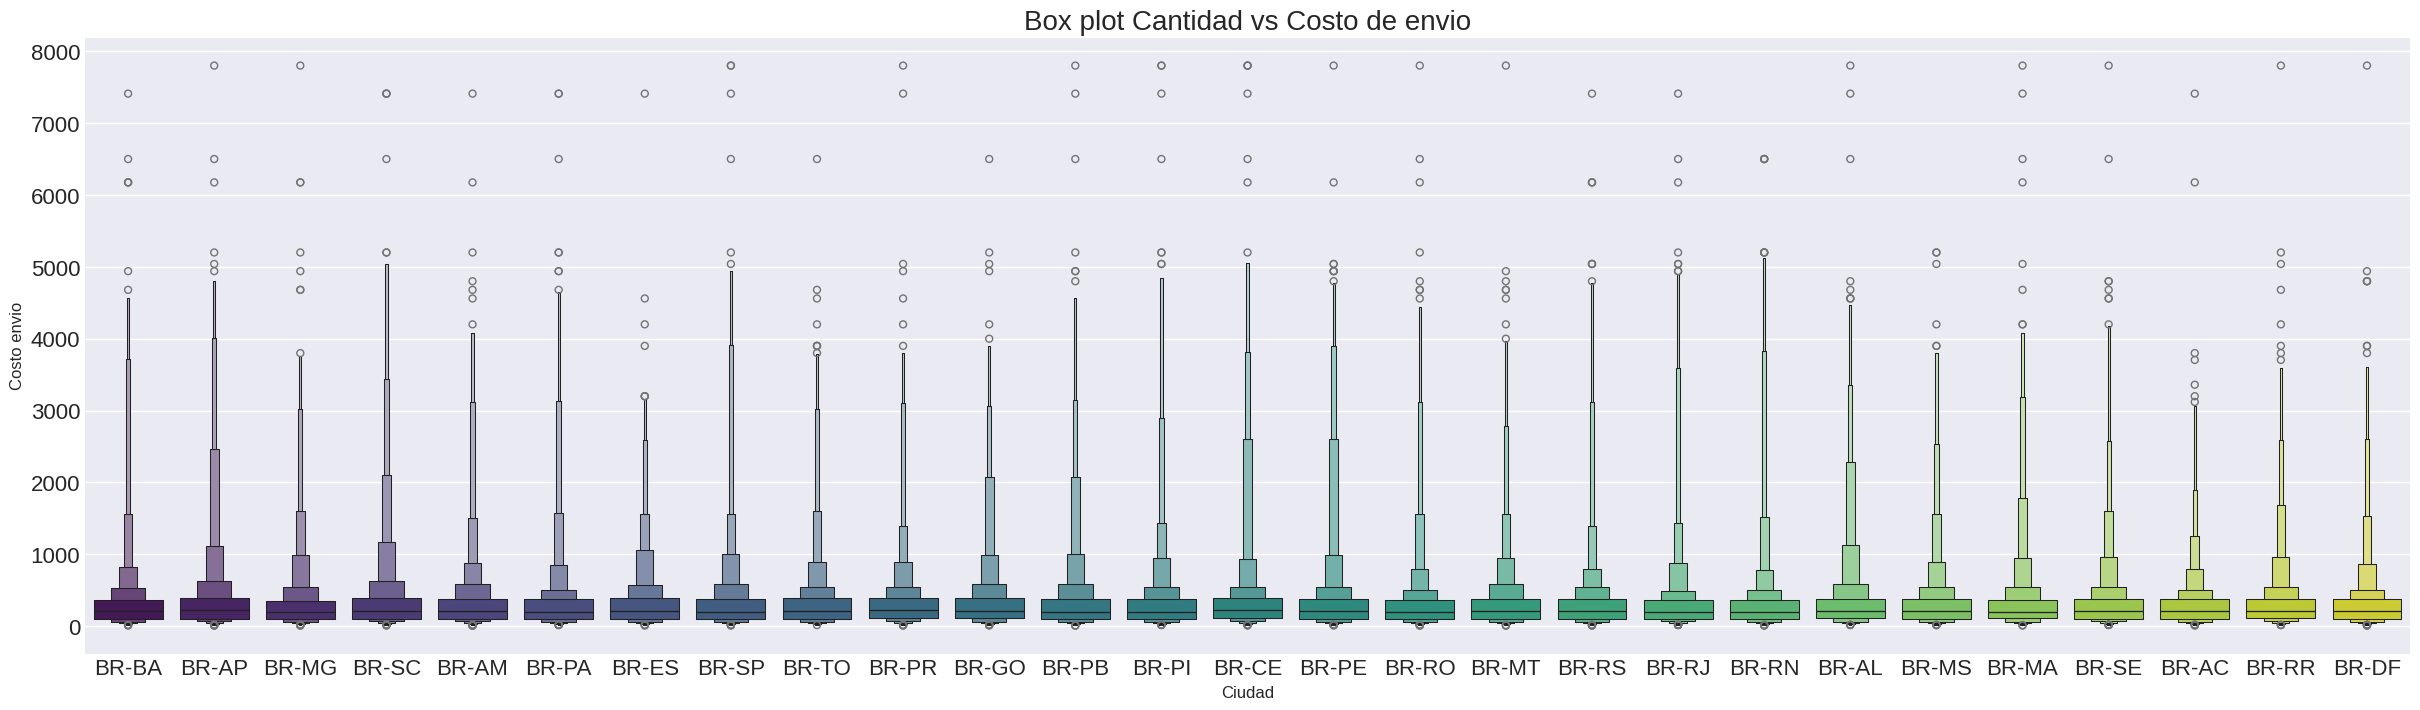

In [136]:
sns.set(style = "whitegrid") #estilo grafico
plt.style.use('seaborn-darkgrid') # estil fondo

plt.figure(figsize=(30,8))
sns.boxenplot(x='ciudad', y='costo_envio', data= df_transacciones_producto_vendedor, palette='viridis')
plt.title('Box plot Cantidad vs Costo de envio', fontsize= 20)
plt.xlabel('Ciudad')
plt.ylabel('Costo envio')

# Ajustar tamaño tiquetas ejes
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

<ipython-input-137-9250a25f4803>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid') # estil fondo
<ipython-input-137-9250a25f4803>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='ciudad', y='cantidad', data= df_transacciones_producto_vendedor, palette='viridis')


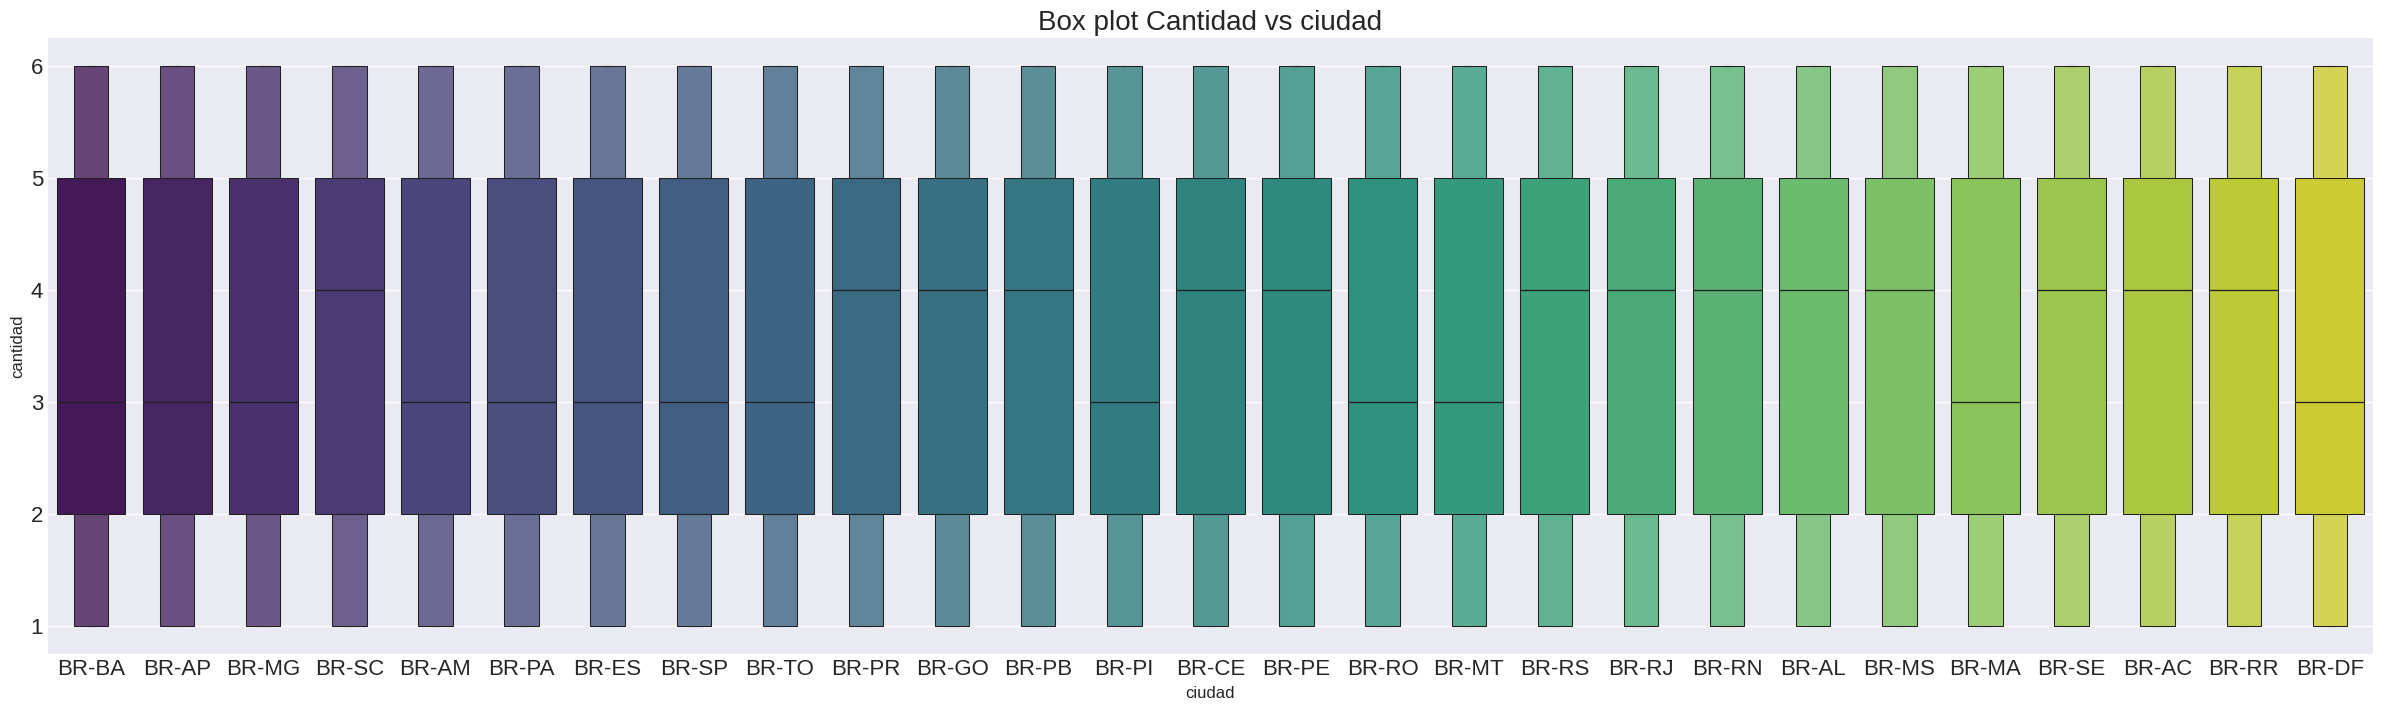

In [137]:
sns.set(style = "whitegrid") #estilo grafico
plt.style.use('seaborn-darkgrid') # estil fondo

plt.figure(figsize=(30,8))
sns.boxenplot(x='ciudad', y='cantidad', data= df_transacciones_producto_vendedor, palette='viridis')
plt.title('Box plot Cantidad vs ciudad', fontsize= 20)
plt.xlabel('ciudad')
plt.ylabel('cantidad')

# Ajustar tamaño tiquetas ejes
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

<ipython-input-138-de9184239c88>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-138-de9184239c88>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ciudad', y='costo_envio', data=suma_costo_envio_por_ciudad, palette='viridis')


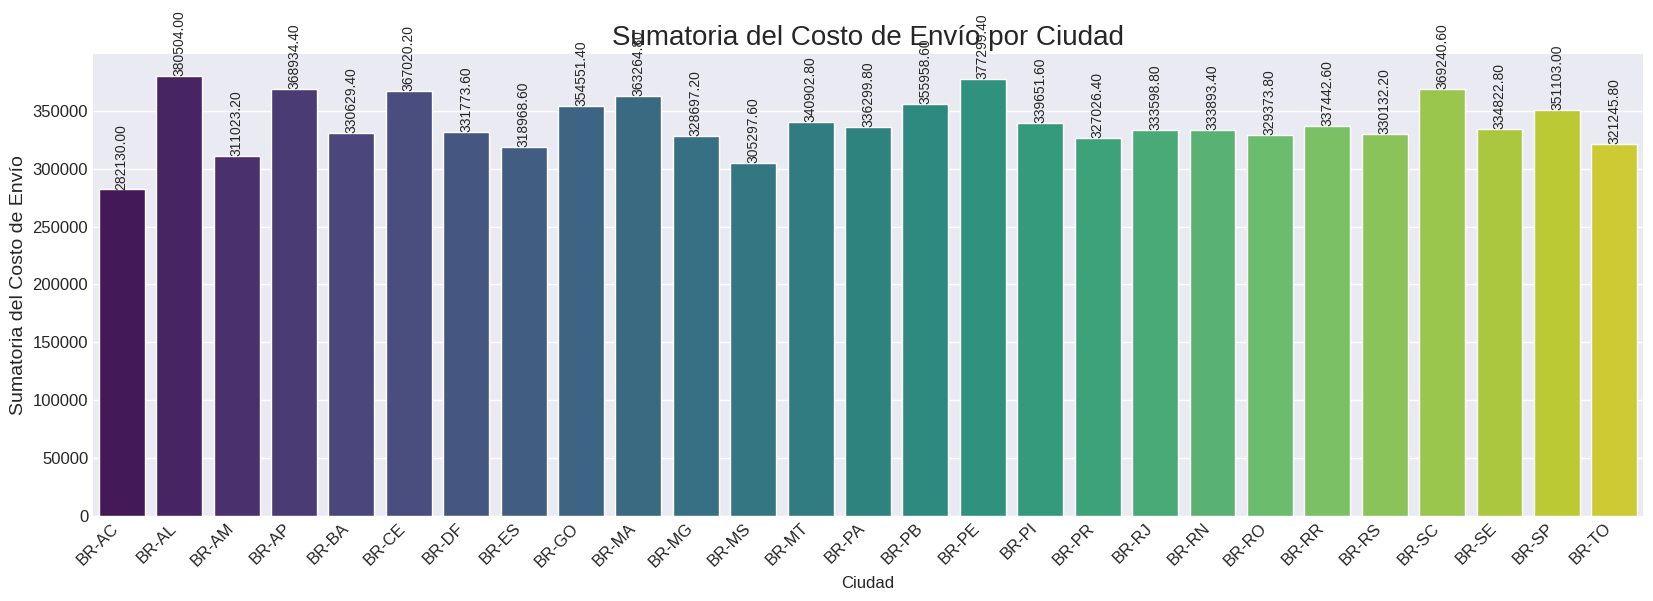

In [138]:

suma_costo_envio_por_ciudad = df_transacciones_producto_vendedor.groupby('ciudad')['costo_envio'].sum().reset_index()

sns.set(style="whitegrid")
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(20, 6))

ax = sns.barplot(x='ciudad', y='costo_envio', data=suma_costo_envio_por_ciudad, palette='viridis')

plt.title('Sumatoria del Costo de Envío por Ciudad', fontsize=20)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Sumatoria del Costo de Envío', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Agregar etiquetas al lado de cada barra
for index, row in suma_costo_envio_por_ciudad.iterrows():
    ax.text(index, row["costo_envio"], f'{row["costo_envio"]:.2f}', ha='center', va='bottom', fontsize=10, rotation=90)

# Mostrar el gráfico
plt.show()


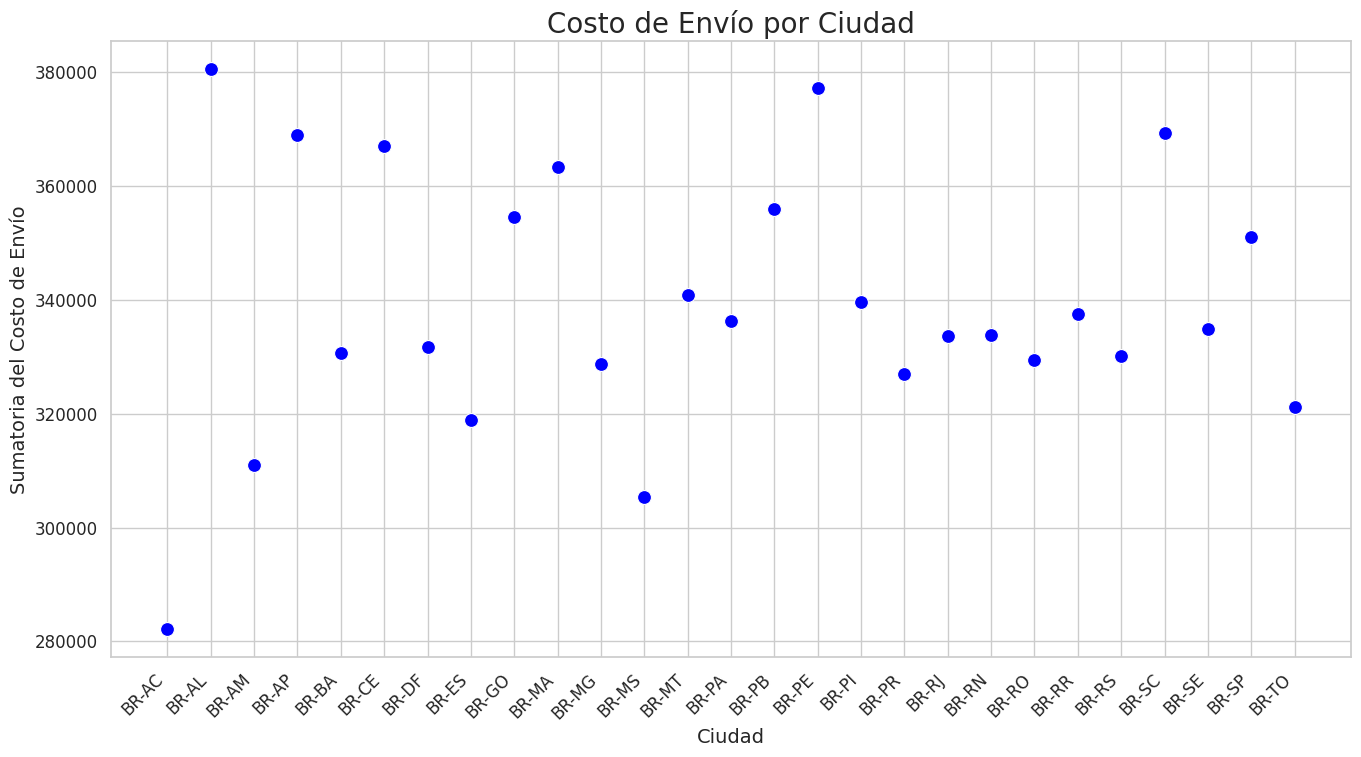

In [139]:

sns.set(style="whitegrid")

suma_costo_envio_por_ciudad = df_transacciones_producto_vendedor.groupby('ciudad')['costo_envio'].sum().reset_index()

plt.figure(figsize=(16, 8))

sns.scatterplot(x='ciudad', y='costo_envio', data=suma_costo_envio_por_ciudad, s=100, color='blue')

plt.title('Costo de Envío por Ciudad', fontsize=20)
plt.xlabel('Ciudad', fontsize=14)
plt.ylabel('Sumatoria del Costo de Envío', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.show()


<ipython-input-140-ce1748b0ae30>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-140-ce1748b0ae30>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='ciudad', y='costo_envio', data=promedio_costo_envio_por_ciudad, palette='viridis')


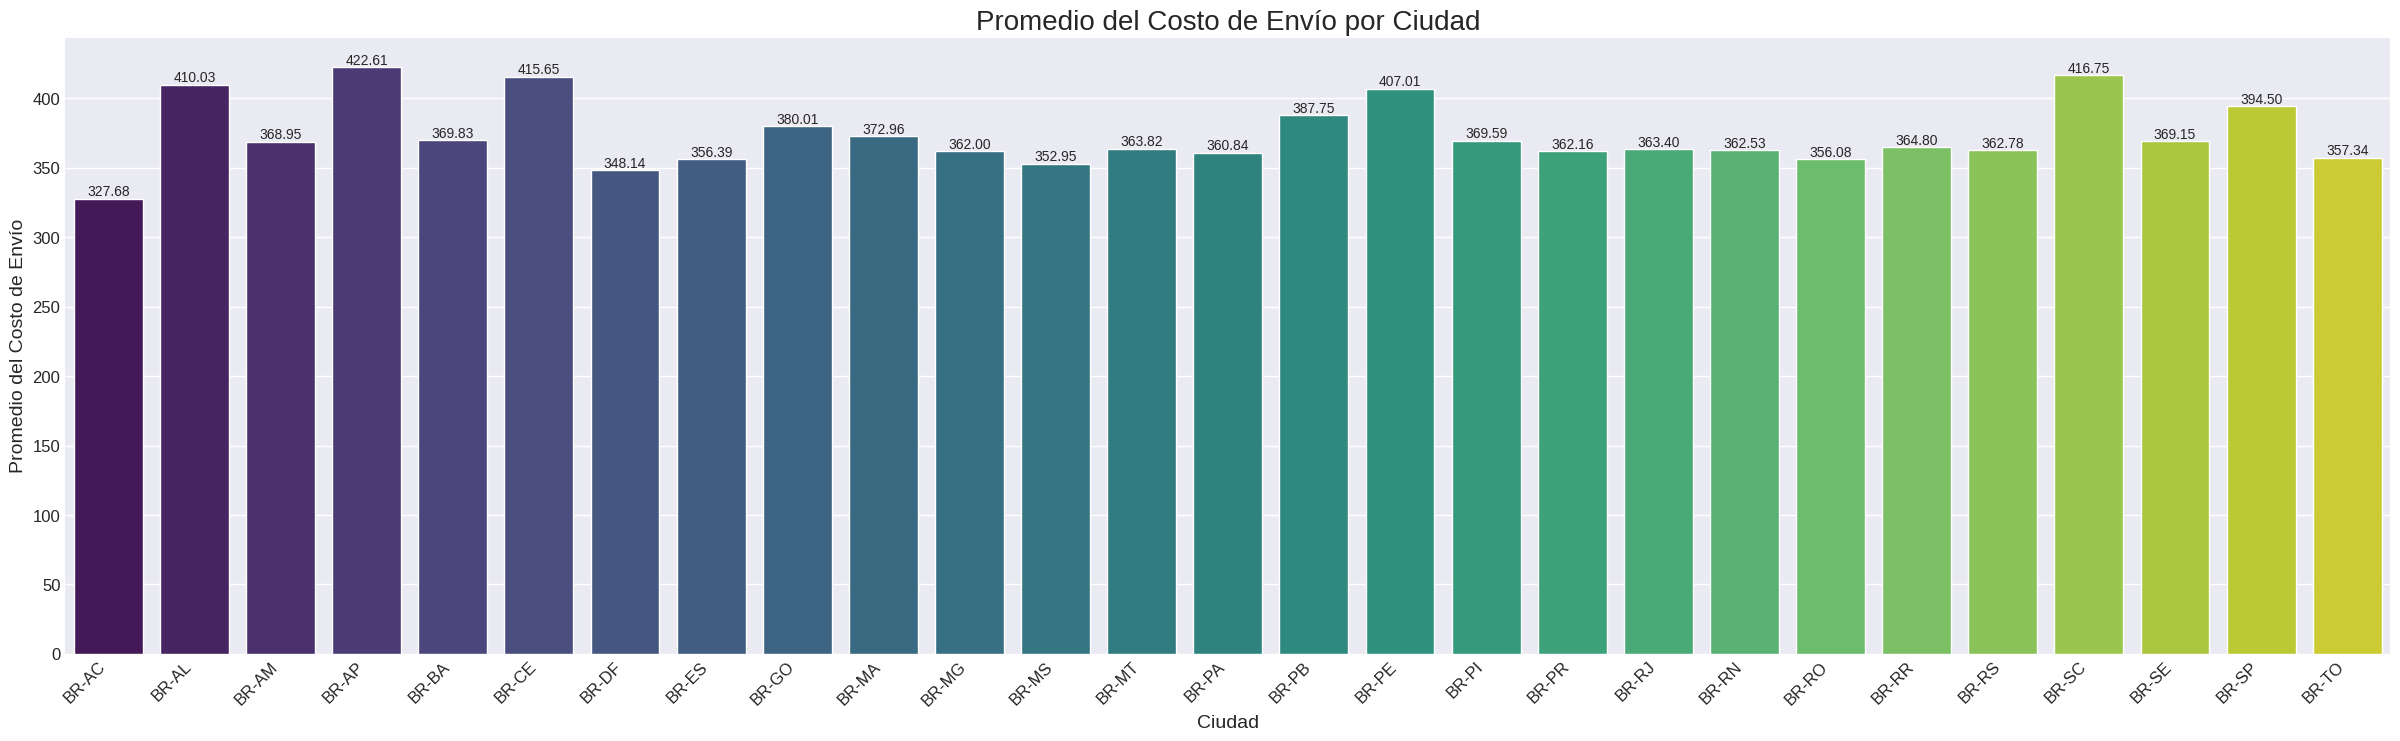

In [140]:


# Calcular el promedio del costo de envío por ciudad
promedio_costo_envio_por_ciudad = df_transacciones_producto_vendedor.groupby('ciudad')['costo_envio'].mean().reset_index()

# Establecer el estilo de los gráficos y el fondo
sns.set(style="whitegrid")
plt.style.use('seaborn-darkgrid')

# Establecer el tamaño del gráfico
plt.figure(figsize=(30, 8))

# Crear el gráfico de barras
barplot = sns.barplot(x='ciudad', y='costo_envio', data=promedio_costo_envio_por_ciudad, palette='viridis')

# Establecer título y etiquetas de los ejes
plt.title('Promedio del Costo de Envío por Ciudad', fontsize=20)
plt.xlabel('Ciudad', fontsize=14)
plt.ylabel('Promedio del Costo de Envío', fontsize=14)

# Ajustar el tamaño de las etiquetas en los ejes
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Agregar etiquetas a las barras
for index, row in promedio_costo_envio_por_ciudad.iterrows():
    barplot.text(index, row['costo_envio'], f'{row["costo_envio"]:.2f}', ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.show()


In [141]:
#@title
def preprocesamiento():
  global df_itens_pedidos, df_pedidos, df_productos, df_vendedores
  #Escribe tu código aqui

In [142]:
preprocesamiento()
print(df_itens_pedidos.info())
print('-------------')
print(df_pedidos.info())
print('-------------')
print(df_productos.info())
print('-------------')
print(df_vendedores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_recibo       24527 non-null  object 
 1   producto_id     24527 non-null  object 
 2   pedido_id       24527 non-null  object 
 3   cantidad        24527 non-null  int64  
 4   valor_unitario  24527 non-null  float64
 5   valor_total     24527 non-null  float64
 6   ciudad          24527 non-null  object 
 7   costo_envio     24527 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   pedido_id     24527 non-null  object        
 1   producto_id   24527 non-null  object        
 2   vendedor_id   24527 non-null  object        
 3 

#**3. Preguntas y respuestas**


---




In [143]:
#@title
def preprocesamiento():
  global df_itens_pedidos, df_pedidos, df_productos, df_vendedores
  #Escribe tu código aqui

In [144]:
print(df_transacciones_pedidos.info())
print('-------------')
print('-------------')
print(df_productos.info())
print('-------------')
print(df_vendedores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_recibo       24527 non-null  object        
 1   producto_id     24527 non-null  object        
 2   pedido_id       24527 non-null  object        
 3   cantidad        24527 non-null  int64         
 4   valor_unitario  24527 non-null  float64       
 5   valor_total     24527 non-null  float64       
 6   ciudad          24527 non-null  object        
 7   costo_envio     24527 non-null  float64       
 8   vendedor_id     24527 non-null  object        
 9   fecha_compra    24527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 1.9+ MB
None
-------------
-------------
<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------  

# **OPTIMIZACION DE TABLAS**

Se ha observado que tanto la tabla df_itens_pedidos como la tabla df_pedidos comparten las columnas "pedido_id", "producto_id" y "total". Por lo tanto, surge la necesidad de simplificar estas tablas combinándolas en una sola tabla para mejorar la eficiencia y la gestión de los datos.

*  Razones

  *  Reducción de redundancia: Al combinar las tablas, evitamos duplicar información y reducimos la redundancia de datos. Esto conduce a un uso más eficiente del espacio de almacenamiento.
  *  Facilita la gestión de datos: Al tener una sola tabla que contenga toda la información relevante, la gestión de datos se simplifica. Ya no es necesario realizar un seguimiento de múltiples tablas separadas para acceder a la información completa sobre los pedidos y los productos.
  *  Mejora del rendimiento de consultas: Al reducir el número de tablas involucradas en una consulta, se puede mejorar el rendimiento del sistema, especialmente en bases de datos grandes. Las consultas tienden a ser más rápidas y eficientes cuando se accede a una sola tabla en lugar de múltiples tablas.


# **CREACION DE BASE DE DATOS EN MYSQL**

# **Creación de la Tabla transacciones_pedidos**

** Capturar en el campo fecha tambien la hora: Al almacenar tanto la fecha como la hora de cada transacción, obtienes una granularidad de datos que permite análisis más detallados, como identificar picos de venta por hora o evaluar la eficiencia de la logística y entrega. Esta precisión puede ser crucial para optimizar operaciones, entender el comportamiento del consumidor y tomar decisiones informadas**


* id_recibo: Usar INT es adecuado para un identificador que no será la clave primaria
* producto_id NOT NULL y vendedor_id: Establecer como NOT NULL asegura que cada transacción debe estar asociada con un producto y un vendedor, manteniendo la integridad de los datos.
*pedido_id INT PRIMARY KEY:Designado como PRIMARY KEY asegura unicidad y optimiza las búsquedas y relaciones.
*cantidad, valor_unitario, valor_total, costo_envio: Elegir DECIMAL(10,2) para valores monetarios proporciona precisión en cálculos financieros.
*ciudad CHAR(5): Asumiendo que el código de ciudad siempre tiene 5 caracteres, CHAR(5) es eficiente en términos de almacenamiento, al tener longitud fija.

# **Creación de la Tabla producto**

* producto VARCHAR NOT NULL:. Asumir datos siempre presentes con NOT NULL es crucial para la integridad.
* precio DECIMAL(10,2) NOT NULL: Asegura precisión en el almacenamiento de precios.
* marca VARCHAR, condicion VARCHAR(28): Se recomienda especificar una longitud máxima para VARCHAR, basada en la longitud esperada más común para estos campos.

# **Creación de la Tabla vendedores**

Nombre_vendedor VARCHAR(255) NOT NULL: VARCHAR(255) es un estándar de la industria para textos cortos, permitiendo flexibilidad en los nombres sin desperdiciar espacio.


# **RELACIONES TABLAS**

Nombrar explícitamente la restricción de clave foránea mejora la legibilidad y facilita la gestión de la base de datos.




# ***  CODIGO MYSQL***
  


  
    /* Crear la base de datos */
CREATE DATABASE STORE_SALES_ANALSYS;

    /* Usar la base de datos*/
USE STORE_SALES_ANALSYS;

    /* Tabla transacciones_pedidos*/

CREATE TABLE transacciones_pedidos(
	id_recibo INT,
	producto_id INT not null,
	pedido_id INT PRIMARY KEY,
	cantidad INT,
	valor_unitario DECIMAL(10,2),
	valor_total DECIMAL(10,2),
	ciudad CHAR (5),
	costo_envio DECIMAL(10,2),
	vendedor_id INT,
	fecha_compra DATETIME
);

CREATE TABLE producto (
	producto_id INT PRIMARY KEY,
    producto VARCHAR (255) not null,
    precio DECIMAL(10,2) not null,
    marca VARCHAR,
    sku INT,
    condicion VARCHAR (28)
   );
   
CREATE TABLE vendedores (
	vendedor_id INT PRIMARY KEY,
    nombre_vendedor VARCHAR(255) not null
    );

    /* Relaciones entre tablas*/

ALTER TABLE transacciones_pedidos
ADD CONSTRAINT fk_producto
FOREIGN KEY (producto_id) REFERENCES producto (producto_id);

ALTER TABLE transacciones_pedidos
ADD CONSTRAINT fk_vendedores
FOREIGN KEY (vendedor_id) REFERENCES vendedores (vendedor_id);





**SUGERIMOS UNA BASE DE DATOS CON LAS SIGUIENTES RELACIONES**

**texto en negrita**

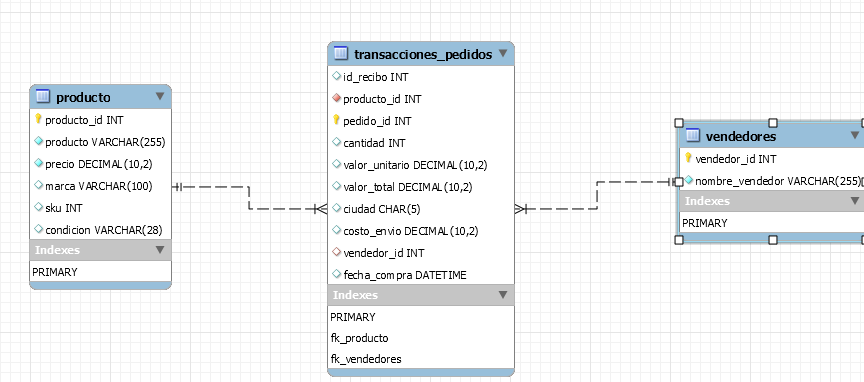

##**3.1 Creando el banco de datos**

In [145]:
#@title
#def crear_conexion():
 # global df_transacciones_pedidos, df_productos, df_vendedores, database
  #Escribe tu código aqui

In [146]:
import sqlite3
import pandas as pd

def crear_conexion():
    global df_transacciones_pedidos, df_productos, df_vendedores, database

    # Crear una conexión a la base de datos SQLite
    database = sqlite3.connect('my_database.db')

    # Guardar cada DataFrame como una tabla en la base de datos
    df_transacciones_pedidos.to_sql('transacciones_pedidos', database, if_exists='replace', index=False)
    df_productos.to_sql('productos', database, if_exists='replace', index=False)
    df_vendedores.to_sql('vendedores', database, if_exists='replace', index=False)

# Llama a la función para crear la conexión y guardar los DataFrames en la base de datos
crear_conexion()

# Obtener un cursor para ejecutar consultas SQL
cursor = database.cursor()

# Obtener la lista de tablas en la base de datos
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tablas = cursor.fetchall()
print('Tablas:', [tabla[0] for tabla in tablas])

# Obtener las columnas de la tabla 'transacciones_pedidos'
cursor.execute("PRAGMA table_info(transacciones_pedidos)")
print('\nColumnas de la tabla Pedidos:')
columnas = cursor.fetchall()
for columna in columnas:
    print(columna[1])  # El índice 1 contiene el nombre de la columna

# Cerrar el cursor y la conexión a la base de datos
cursor.close()
database.close()

Tablas: ['transacciones_pedidos', 'productos', 'vendedores']

Columnas de la tabla Pedidos:
id_recibo
producto_id
pedido_id
cantidad
valor_unitario
valor_total
ciudad
costo_envio
vendedor_id
fecha_compra


In [147]:
def crear_conexion():
    global df_transacciones_pedidos, df_productos, df_vendedores, database

    # Crear un engine de tipo sqlite y guardarlo en database
    database = create_engine('sqlite:///my_database.db')

    # Añadir cada uno de los 3 dataframes: df_transacciones_pedidos, df_productos, df_vendedores en su respectiva tabla sql dentro del banco de datos cread
    df_transacciones_pedidos.to_sql('transacciones_pedidos', database, if_exists='replace', index=False)
    df_productos.to_sql('productos', database, if_exists='replace', index=False)
    df_vendedores.to_sql('vendedores', database, if_exists='replace', index=False)

# Llama a la función para crear la conexión y guardar los DataFrames en la base de datos
crear_conexion()

In [148]:
#@title Función rápida para consultas
def query_store_sales(query, con=database):
    global database
    return pd.read_sql_query(sql=text(query), con=con)

In [149]:
query_store_sales('SELECT * FROM transacciones_pedidos')

id_recibo producto_id pedido_id  cantidad  valor_unitario  valor_total  \
0             1       41518       341         3           260.0        780.0   
1             2        4307      1174         5          6175.0      30875.0   
2             3       22407      1399         3           200.0        600.0   
3             4        3820      1652         6           139.0        834.0   
4             5       29012      2470         3           525.0       1575.0   
...         ...         ...       ...       ...             ...          ...   
24522     25051       64127     63716         4           590.0       2360.0   
24523     25052       37384     63999         4           700.0       2800.0   
24524     25053      100932     64594         5          3900.0      19500.0   
24525     25054        3820     64811         3           139.0        417.0   
24526     25055       74864     65274         2           130.0        260.0   

      ciudad  costo_envio vendedor_id                fecha_compra  
0      BR-BA        156.0           6  2019-01-05 00:00:00.000000  
1      BR-RJ       6175.0           3  2019-01-05 00:00:00.000000  
2      BR-PB        120.0           1  2019-01-05 00:00:00.000000  
3      BR-DF        166.8           4  2019-01-05 00:00:00.000000  
4      BR-BA        315.0           2  2019-01-05 00:00:00.000000  
...      ...          ...         ...                         ...  
24522  BR-PE        472.0           1  2021-03-09 00:00:00.000000  
24523  BR-RO        560.0           2  2021-03-09 00:00:00.000000  
24524  BR-RO       3900.0           1  2021-03-10 00:00:00.000000  
24525  BR-MA         83.4           3  2021-03-10 00:00:00.000000  
24526  BR-SE         52.0           4  2021-03-10 00:00:00.000000  

[24527 rows x 10 columns]

In [150]:
query_store_sales('SELECT * FROM productos')

producto_id                      producto  precio                marca  \
0         21244          Oculos Lente Azulada    1120  D&g Dolce & Gabbana   
1          9981              Bolsa Coral Saco    4000             Givenchy   
2         84176           Camisa Xadrez Verde     310            Joe Fresh   
3         47475       Calca Alfaiataria Preta     490                Mixed   
4         74864         Vestido Jeans Babados     130                 Zara   
..          ...                           ...     ...                  ...   
200       14074           Camisa Amarela Laco     450          Carol Bassi   
201       33349         Vestido Listras Malha     270         Calvin Klein   
202       22568  Casaqueto Estampa Geometrica     245                 Zara   
203       40508        Regata Bicolor Alcinha     245              Express   
204       41518            Calca Jeans Basica     260      Banana Republic   

          sku           condicion  
0    209297.0               Usado  
1    278612.0               Usado  
2    322482.0               Usado  
3    263658.0               Usado  
4    219248.0               Usado  
..        ...                 ...  
200  309858.0               Usado  
201  307118.0               Usado  
202  244931.0               Usado  
203  247166.0               Usado  
204  255410.0  Nuevo con etiqueta  

[205 rows x 6 columns]

In [151]:
query_store_sales('SELECT * FROM vendedores')

vendedor_id  nombre_vendedor
0           1       Ana Duarte
1           2  Daniel Siqueira
2           3   Nadia Oliveira
3           4  Millena Pereira
4           5    Paulo Calanca
5           6          Unknown

##**Pregunta 1: ¿Cual es el Top 5 productos más vendidos históricamente?**

In [152]:
query='''
    SELECT
        ip.producto_id,
        p.producto,
        p.marca,
        SUM(valor_total) AS total_vendido,
        SUM(cantidad) AS cantidad_vendida
    FROM transacciones_pedidos ip
    INNER JOIN productos p ON p.producto_id=ip.producto_id
    GROUP BY ip.producto_id
    ORDER BY cantidad_vendida DESC
    LIMIT 5
'''


In [153]:
#@title Para trabajar con imágenes como avatar
from PIL import Image
import os
import shutil
from matplotlib.colors import LinearSegmentedColormap
from urllib.request import urlretrieve
import warnings


warnings.filterwarnings(
    "ignore", category=UserWarning
)

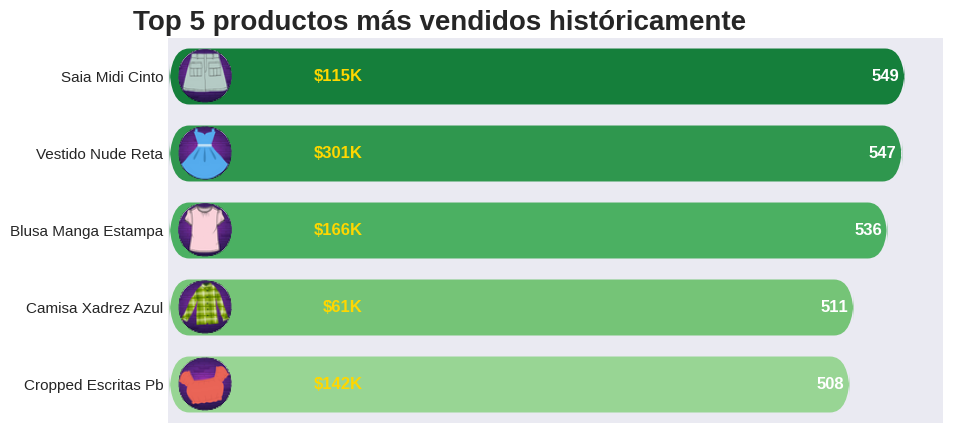

In [154]:
# |  output: true

df_top5_products = query_store_sales(query)


df_top5_products['total_vendido'] = (
    df_top5_products['total_vendido'] / 1000
).apply(lambda x: f'${x:.0f}K')
# Crear el gráfico de barras horizontales con Seaborn
plt.figure(figsize=(10, 5))

ax = sns.barplot(
    x=df_top5_products.cantidad_vendida/20,
    y=df_top5_products.producto, orient='h',
    joinstyle='bevel'
)

image_paths = [
    'https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/imagenes/falda.png',
    'https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases//main/imagenes/vestido.png',
    'https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/imagenes/blusa.png',
    'https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/imagenes/camisa.png',
    'https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/imagenes/cropped.png'
]

colores_verdes = plt.cm.Greens_r(np.linspace(0.2, 0.6, len(df_top5_products)))

new_patches = []
for patch, color, producto, cantidad_vendida, total_vendido, avatar in zip(
    ax.patches, colores_verdes, df_top5_products['producto'],
    df_top5_products['cantidad_vendida'], df_top5_products['total_vendido'], image_paths
):

    bb = patch.get_bbox()
    p_bbox = FancyBboxPatch(
        (bb.xmin, bb.ymin), abs(bb.width), abs(bb.height),
        boxstyle='round,pad=-0.05,rounding_size=0.73',
        ec='none', fc=color, mutation_aspect=0.73
    )
    patch.remove()
    new_patches.append(p_bbox)

    response = requests.get(avatar)
    image = plt.imread(BytesIO(response.content))
    imagebox = OffsetImage(image, zoom=0.8)
    ab = AnnotationBbox(
        imagebox, xy=(1.35, patch.get_y() + patch.get_height()/2),
        xybox=(0,0), xycoords='data', boxcoords="offset points",
        pad=0, arrowprops=dict(arrowstyle='-', color='none'),
        bboxprops=dict(facecolor='none', edgecolor='none')
    )
    ax.add_artist(ab)

    ax.annotate(
        f'{cantidad_vendida}',
        xy=(patch.get_width(), patch.get_y() + patch.get_height()/2),
        xytext=(-5,0), textcoords='offset points',
        arrowprops=dict(arrowstyle='-', color='none'),
        color='white', fontweight='bold', fontsize=12, ha='right', va='center',
        xycoords='data',
        bbox=dict(facecolor='none', edgecolor='none', pad=0),
        annotation_clip=False
    )

    ax.annotate(
        f'{total_vendido}', xy=(7.5, patch.get_y() + patch.get_height()/2),
        xytext=(-5,0), textcoords='offset points',
        arrowprops=dict(arrowstyle='-', color='none'),
        color='gold', fontweight='bold', fontsize=12, ha='right', va='center',
        xycoords='data',
        bbox=dict(facecolor='none', edgecolor='none', pad=0),
        annotation_clip=False
    )

for patch in new_patches:
    ax.add_patch(patch)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.yaxis.grid(False)
ax.xaxis.grid(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title(
    'Top 5 productos más vendidos históricamente',
    fontsize=20, fontweight='bold', x=0.35
)

plt.show()

**Conclusiones:**

Si consideramos el top 5 de productos más vendidos históricamente el que más sobresale es "Saia Midi Cinto" con 549 ventas lo que se traduce en ingresos por $115.000.

El producto que mayores ingresos reporto a la empresa es "Vestido Nude Reta" con 301.000 💵 y 547 unidades vendidas. Por el contrario, el que menos ingresos produjo fue "Camisa Xadrez Azul" con $61.000 y 511 unidades. El promedio de unidades vendidas en el top 5 es 530.

##**Pregunta 2: ¿Cual es la evolución histórica de las ingresos netos?**

In [155]:
net_revenue = '''
SELECT
    strftime('%Y-%m-%d', fecha_compra) AS fecha_compra,
    SUM(valor_total - costo_envio) AS total_ventas
FROM transacciones_pedidos ped
GROUP BY strftime('%Y-%m-%d', fecha_compra)
ORDER BY fecha_compra ASC;
'''

df = pd.read_sql_query(net_revenue, database)

print(df)

    fecha_compra  total_ventas
0     2019-01-05       32460.8
1     2019-01-06        1728.0
2     2019-01-07        1560.0
3     2019-01-08        1024.0
4     2019-01-09         400.0
..           ...           ...
775   2021-02-21       30944.8
776   2021-03-07        4744.0
777   2021-03-08       16206.4
778   2021-03-09        4128.0
779   2021-03-10       16141.6

[780 rows x 2 columns]


In [156]:
query_marcas = """
    SELECT marca, SUM(cantidad * precio) AS ventas_totales
    FROM transacciones_pedidos ped
    INNER JOIN productos p ON ped.producto_id = p.producto_id
    WHERE strftime('%Y-%m-%d', ped.fecha_compra) = '2019-11-24'
    GROUP BY marca
    ORDER BY ventas_totales DESC;
"""

df_net_revenue = pd.read_sql_query(query_marcas, database)

print(df_net_revenue)

                  marca  ventas_totales
0          Barbara Bela           25200
1              Givenchy           24000
2                 Mixed           23354
3            Tory Burch           17380
4            Jimmy Choo           15540
..                  ...             ...
81           Forever 21             260
82            Erre Erre             240
83  Limone By Jade Seba             210
84             Carter’s             139
85     Fabiana Caterina             120

[86 rows x 2 columns]


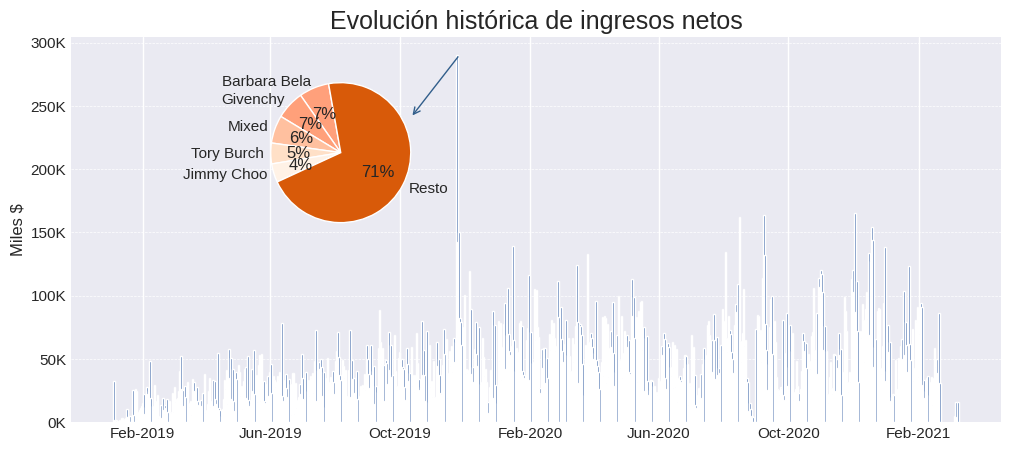

In [157]:
# |  output: true

df_net_revenue = query_store_sales(net_revenue)

df_net_revenue['fecha_compra'] = pd.to_datetime(
    df_net_revenue['fecha_compra']
)

# Definir la consulta SQL para obtener las marcas más vendidas en el día específico
query_marcas = """
    SELECT marca, SUM(cantidad * precio) AS ventas_totales
    FROM transacciones_pedidos ped
    INNER JOIN productos p ON ped.producto_id = p.producto_id
    WHERE strftime('%Y-%m-%d', ped.fecha_compra) = '2019-11-24'
    GROUP BY marca
    ORDER BY ventas_totales DESC;
"""
df_marcas = query_store_sales(query_marcas)

# Tomar las primeras 5 marcas y sumar el resto de las ventas
top_5_marcas = df_marcas.head(5)
resto_ventas = df_marcas.iloc[5:]['ventas_totales'].sum()

# Crear un nuevo DataFrame con las primeras 5 marcas y el resto de las ventas
df_plot = pd.concat([top_5_marcas, pd.DataFrame({'marca': ['Resto'], 'ventas_totales': [resto_ventas]})])

# Calcular los porcentajes de las ventas para cada marca
porcentajes = (df_plot['ventas_totales'] / df_plot['ventas_totales'].sum() * 100)
#porcentajes=np.ceil[porcentajes]

# Crear un degradado de marrón comenzando con el color #D85A09 y yendo hacia tonos más claros
colors = ['#FFA07b', '#FFA07A', '#FFC09F', '#FFE0C7', '#FFF2E6', '#D85A09']

# Crear la figura y los objetos de ejes
fig, ax = plt.subplots(figsize=(12, 5))

# Dibujar el gráfico de barras

ax.bar(df_net_revenue.fecha_compra, df_net_revenue.total_ventas, width=1.5)

# Formatear los números en el eje y como "100k"
formatter = FuncFormatter(lambda x, _: f'{x / 1000:.0f}K')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('Miles $')

# Agregar título al gráfico
plt.title('Evolución histórica de ingresos netos', fontsize=18)

# Mostrar líneas horizontales en el grid
ax.grid(axis='y', linestyle='--', linewidth=0.5)


# Dibujar el gráfico de pastel superpuesto
pie_ax = ax.inset_axes([0.09, 0.5, 0.4, 0.4])  # Posición y tamaño del gráfico de pastel
pie_ax.pie(
    porcentajes,
    labels=df_plot['marca'],
    autopct='%.0f%%', startangle=100,
    colors=colors
)
pie_ax.axis('equal')


# Añadir la flecha desde el gráfico de pastel
pie_ax.annotate(
    '', xy=(1, 0.5),
    xytext=(1.7, 1.4),
    arrowprops=dict(color='#315E8B', arrowstyle='->')
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

plt.show()

<ipython-input-158-cb4aa4bd41b7>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


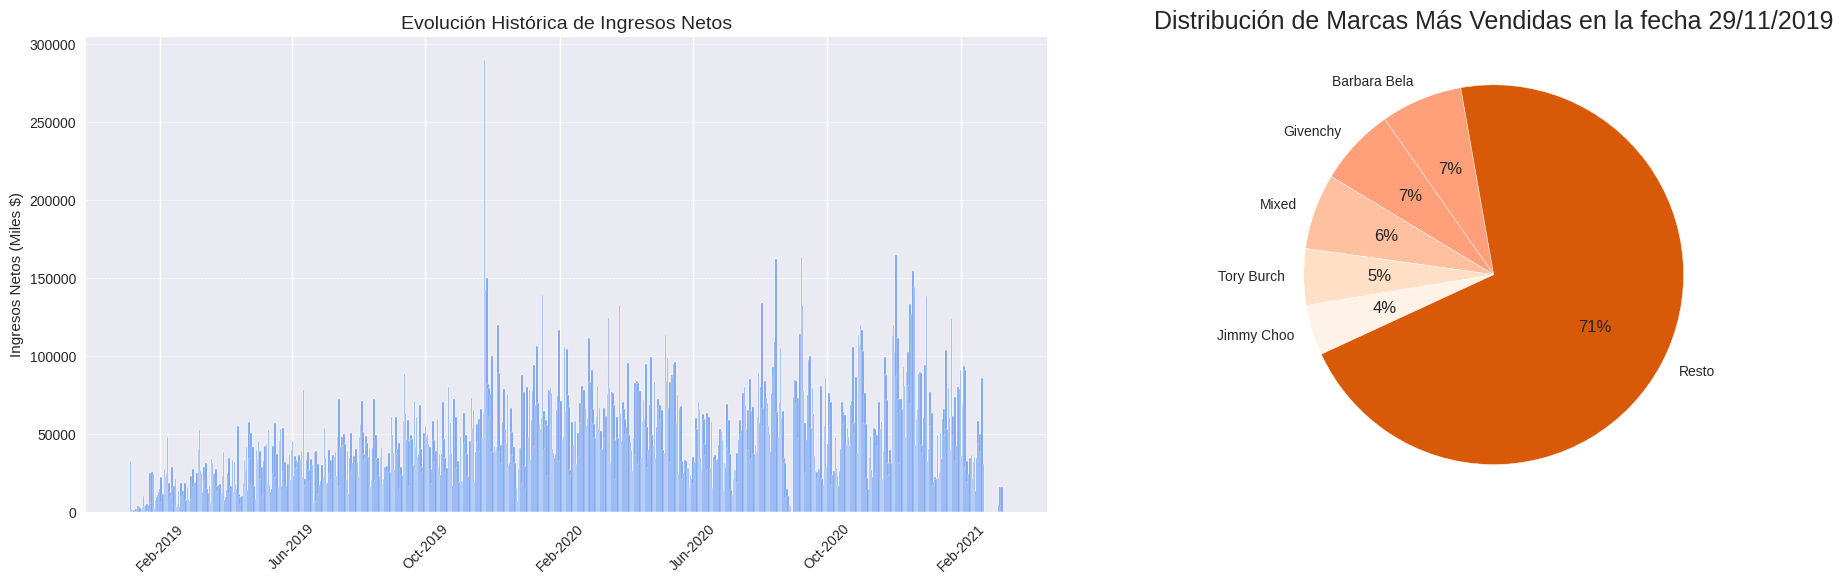

In [158]:

# Definir la función de consulta_store_sales
def query_store_sales(df):
    # Supongamos que esta función realiza la consulta y devuelve un DataFrame con las ventas netas
    pass

# Se genera df_net_revenue y df_plot con el código proporcionado en la pregunta

# Establecer el estilo del gráfico
plt.style.use('seaborn')

# Crear una nueva figura y los objetos de ejes
fig, (ax_bar, ax_pie) = plt.subplots(1, 2, figsize=(20, 6))

# Dibujar el gráfico de barras
ax_bar.bar(df_net_revenue.fecha_compra, df_net_revenue.total_ventas, width=1.5, color='#6495ED')
ax_bar.set_ylabel('Ingresos Netos (Miles $)')
ax_bar.set_title('Evolución Histórica de Ingresos Netos', fontsize=14)
ax_bar.grid(axis='y', linestyle='--', linewidth=0.5)
ax_bar.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax_bar.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax_bar.tick_params(axis='x', rotation=45, labelsize=10)

# Dibujar el gráfico de pastel
ax_pie.pie(porcentajes, labels=df_plot['marca'], autopct='%.0f%%', startangle=100, colors=colors)
ax_pie.set_title('Distribución de Marcas Más Vendidas en la fecha 29/11/2019', fontsize=18)

# Ajustar el espacio entre subgráficos
plt.subplots_adjust(wspace=0.4)

# Mostrar los gráficos
plt.tight_layout()
plt.show()



**Conclusiones**
> El promedio histórico de ingresos netos diarios asciende a la cifra de 80.000 desde el 2020.

>Destacando un volumen histórico en ventas el día 24 de noviembre de 2019 alcanzadonse un ingreso neto de 289.000 donde sobresalen marcas como Barbara Bela y Givency con un 7% cada una sobre el total vendido.

##**Pregunta 3: ¿Cuáles son los ingresos netos por vendedor por año?**

In [159]:

def obtener_ingresos_netos_por_vendedor_por_ano():
    # Crear una conexión a la base de datos SQLite
    database = sqlite3.connect('my_database.db')

    # Ejecutar la consulta SQL para obtener los ingresos netos por vendedor por año
    query = """
        SELECT vendedores.nombre_vendedor,
               strftime('%Y', transacciones_pedidos.fecha_compra) AS ano,
               SUM(valor_total - costo_envio) AS ingresos_netos
        FROM transacciones_pedidos

        INNER JOIN vendedores ON transacciones_pedidos.vendedor_id = vendedores.vendedor_id
        GROUP BY vendedores.nombre_vendedor, ano
        ORDER BY vendedores.nombre_vendedor, ano
    """
    df = pd.read_sql_query(query, database)

    # Cerrar la conexión a la base de datos
    database.close()

    # Pivotar el DataFrame para obtener las columnas nombre_vendedor; ano_2019; ano_2020; ano_2021
    df = df.pivot(index='nombre_vendedor', columns='ano', values='ingresos_netos')

    # Rellenar los valores NaN con 0
    df = df.fillna(0)

    # Devolver el DataFrame con los ingresos netos por vendedor por año
    return df

# Obtener los ingresos netos por vendedor por año
ingresos_netos_por_vendedor_por_ano = obtener_ingresos_netos_por_vendedor_por_ano()

# Imprimir el DataFrame con los ingresos netos por vendedor por año
print(ingresos_netos_por_vendedor_por_ano)

ano                   2019       2020      2021
nombre_vendedor                                
Ana Duarte       2154261.6  5054009.6  547470.4
Daniel Siqueira  2020503.2  5266932.8  419702.4
Millena Pereira  2054682.4  3804385.6  398896.0
Nadia Oliveira   2296986.4  4046902.4  810020.0
Paulo Calanca    3702835.2  3609530.4  455401.6
Unknown              624.0        0.0       0.0


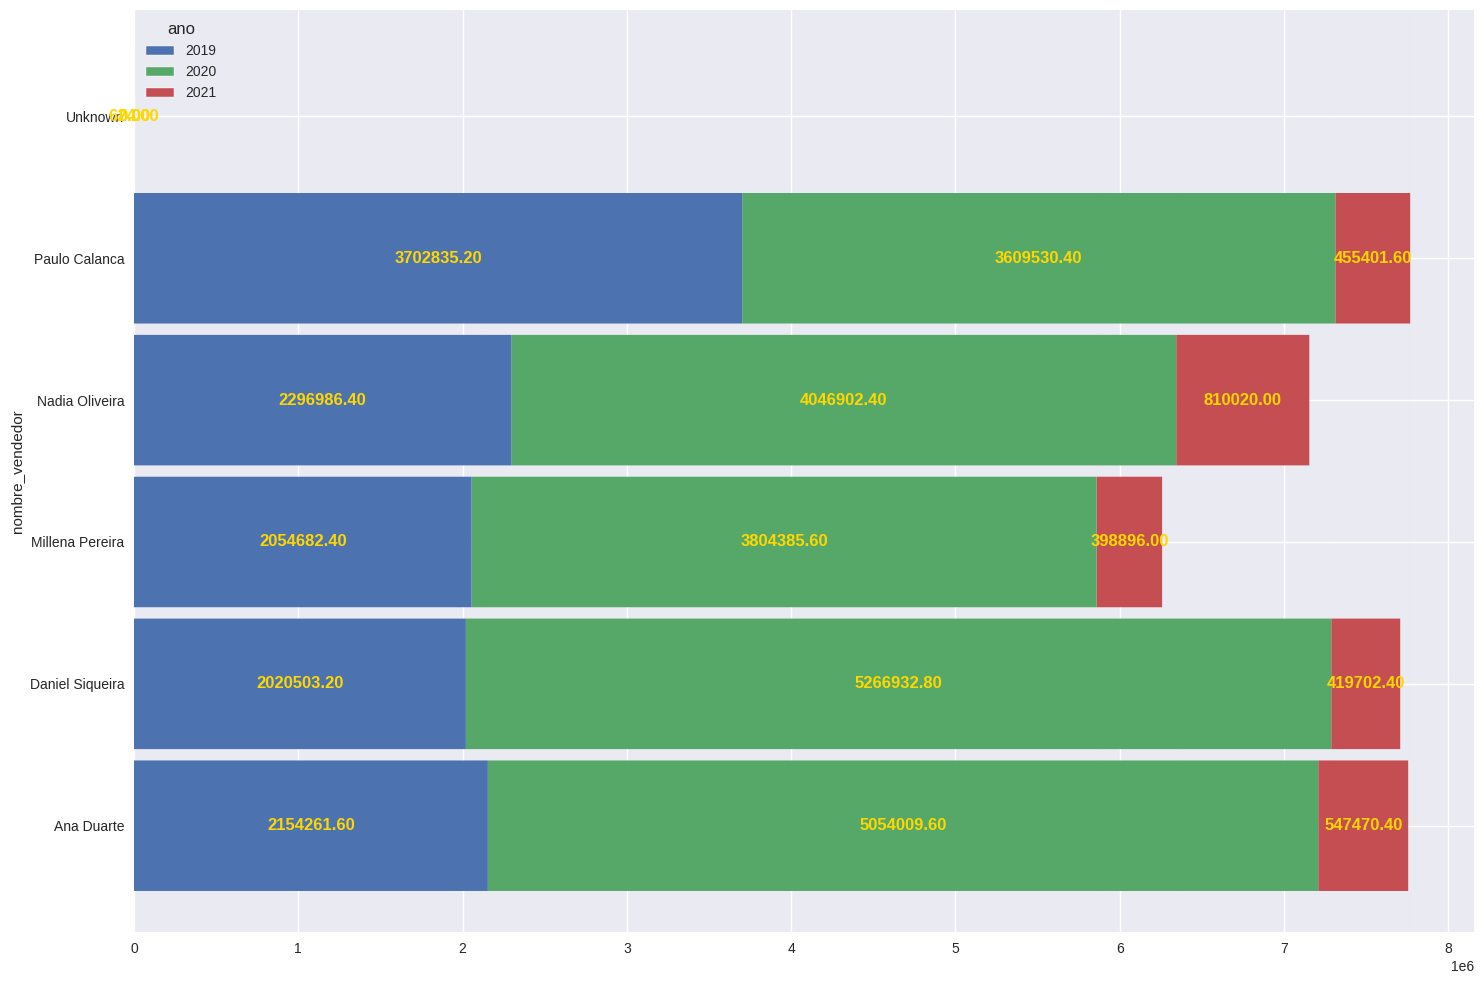

In [160]:

# Definir una paleta de colores personalizada
#colors = plt.cm.ocean(np.linspace(0, 1, len(ingresos_netos_por_vendedor_por_ano.columns)))

# Crear el gráfico de barras apiladas
ax = ingresos_netos_por_vendedor_por_ano.plot.barh(stacked=True, width=1, legend=True)
ax.figure.set_size_inches(15, 10)

# Mejorar el estilo visual de las barras
new_patches = []
for patch in reversed(ax.patches):
    bb = patch.get_bbox()
    color = patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin), abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=-0.01,rounding_size=10", ec="none", fc=color, mutation_aspect=4)
    patch.remove()
    new_patches.append(p_bbox)
    # Agregar etiquetas en las barras
    ax.text(bb.xmin + bb.width/2, bb.ymin + bb.height/2, f'{bb.width:.2f}',
            ha='center', va='center', color='gold', fontsize=12, fontweight='bold')

for patch in new_patches:
    ax.add_patch(patch)

# Ajustar el gráfico para mostrar mejor las etiquetas
plt.tight_layout()
plt.show()


**Conclusiones**
> En relación a los ingresos por vendedor podemos destacar a Ana Duarte y Daniel Siqueira quienes superaron los cinco millones en ventas el año 2020, con un aumento significativo sobre el año anterior.

> Nadia Oliveira y Milena Pereira también aumentaron su meta respecto del año anterior aunque en menor medida. Sin embargo, Paulo Calanca disminuyo más de un 2% sus ventas respecto de año anterior.

##**Pregunta 4: ¿Cuáles son las ciudades que proporcionan mayores ingresos netos?**

In [161]:
city_by_income = '''
    SELECT
        ip.ciudad,
        SUM(valor_total-costo_envio) AS ingresos_netos,
        SUBSTRING(ciudad,4,4) AS abbrev_state
    FROM transacciones_pedidos ip
    GROUP BY ciudad
    '''


df_city = pd.read_sql_query(city_by_income, database)
print(df_city)

   ciudad  ingresos_netos abbrev_state
0   BR-AC       1128520.0           AC
1   BR-AL       1522016.0           AL
2   BR-AM       1244092.8           AM
3   BR-AP       1475737.6           AP
4   BR-BA       1322517.6           BA
5   BR-CE       1468080.8           CE
6   BR-DF       1327094.4           DF
7   BR-ES       1275874.4           ES
8   BR-GO       1418205.6           GO
9   BR-MA       1453059.2           MA
10  BR-MG       1314788.8           MG
11  BR-MS       1221190.4           MS
12  BR-MT       1363611.2           MT
13  BR-PA       1345199.2           PA
14  BR-PB       1423834.4           PB
15  BR-PE       1509197.6           PE
16  BR-PI       1358606.4           PI
17  BR-PR       1308105.6           PR
18  BR-RJ       1334395.2           RJ
19  BR-RN       1335573.6           RN
20  BR-RO       1317495.2           RO
21  BR-RR       1349770.4           RR
22  BR-RS       1320528.8           RS
23  BR-SC       1476962.4           SC
24  BR-SE       1339291.2

In [162]:
dfbra=geobr.read_state()
df.sample(10)

fecha_compra  total_ventas
68    2019-03-14       19605.6
117   2019-05-02       45572.0
135   2019-05-20       16315.2
573   2020-08-01       57057.6
261   2019-09-23       60900.8
85    2019-03-31       38201.6
52    2019-02-26       16344.0
519   2020-06-08       34656.0
427   2020-03-08       66907.2
769   2021-02-15       34799.2

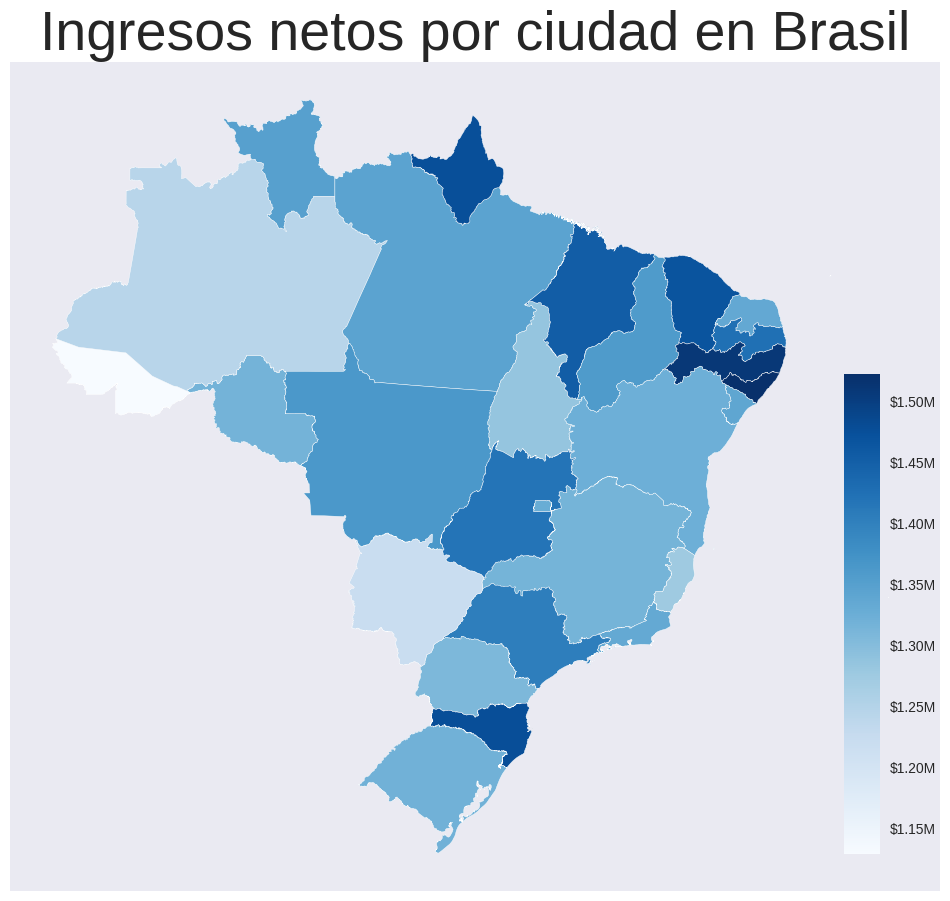

In [163]:
# |  output: true


dfbra=geobr.read_state()

br_uf_d = dfbra.merge(
    df_city,on=["abbrev_state"],how='outer'
)
br_uf_d=br_uf_d[["geometry","ingresos_netos"]]


# Crear la figura y los objetos de ejes
fig, ax = plt.subplots(figsize=(12, 12))

ax=br_uf_d.plot(ax=ax,column="ingresos_netos",cmap="Blues")

cax = fig.add_axes(
    [
        0.82,    # posicao x (entre 0.0 e 1.0)
        0.18,    # posicao y (entre 0.0 e 1.0)
        0.03,    # largura x
        0.40,    # altura y
    ]
)

sm = plt.cm.ScalarMappable(
    cmap="Blues",
    norm=plt.Normalize(
        vmin=br_uf_d["ingresos_netos"].min(),
        vmax=br_uf_d["ingresos_netos"].max(),
    ),
)
fig.colorbar(
    sm, cax=cax,
    format=ticker.FuncFormatter(lambda x, _: f'${x / 1000000:.2f}M')
)


ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticklabels([])
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)
ax.set_yticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')


ax.set_title(
    "Ingresos netos por ciudad en Brasil",
    fontdict={"fontsize": 40},
)

x_limits = ax.get_xlim()
y_limits = ax.get_ylim()

plt.show()

In [164]:
dfbra=geobr.read_state()
dfbra.head()
br_uf_d = dfbra.merge(
    df_city,on=["abbrev_state"],how='outer'
)

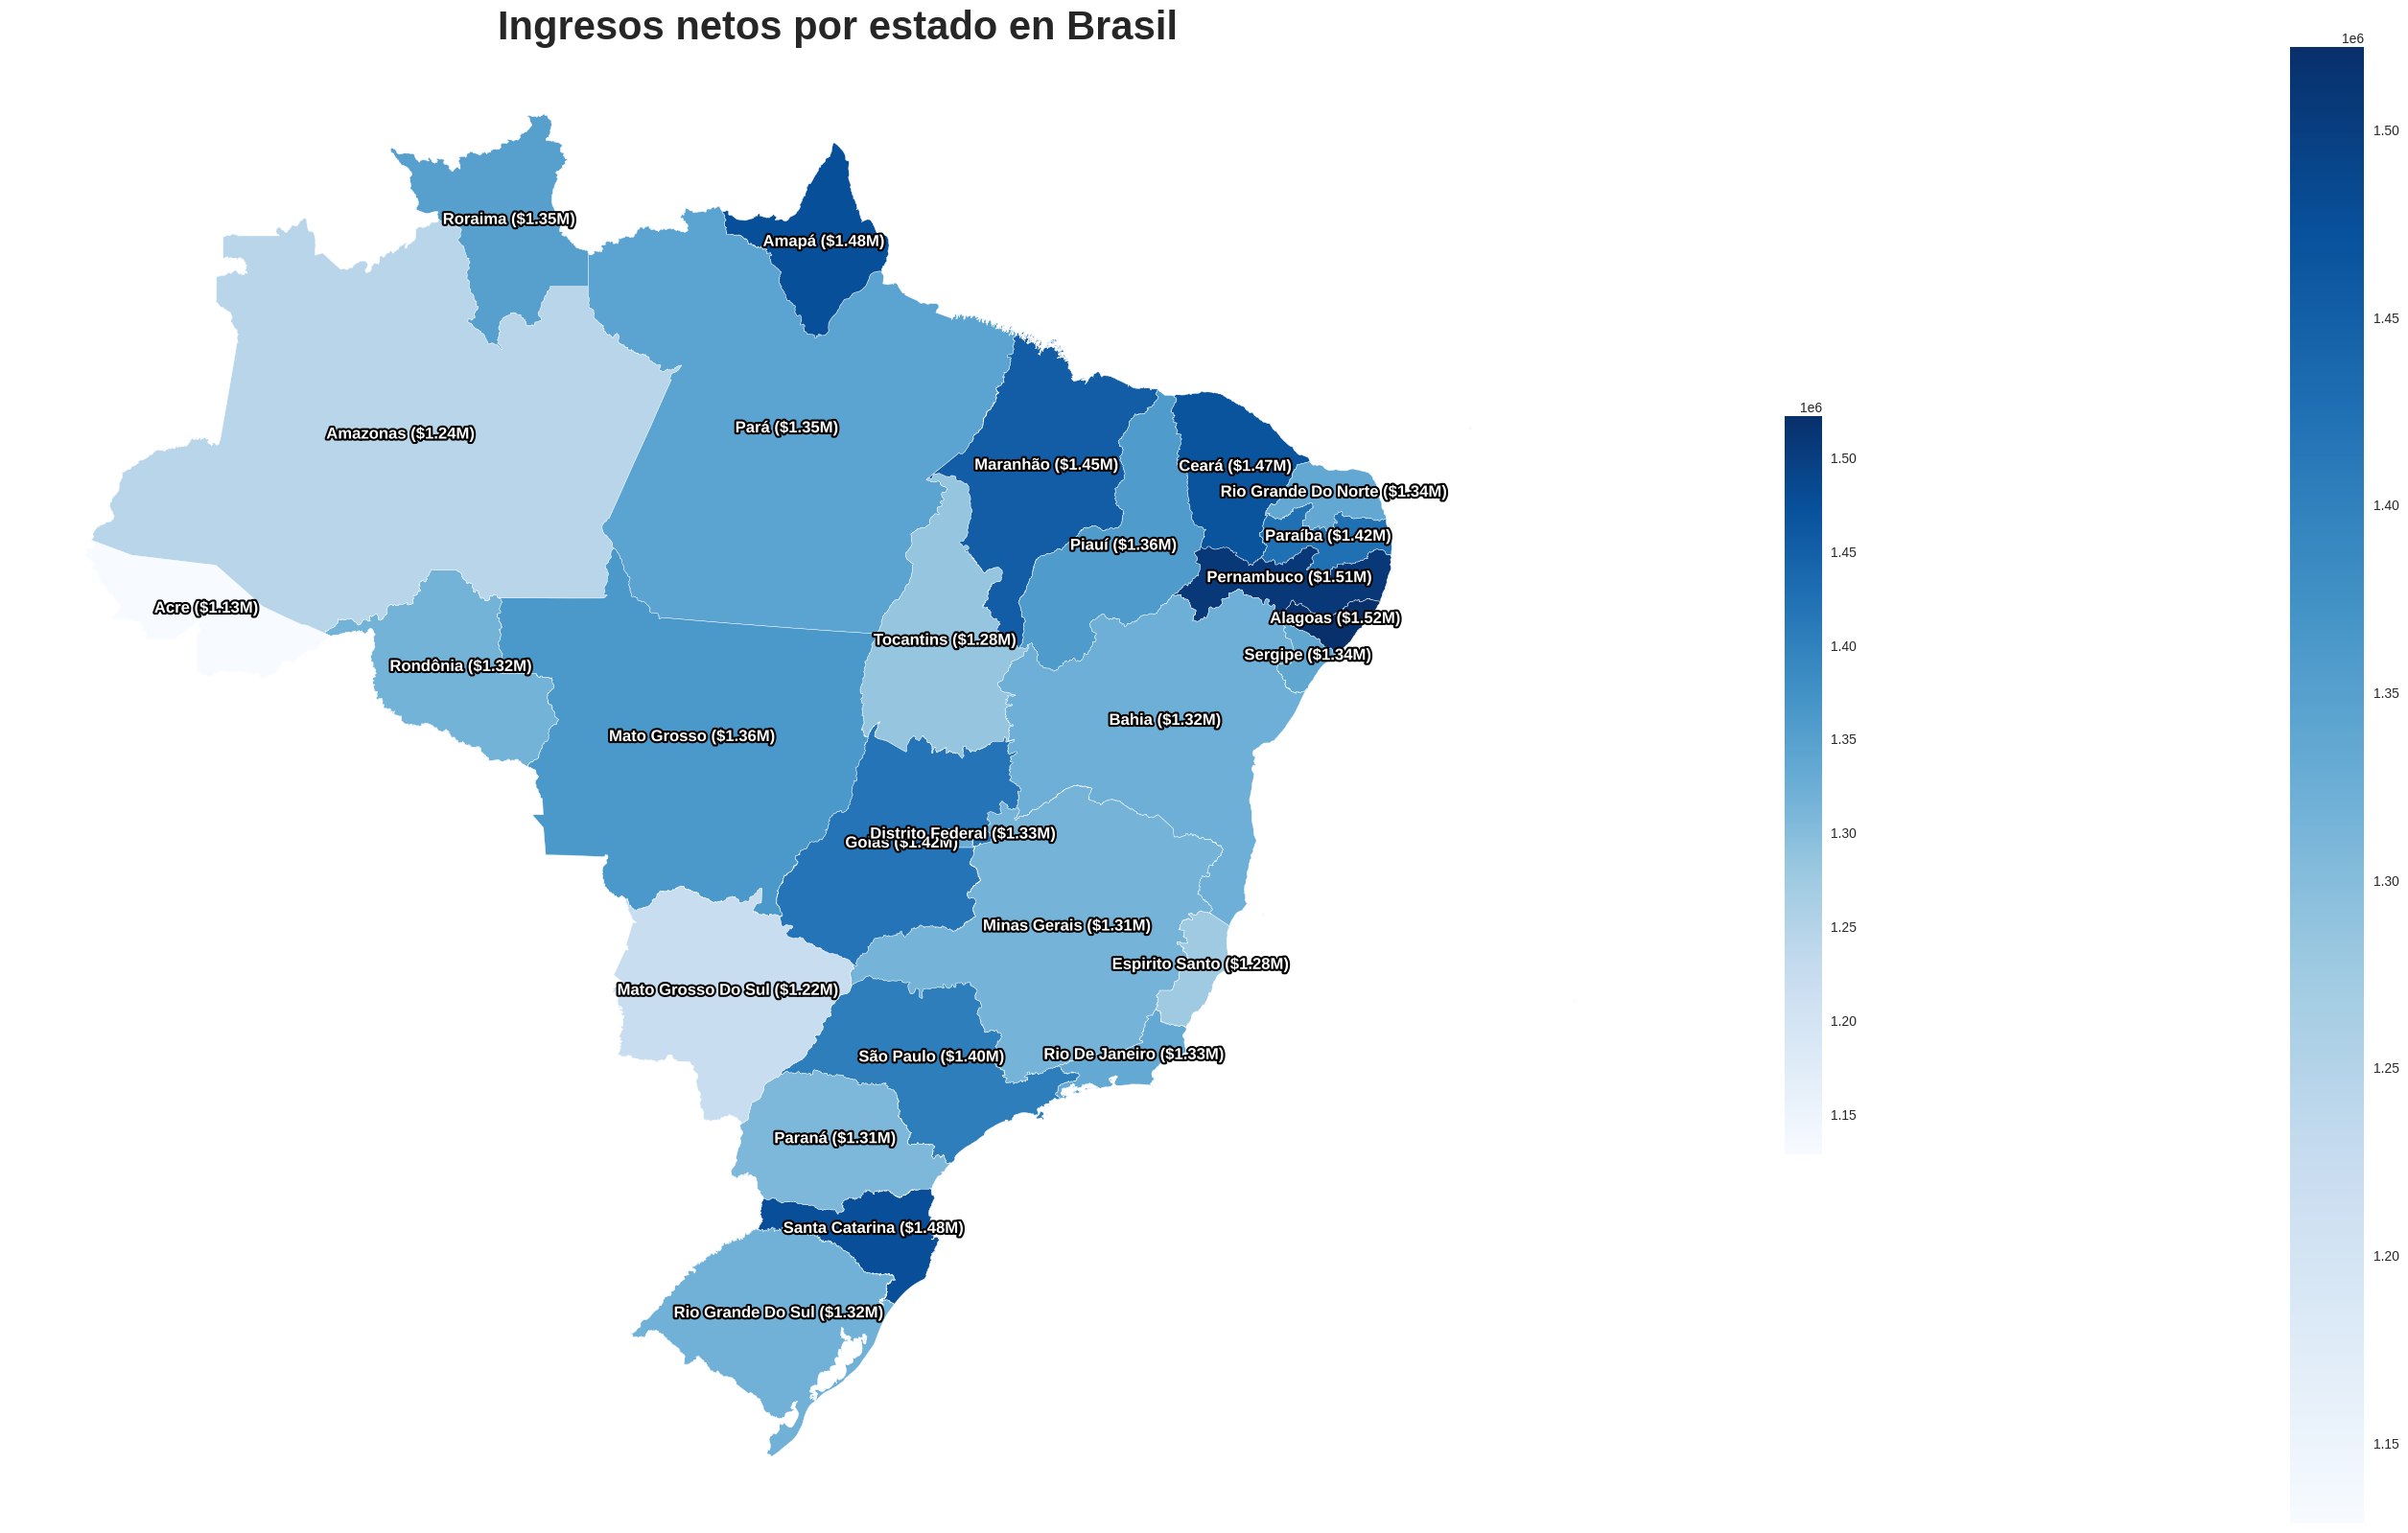

In [165]:

# Crear la figura y los objetos de ejes
fig, ax = plt.subplots(figsize=(40, 20))

# Dibujar los polígonos y colorear según 'ingresos_netos'
br_uf_d.plot(ax=ax, column='ingresos_netos', cmap='Blues', legend=True)

# Calcular los centroides de cada polígono y añadir las etiquetas
for idx, row in br_uf_d.iterrows():
    # Obtener el centroide de cada polígono
    centroid = row['geometry'].centroid
    # Colocar la etiqueta en el centroide
    label = ax.annotate(f"{row['name_state']} (${row['ingresos_netos']/1000000:.2f}M)",
                        xy=(centroid.x, centroid.y),
                        xytext=(3, 3),
                        textcoords="offset points",
                        ha='center',
                        va='center',
                        fontsize=12, color='white', fontweight='bold',
                        path_effects=[withStroke(linewidth=3, foreground="black")])

# Configuración adicional de la visualización
ax.set_title("Ingresos netos por estado en Brasil", fontdict={'fontsize': 30, 'fontweight': 'bold'})
ax.set_axis_off()

# Ajustar la posición y tamaño de la leyenda (barra de color)
fig.colorbar(sm, ax=ax, location='right', shrink=0.5, aspect=20)

plt.show()


*Conclusiones*
> Las ciudades que representan mayores ingresos son Alagoas con $1.52M. y Pernambuco con $1.51M. Seguidas de Amapá y Santa Catarina con $1.48M.

> En el extremo opuesto se encuentran Matogrosso do Sul con $1.2M y Acre con $1.5M.

##**Pregunta 5: insight adicional**

In [179]:
def calcular_beneficio_y_margen():
    query = """
    SELECT
        p.producto_id,
        p.producto,
        SUM(tp.valor_total) as ventas_totales,
        SUM(tp.costo_envio) as costos_envio_totales,
        (SUM(tp.valor_total) - SUM(tp.costo_envio)) as beneficio_neto,
        ((SUM(tp.valor_total) - SUM(tp.costo_envio)) / SUM(tp.valor_total)) * 100 as margen_ganancia
    FROM transacciones_pedidos tp
    JOIN productos p ON tp.producto_id = p.producto_id
    GROUP BY p.producto_id
    ORDER BY beneficio_neto DESC
    """
    result = pd.read_sql_query(query, database)
    return result

crear_conexion()

beneficios_y_margenes = calcular_beneficio_y_margen()



In [181]:
# Top 5 productos con mayor beneficio neto

print("Top 5 productos con mayor beneficio neto:")
print(beneficios_y_margenes.head(5))


Top 5 productos con mayor beneficio neto:
  producto_id                    producto  ventas_totales  \
0        3865         Bolsa Classica Roxa       2860000.0   
1        4307  Bolsa Intrecciato Caramelo       2216825.0   
2      100932           Sapato Cetim Pink       1821300.0   
3       89100         Vestido Longo Preto       1814400.0   
4       17990           Saia Couro Tijolo       1751800.0   

   costos_envio_totales  beneficio_neto  margen_ganancia  
0              572000.0       2288000.0             80.0  
1              443365.0       1773460.0             80.0  
2              364260.0       1457040.0             80.0  
3              362880.0       1451520.0             80.0  
4              350360.0       1401440.0             80.0  


In [184]:
# Top 5 productos con menor beneficio neto

print("\nTop 5 productos con menor beneficio neto:")
print(beneficios_y_margenes.tail(5))


Top 5 productos con menor beneficio neto:
    producto_id                producto  ventas_totales  costos_envio_totales  \
200       73692   Shorts Estampa Floral         35640.0                7128.0   
201       75706           Shorts Poa Pb         35600.0                7120.0   
202       38723   Top Cropped Coqueiros         31440.0                6288.0   
203       86544  Macaquinho Tricot Bege         20650.0                4130.0   
204       91248    Vestido Estampa Laco         18630.0                3726.0   

     beneficio_neto  margen_ganancia  
200         28512.0             80.0  
201         28480.0             80.0  
202         25152.0             80.0  
203         16520.0             80.0  
204         14904.0             80.0  


<ipython-input-201-c7b9a06866cc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot1 = sns.barplot(x='beneficio_neto', y='producto', data=beneficios_y_margenes.head(5), palette='viridis')
<ipython-input-201-c7b9a06866cc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot2 = sns.barplot(x='beneficio_neto', y='producto', data=beneficios_y_margenes.tail(5), palette='viridis')


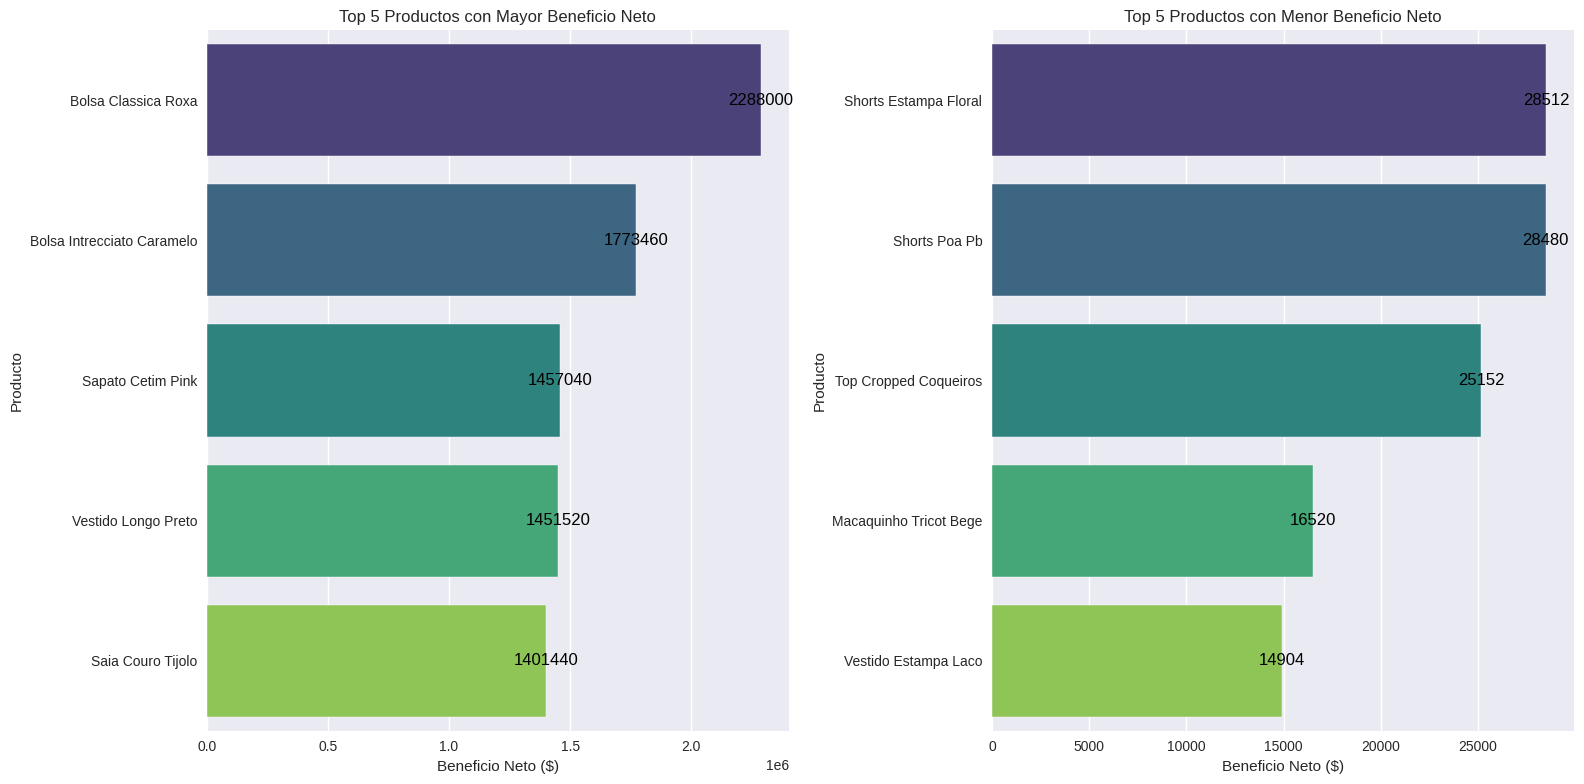

In [201]:
# Asumiendo que 'beneficios_y_margenes' es el DataFrame que ya contiene los datos procesados
plt.figure(figsize=(16, 8))

# Gráfico para los productos con mayor beneficio neto
plt.subplot(1, 2, 1)
barplot1 = sns.barplot(x='beneficio_neto', y='producto', data=beneficios_y_margenes.head(5), palette='viridis')
plt.title('Top 5 Productos con Mayor Beneficio Neto')
plt.xlabel('Beneficio Neto ($)')
plt.ylabel('Producto')

for p in barplot1.patches:
    width = p.get_width()
    plt.text(p.get_x() + width + 0.3, p.get_y() + p.get_height() / 2.,
             '{:1.0f}'.format(width),
             ha='center', va='center', color= 'black')

plt.subplot(1, 2, 2)
barplot2 = sns.barplot(x='beneficio_neto', y='producto', data=beneficios_y_margenes.tail(5), palette='viridis')
plt.title('Top 5 Productos con Menor Beneficio Neto')
plt.xlabel('Beneficio Neto ($)')
plt.ylabel('Producto')

for p in barplot2.patches:
    width = p.get_width()
    plt.text(p.get_x() + width + 0.3, p.get_y() + p.get_height() / 2.,
             '{:1.0f}'.format(width),
             ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


*Conclusiones*

PRODUCTOS CON MAYORES BENEFICIOS NETOS

Los productos con mayor beneficio neto en la tienda online claramente disfrutan de una demanda sólida y sostenida, reflejando una fuerte percepción de valor por parte de los consumidores. Este éxito en términos de beneficio neto suele estar impulsado por elementos distintivos como la exclusividad y el reconocimiento de la marca. Estos factores no solo atraen a un segmento de mercado dispuesto a pagar, sino que también ayudan a cimentar la lealtad del cliente y la identidad de la marca, creando un ciclo positivo de demanda y rentabilidad.

Estrategias Sugeridas:

*   Maximizar la Visibilidad: Incrementar la visibilidad de estos productos mediante promociones y ubicaciones destacadas en la tienda online.

*   Controlar el Inventario de Manera Efectiva: Asegurar un buen equilibrio en el inventario para evitar excesos que puedan llevar a descuentos innecesarios.


PRODUCTOS CON MAYORES BENEFICIOS NETOS

Estos productos podrían enfrentar desafíos en términos de demanda debido a tendencias de mercado cambiantes, competencia superior, o desajustes con las expectativas del consumidor.

Estrategias Sugeridas:

*   Reevaluación de la Estrategia de Precios: Considerar ajustes en los precios si el mercado lo permite, sin comprometer la percepción de calidad.

*   Optimización de la Cadena de Suministro: Buscar maneras de reducir los costos de operación, posiblemente negociando mejores tarifas con proveedores o revisando las rutas logísticas.

*   Análisis de Mercado para Reubicación o Descontinuación del Producto: Determinar si estos productos aún se alinean con la estrategia de la empresa y considerar la posibilidad de descontinuarlos si no generan valor suficiente.

**COSTO DE ENVIO FIJO DEL 20% DE LA COMPRA TOTAL**

Se identifica que los costos de envío representan consistentemente el 20% del valor totalde la venta, esto podría ser el resultado de varias prácticas y estrategias empresariales deliberadas.

*   1. Estrategia de Precios Uniforme: La empresa podría haber adoptado una estrategia de precios uniforme donde los costos de envío se calculan como un porcentaje fijo del precio de venta. Esto puede simplificar la estructura de precios y hacer que los costos sean predecibles tanto para la empresa como para los clientes.

*   2. Acuerdos de Envío Establecidos: Podría existir un acuerdo con proveedores de servicios de envío que establezca tarifas basadas en el valor del producto. Este tipo de acuerdos es común en industrias donde el valor del contenido puede influir en el costo del seguro y el manejo durante el transporte.

*   3. Margen de Beneficio Incorporado
La empresa podría haber diseñado su modelo de precios para incorporar un margen de beneficio que contemple explícitamente estos costos de envío. De esta manera, los precios finales reflejan un equilibrio entre cubrir los costos y generar ganancias, manteniendo el porcentaje de costos de envío constante.



**CONCLUSIONES FINALES:**

1. El analisis de la información precedentemente expuesta refleja importantes observaciones sobre la problemática de negocios y su evolución histórica que permite influir en la toma de decisiones estratégicas, con el objeto de impulsar el rendimiento.
2. Se analizó la evolución histórica de las ventas por productos, el comportamiento por vendedor y la distribución geográfica a nivel nacional, lo que permite tener un conocimiento cabal del desarrollo histórico de las ventas y la representatividad asociada a cada vendedor y región del país.
3. Con el objeto de impulsar el rendimiento, mejorar la eficiencia y reducir costos se sugiere implementar diversas campañas promocionales como la llevada a cabo el día 24/11 (Black Friday) distribuidas a lo largo del año. Capacitar o fortalecer las competencias de los vendedores menos eficientes. Eliminar la distribución de productos en las regiones menos rentables, fortalecer y sobreponderar la distribución logística en las regiones que representan menores costes de envío y mayor rentabilidad para la empresa.